# CODIGO GENERAL

## 1.1 - LIBRERIAS

In [1]:
# Importo las bibliotecas necesarias para mi proyecto de ciencia de datos

import pandas as pd  # Pandas para manipulación de datos
import numpy as np   # NumPy para operaciones matriciales y numéricas
import seaborn as sns  # Seaborn para visualización de datos
import matplotlib.pyplot as plt  # Matplotlib para gráficos
import re  # Importo el módulo de expresiones regulares para procesamiento de texto
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler para escalar características
from sklearn.preprocessing import LabelEncoder  # LabelEncoder para codificar etiquetas categóricas
from sklearn.preprocessing import OrdinalEncoder  # OrdinalEncoder para codificar características categóricas
import pytz  # Importo pytz para trabajar con zonas horarias
from sklearn.feature_selection import SelectPercentile, f_regression


In [2]:
# Configurar la visualización de gráficos inline
%matplotlib inline

# La línea anterior configura la visualización de gráficos dentro del entorno de Jupyter Notebook de forma "inline",
# lo que significa que los gráficos se mostrarán directamente en el documento del notebook.

# 2.O - CSV DENUNCIAS


### 2.1 - IMPORTACION DE CSV

In [3]:
# Defino la ruta del archivo CSV que contiene los datos de las denuncias
denuncias_path = ('../datos/csv procesados/limpios_denuncias.csv')

# Utilizo Pandas para cargar los datos del archivo CSV en un DataFrame
df_denuncias = pd.read_csv(denuncias_path)

# Ahora tengo los datos de las denuncias cargados en 'df_denuncias' para su posterior análisis.

In [4]:
# Selecciono aleatoriamente 3 filas del DataFrame 'df_denuncias' y fijo la semilla para reproducibilidad
df_denuncias.sample(3, random_state=4)

# Esta línea de código muestra una muestra aleatoria de 3 filas de tu DataFrame 'df_denuncias'
# utilizando un valor de semilla (random_state) de 4 para garantizar que la selección sea reproducible.


,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,...,derivacion3_fecha,derivacion3_judicializa,denunciante_nacionalidad,denunciante_provincia,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,provincia_indec_id
478,2020-04-17,NaN,505455505,Urgencia,Ciudadano,No,Trata,Grooming,Buenos Aires,Florencio Varela,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5620,2023-05-31,14:28,2545751535,Emergencia,Ciudadano,Sí,Trata,"Explotación sexual niñas, niños y adolescentes",Santa Fe,Rosario,...,NaN,NaN,NaN,Santa Fe,NaN,Denunciante - ciudadano,NaN,Mujer,0.0,82.0
1959,2021-04-16,NaN,9494751515,Urgencia,Ciudadano,Sí,Trata,Explotación sexual,Buenos Aires,Ituzaingó,...,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,NaN,Hombre,35.0,6.0


### 2.2 - COLUMNAS

#### 2.2.1 - TIPOS DE DATOS

In [5]:
# Defino una lista de columnas que quiero convertir en categorías
categorias_cols = ['situacion', 'origen', 'tema', 'provincia', 'dependencia_alta', 
                   'via_ingreso', 'derivacion_institucion', 'derivacion_judicializa', 
                   'denunciante_provincia', 'es_anonima', 'subtema', 'localidad',
                   'denunciante_como_conocio_la_linea']

# Utilizo el método 'astype' de Pandas para convertir las columnas seleccionadas en categorías
df_denuncias[categorias_cols] = df_denuncias[categorias_cols].astype('category')

# Al convertir estas columnas en categorías, ahorramos memoria y permitimos
# un procesamiento más eficiente de las variables categóricas en análisis posteriores.


In [6]:
# Defino una lista de columnas que contienen fechas
date_columns = ['derivacion_fecha', 'fecha_ingreso', 'derivacion2_fecha', 'derivacion3_fecha']

# Itero a través de las columnas de fecha y las convierto en objetos de fecha
for col in date_columns:
    df_denuncias[col] = pd.to_datetime(df_denuncias[col], errors='coerce').dt.date

# Ahora, definimos una función para convertir una columna de fechas a la zona horaria de Argentina/Buenos_Aires
def convert_to_argentina_timezone(date_str):
    argentina_timezone = pytz.timezone('America/Argentina/Buenos_Aires')
    return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S').tz_localize(argentina_timezone)

# Aplicamos la función a todas las columnas de fecha en el DataFrame
df_denuncias[date_columns] = df_denuncias[date_columns].applymap(convert_to_argentina_timezone)

# Con estas operaciones, hemos convertido las columnas de fecha en objetos de fecha y hora adecuadamente
# y hemos ajustado su zona horaria a Argentina/Buenos_Aires utilizando la función 'convert_to_argentina_timezone'.


In [7]:
# Convierto las columnas de fecha y hora en nuevas columnas de solo hora
df_denuncias['derivacion2_hora'] = df_denuncias['derivacion2_fecha'].dt.hour
df_denuncias['derivacion3_hora'] = df_denuncias['derivacion3_fecha'].dt.hour
df_denuncias['derivacion_hora'] = df_denuncias['derivacion_fecha'].dt.hour
df_denuncias['ingreso_hora'] = df_denuncias['fecha_ingreso'].dt.hour

# Ahora, tengo nuevas columnas que contienen solo la información de la hora de las fechas originales.
# Esto puede ser útil para análisis específicos basados en la hora de las denuncias.


In [8]:
# Selecciono las columnas de fecha y hora en el DataFrame
columnas_fechas = df_denuncias.select_dtypes(include=['datetime64[ns]']).columns

# Relleno los valores faltantes en estas columnas con 'pd.NaT'
df_denuncias[columnas_fechas] = df_denuncias[columnas_fechas].fillna(pd.NaT)

# Al rellenar los valores faltantes con 'pd.NaT', estamos marcando estos valores como faltantes en las columnas de fecha y hora.
# Esto es útil para mantener la integridad de los datos y permitir un manejo adecuado de los valores ausentes en análisis posteriores.


In [9]:
# Itero a través de las columnas del DataFrame
for column in df_denuncias.columns:
    # Verifico si el tipo de la columna es float o float64
    if df_denuncias[column].dtype in ['float', 'float64']:
        # Encuentro los índices donde los valores no son nulos
        not_null_indices = pd.notna(df_denuncias[column])
        # Convierto los valores no nulos a tipo int y reemplazo los valores en el DataFrame original
        df_denuncias.loc[not_null_indices, column] = df_denuncias.loc[not_null_indices, column].astype(int)

# Con este código, he convertido los valores de tipo float en las columnas adecuadas a tipo int,
# manteniendo los valores nulos intactos.


#### 2.2.2 - VALORES

In [10]:
# Verifico la cantidad de valores nulos en cada columna del DataFrame 'df_denuncias'
nulos_por_columna = df_denuncias.isnull().sum()

# 'nulos_por_columna' ahora contiene la cantidad de valores nulos en cada columna.
# Esto puede ser útil para evaluar la integridad de los datos y decidir si es necesario
# realizar imputaciones o manipulaciones adicionales en función de la cantidad de valores nulos.

In [54]:
# Filtro para identificar géneros que deben ser mapeados a np.nan
filtro_nan = df_denuncias['denunciante_genero'].isin(['No sabe / no contesta', 'No binario', 'Ninguna de las anteriores'])
df_denuncias.loc[filtro_nan, 'denunciante_genero'] = np.nan

# Filtro para identificar géneros que deben ser mapeados a 'transgenero'
filtro_transgenero = df_denuncias['denunciante_genero'].isin(['Transgénero', 'Transexual', 'Mujer trans - travesti', 'Varón trans'])
df_denuncias.loc[filtro_transgenero, 'denunciante_genero'] = 'transgenero'

# Mapeo de 'Varón cis' a 'varon'
df_denuncias.loc[df_denuncias['denunciante_genero'] == 'Varón cis', 'denunciante_genero'] = 'varon'

# Mapeo de 'Mujer cis' a 'mujer'
df_denuncias.loc[df_denuncias['denunciante_genero'] == 'Mujer cis', 'denunciante_genero'] = 'mujer'

In [103]:
df_denuncias['es_anonima'] = df_denuncias['es_anonima'].replace('Sí', 'Si')

##### 2.2.2.0 - IMPUTACION GENERAL

In [11]:
# Calculo la moda de la columna 'situacion' y 'denunciante_genero'
moda_situacion = df_denuncias['situacion'].mode()[0]
denunciante_genero_moda = df_denuncias['denunciante_genero'].mode()[0]

# Realizo interpolaciones utilizando el método 'interpolate' para la columna 'hora_ingreso'
df_denuncias['hora_ingreso'].interpolate(method='time', inplace=True)

# Relleno los valores faltantes en las columnas 'situacion', 'provincia', 'localidad' y 'denunciante_genero'
# con sus respectivas modas y utilizando 'bfill' para la columna 'provincia' y 'localidad'
df_denuncias.fillna(value={'situacion': moda_situacion,
                          'provincia': df_denuncias.provincia.bfill(),
                          'localidad': df_denuncias.localidad.bfill(),
                          'denunciante_genero': denunciante_genero_moda},
                   inplace=True)

# Con este código, he realizado interpolaciones en la columna 'hora_ingreso'
# y rellenado valores faltantes en otras columnas con las modas correspondientes.


In [12]:
# Defino el orden deseado para las columnas del DataFrame
cols_ordenadas = [
    'fecha_ingreso', 'hora_ingreso', 'via_ingreso',
    'nro_registro_interno', 'es_anonima', 'situacion', 'origen', 'provincia',
    'localidad', 'tema', 'subtema', 'dependencia_alta', 'derivacion_institucion',
    'denunciante_nacionalidad', 'denunciante_provincia', 'denunciante_localidad',
    'denunciante_tipo', 'denunciante_como_conocio_la_linea', 'denunciante_genero',
    'denunciante_edad_aparente', 'derivacion_fecha',
    'derivacion_judicializa', 'derivacion2_institucion',
    'derivacion2_fecha', 'derivacion2_judicializa', 'derivacion3_institucion',
    'derivacion3_fecha', 'derivacion3_judicializa', 'provincia_indec_id',
    'derivacion_hora'
]

# Reorganizo las columnas del DataFrame 'df_denuncias' en el orden deseado
df_denuncias = df_denuncias[cols_ordenadas]

# Ahora, el DataFrame 'df_denuncias' tiene sus columnas reorganizadas según el orden especificado en 'cols_ordenadas'.


##### 2.2.2.1 - IMPUTACION AVANZADA

In [13]:
#df_denuncias['hora_ingreso'].interpolate(method='linear', inplace=True)

#### 2.2.3 - CODIFICACION

##### 2.2.3.0 - CATEGORICOS NOMINALES

In [14]:
# Selecciono las columnas que son de tipo 'category', 'object', o 'datetime64[ns, America/Argentina/Buenos_Aires]'
columnas_categoricas = df_denuncias.select_dtypes(include=['category', 'object', 'datetime64[ns, America/Argentina/Buenos_Aires]']).copy()

# Obtengo los nombres de las columnas seleccionadas
columnas_categoricas_nombres = columnas_categoricas.columns

# 'columnas_categoricas_nombres' ahora contiene los nombres de las columnas que son de tipo categórico, objeto
# o de fecha con la zona horaria 'America/Argentina/Buenos_Aires'.


In [15]:
# Creo una copia del DataFrame original para realizar la codificación
df_denuncias_codificados = df_denuncias.copy()

# Itero a través de las columnas categóricas nominales
for column in columnas_categoricas_nombres:
    # Instancio un codificador LabelEncoder para cada columna y lo aplico
    encoder = LabelEncoder()
    df_denuncias_codificados[column] = encoder.fit_transform(df_denuncias_codificados[column].astype(str))

# Con este código, hemos codificado las columnas categóricas nominales en valores numéricos
# utilizando LabelEncoder, lo que facilita su uso en algoritmos de aprendizaje automático.


In [16]:
# Obtengo información sobre el DataFrame 'df_denuncias_codificados'
df_denuncias_codificados.info()

# El método 'info()' proporciona un resumen de la información del DataFrame,
# incluyendo el tipo de datos de cada columna, la cantidad de valores no nulos y la memoria utilizada.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fecha_ingreso                      5912 non-null   int64  
 1   hora_ingreso                       5912 non-null   int64  
 2   via_ingreso                        5912 non-null   int64  
 3   nro_registro_interno               5912 non-null   int64  
 4   es_anonima                         5912 non-null   int64  
 5   situacion                          5912 non-null   int64  
 6   origen                             5912 non-null   int64  
 7   provincia                          5912 non-null   int64  
 8   localidad                          5912 non-null   int64  
 9   tema                               5912 non-null   int64  
 10  subtema                            5912 non-null   int64  
 11  dependencia_alta                   5912 non-null   int64

##### 2.2.3.1 - CATEGORICOS ORDINALES

In [17]:
#Columnas categoricas ordinales
# No hay

##### 2.2.3.2 - REDUCCION DE DIMENSIONALIDAD 

In [18]:
# Relleno los valores faltantes en el DataFrame original utilizando la media de cada columna.
df_denuncias_codificados.fillna(df_denuncias_codificados.mean(), inplace=True)

# Divido el DataFrame en dos partes: características (X) y la variable objetivo (y).
X = df_denuncias_codificados.drop(columns=['fecha_ingreso']).copy()
y = df_denuncias_codificados['fecha_ingreso'].copy()

# Creo un selector de características utilizando f_regression como método.
selector = SelectPercentile(score_func=f_regression, percentile=60)

# Aplico la selección de características al conjunto de datos.
df_denuncias_codificados_reducido = selector.fit_transform(X, y)

# Obtengo los nombres de las características seleccionadas.
columnas_seleccionadas = X.columns[selector.get_support()]

# Creo un nuevo DataFrame con las características seleccionadas y columnas nombradas.
df_denuncias_codificados_reducido = pd.DataFrame(df_denuncias_codificados_reducido, columns=columnas_seleccionadas)

# Restauro la columna 'fecha_ingreso' en el DataFrame reducido para mantener la variable objetivo.
df_denuncias_codificados_reducido['fecha_ingreso'] = df_denuncias_codificados['fecha_ingreso']

# Muestro una muestra aleatoria de 2 filas del DataFrame reducido para inspección.
df_denuncias_codificados_reducido.sample(2, random_state=4)

,hora_ingreso,es_anonima,situacion,origen,provincia,derivacion_institucion,denunciante_nacionalidad,denunciante_provincia,denunciante_localidad,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,derivacion_fecha,derivacion_judicializa,derivacion2_institucion,derivacion2_fecha,derivacion2_judicializa,fecha_ingreso
478,1025.0,0.0,1.0,0.0,0.0,32.0,13.0,24.0,274.0,54.0,2.0,26.261095,100.0,0.0,21.0,699.0,2.0,101
5620,524.0,1.0,0.0,0.0,20.0,0.0,13.0,20.0,274.0,54.0,2.0,0.000000,1193.0,1.0,18.0,658.0,0.0,1202


#### 2.2.4 - ESCALAMIENTO

In [19]:
# Creo una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Escalo las características del DataFrame 'df_denuncias_codificados'
df_denuncias_escalados = scaler.fit_transform(df_denuncias_codificados_reducido.copy())

# Creo un nuevo DataFrame con las características escaladas y mantengo los nombres de las columnas originales
df_denuncias_escalados = pd.DataFrame(df_denuncias_escalados, columns=df_denuncias_codificados_reducido.columns)

# Con este código, he escalado las características de 'df_denuncias_codificados' utilizando MinMaxScaler
# y he creado un nuevo DataFrame 'df_denuncias_escalados' con las características escaladas.

#### 2.2.5 - PORCENTAJE DE VALORES

In [20]:
# Verificar si hay valores nulos en el DataFrame escalado 'df_denuncias_escalados'
valores_nulos = df_denuncias_escalados.isnull().sum()

# 'valores_nulos' contiene la cantidad de valores nulos en cada columna del DataFrame escalado.
# Si no hay valores nulos, todos los valores deben ser cero. Si encuentras valores distintos de cero,
# es importante investigar y solucionar cualquier problema relacionado con los datos escalados.


#### 2.2.6 - MEDIDAS DE TENDENCIA CENTRAL

In [21]:
# Genero un resumen estadístico de todas las columnas en el DataFrame 'df_denuncias'
descripcion_estadistica = df_denuncias.describe(include='all')

# El argumento 'include="all"' garantiza que se incluyan estadísticas para todas las columnas,
# incluyendo columnas categóricas y otras que normalmente no se incluirían en el resumen.
# El resultado es un DataFrame que contiene estadísticas como la media, la desviación estándar,
# el recuento de valores no nulos, el valor más frecuente y otros para cada columna.

# Este resumen es útil para obtener una visión general de la distribución y características de tus datos.


### 2.3.0 - RELACION ENTRE COLUMNAS

In [22]:
# Lista de columnas seleccionadas para un gráfico de torta
columnas_g_torta = ['derivacion_fecha', 'derivacion2_fecha', 'derivacion3_fecha', 'denunciante_como_conocio_la_linea', 'denunciante_localidad', 'derivacion_institucion', 'subtema', 'localidad', 'origen', 'fecha_ingreso', 'hora_ingreso']

# Estas columnas se han seleccionado específicamente para su uso en un gráfico de torta o cualquier otro tipo de visualización.


/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_73552/2664742840.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 12))


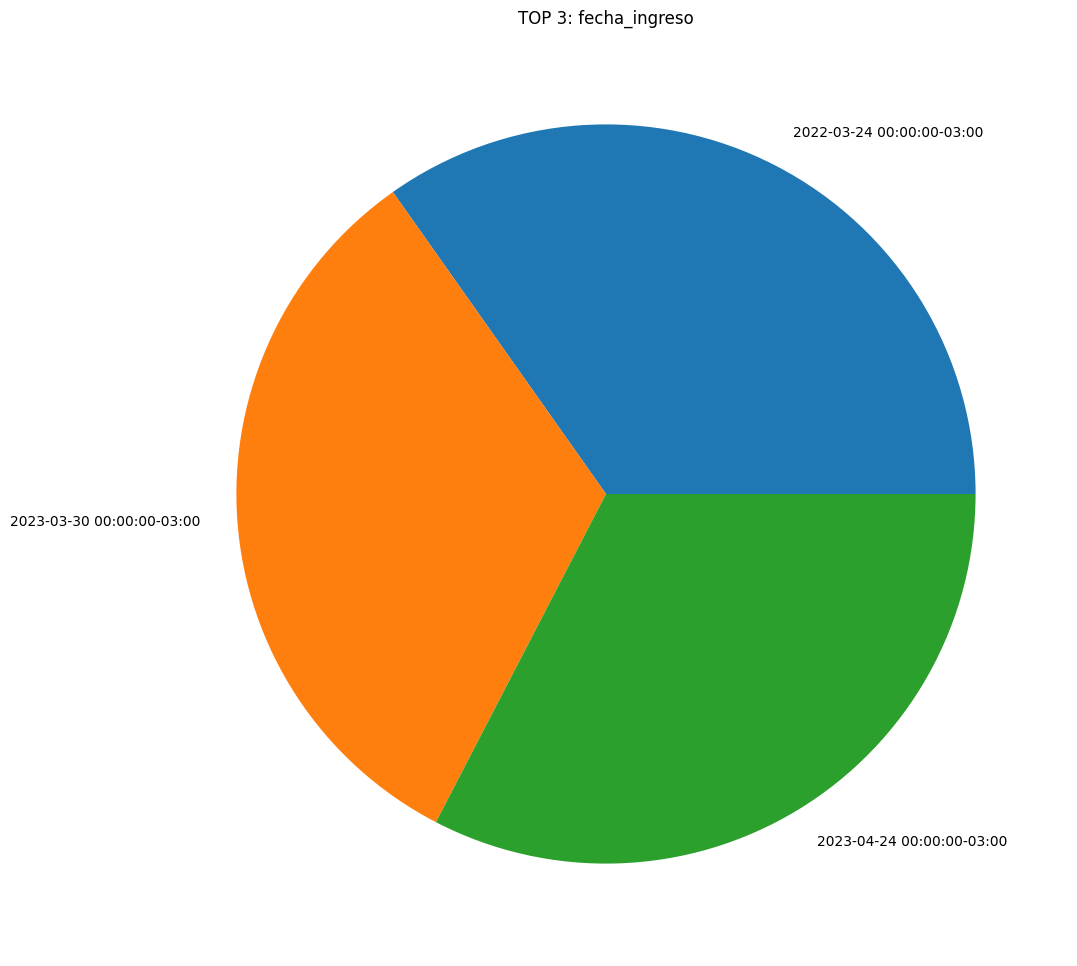

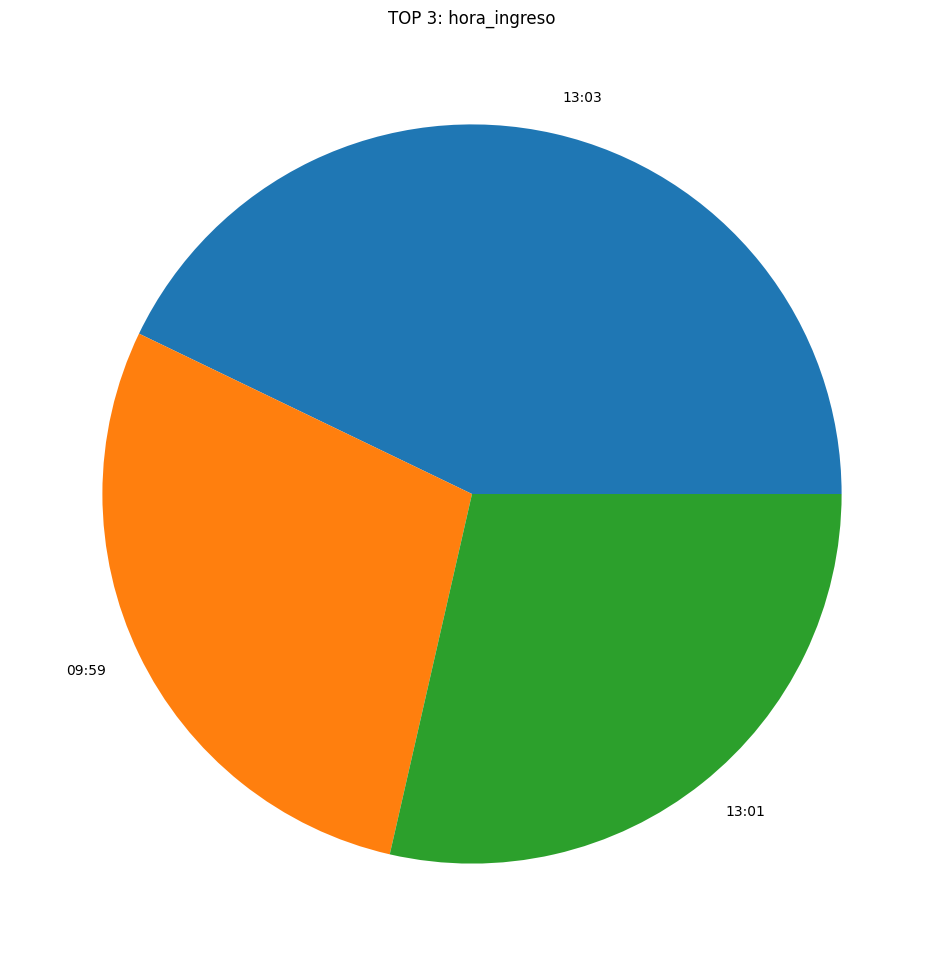

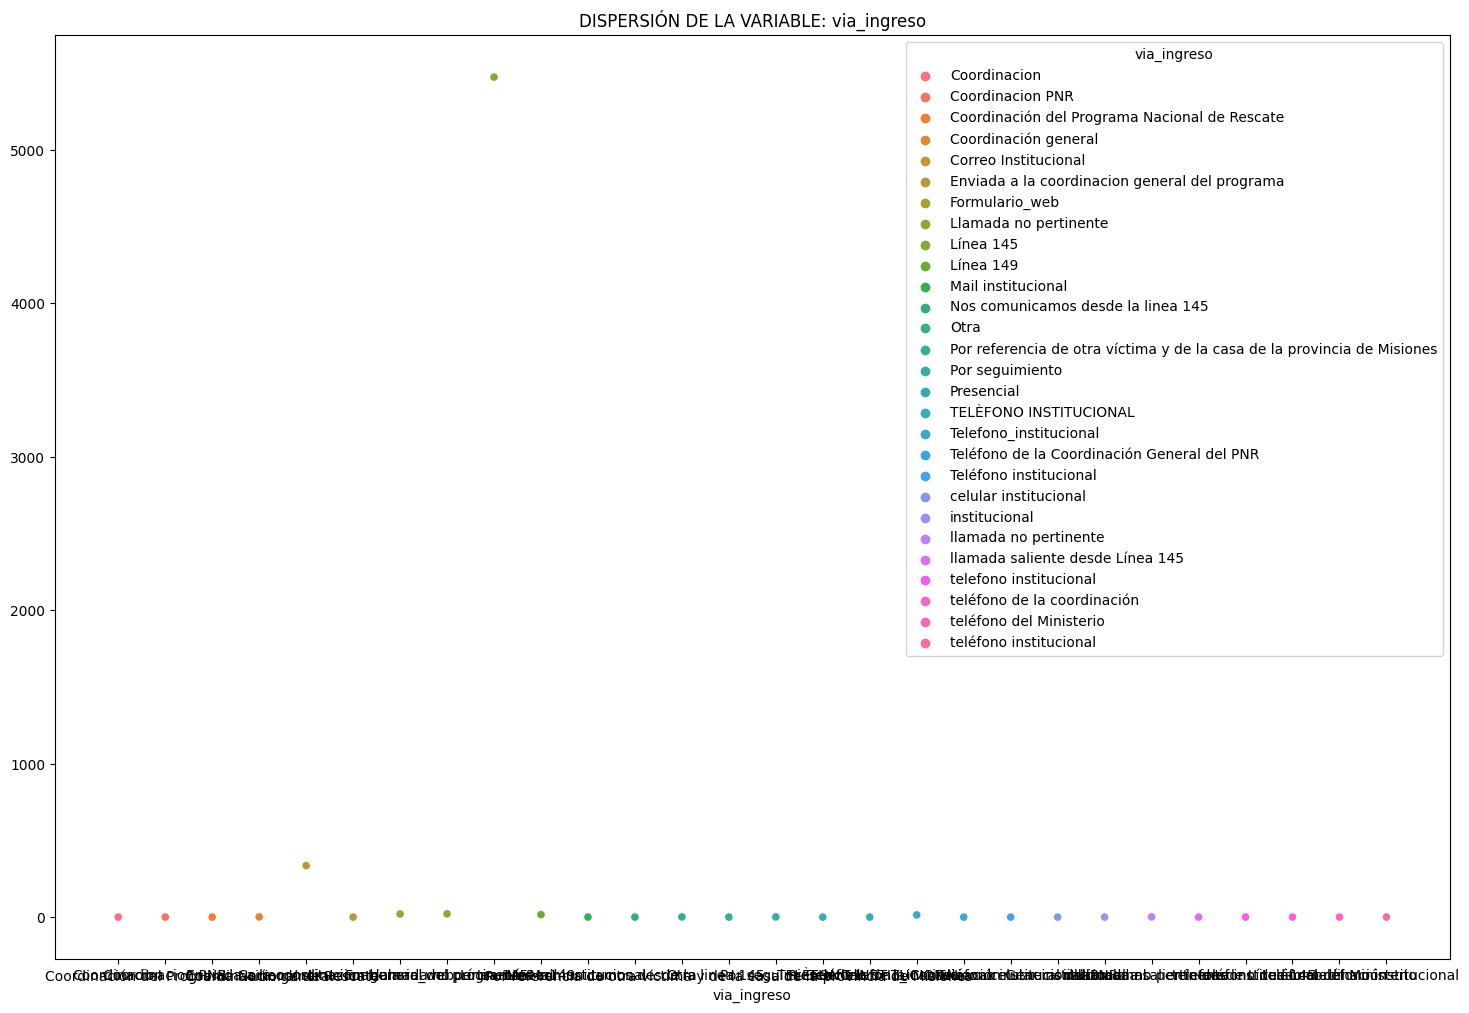

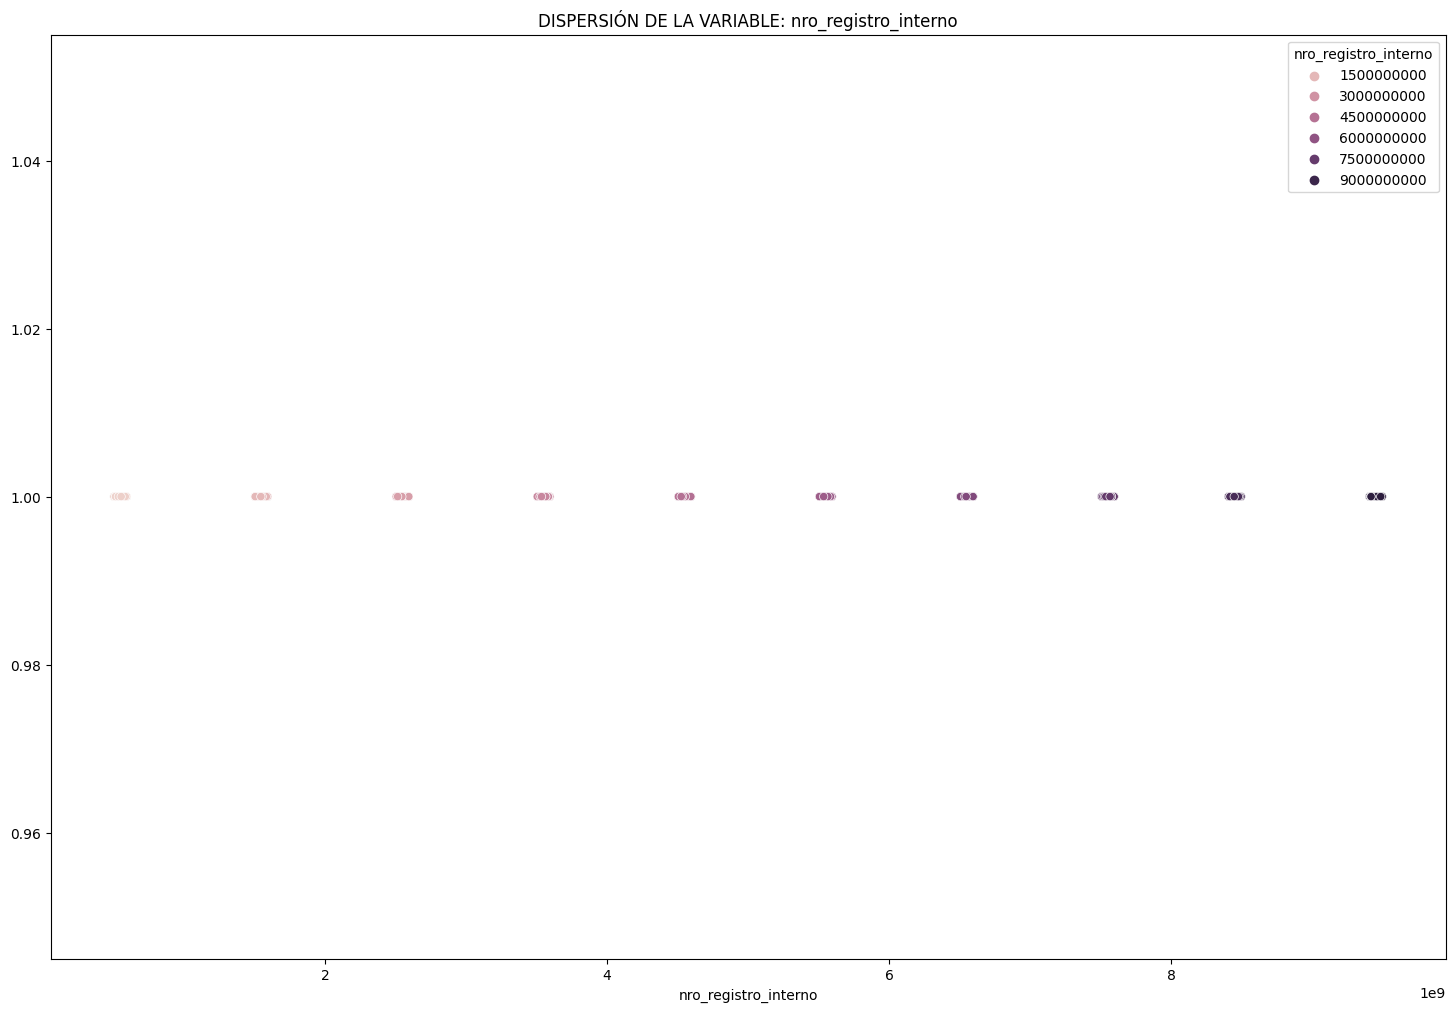

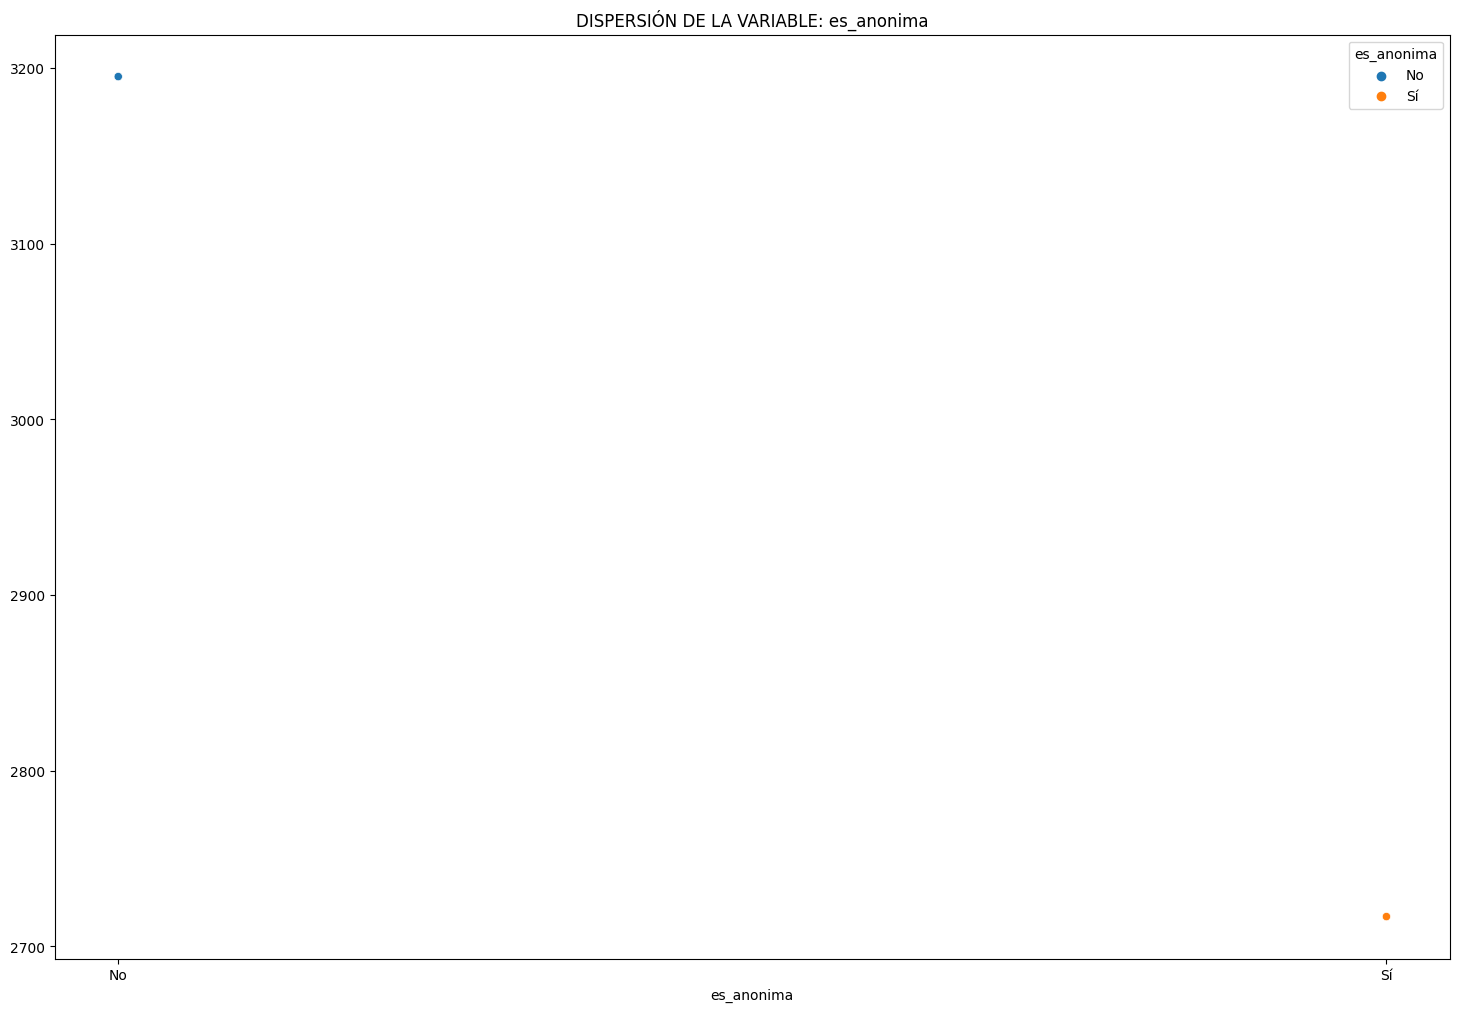

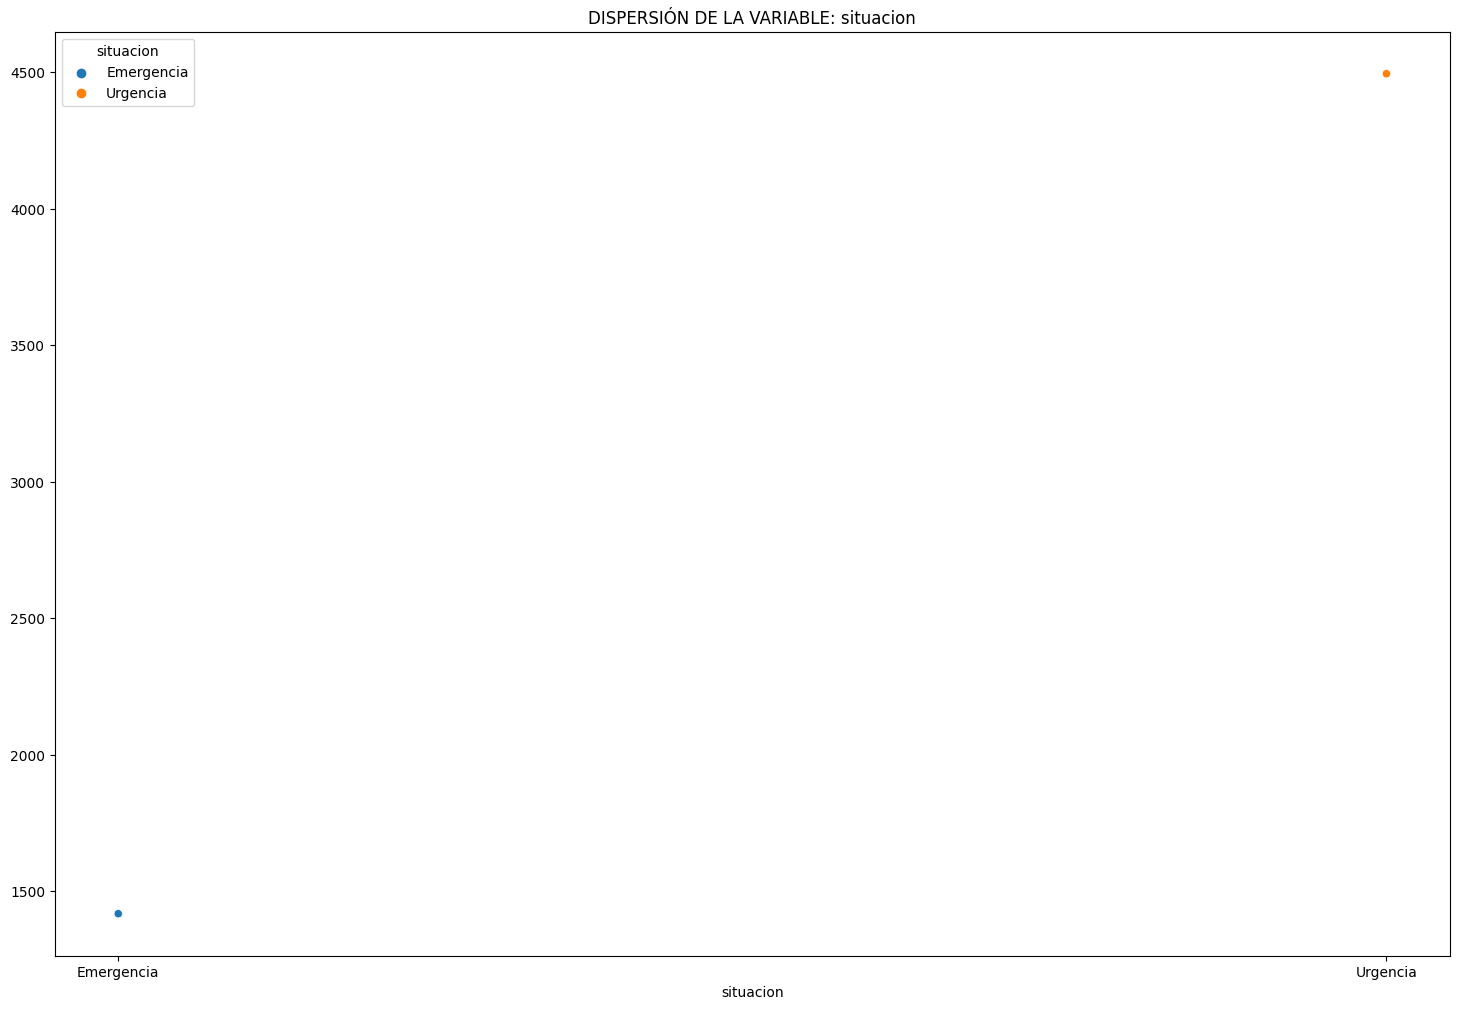

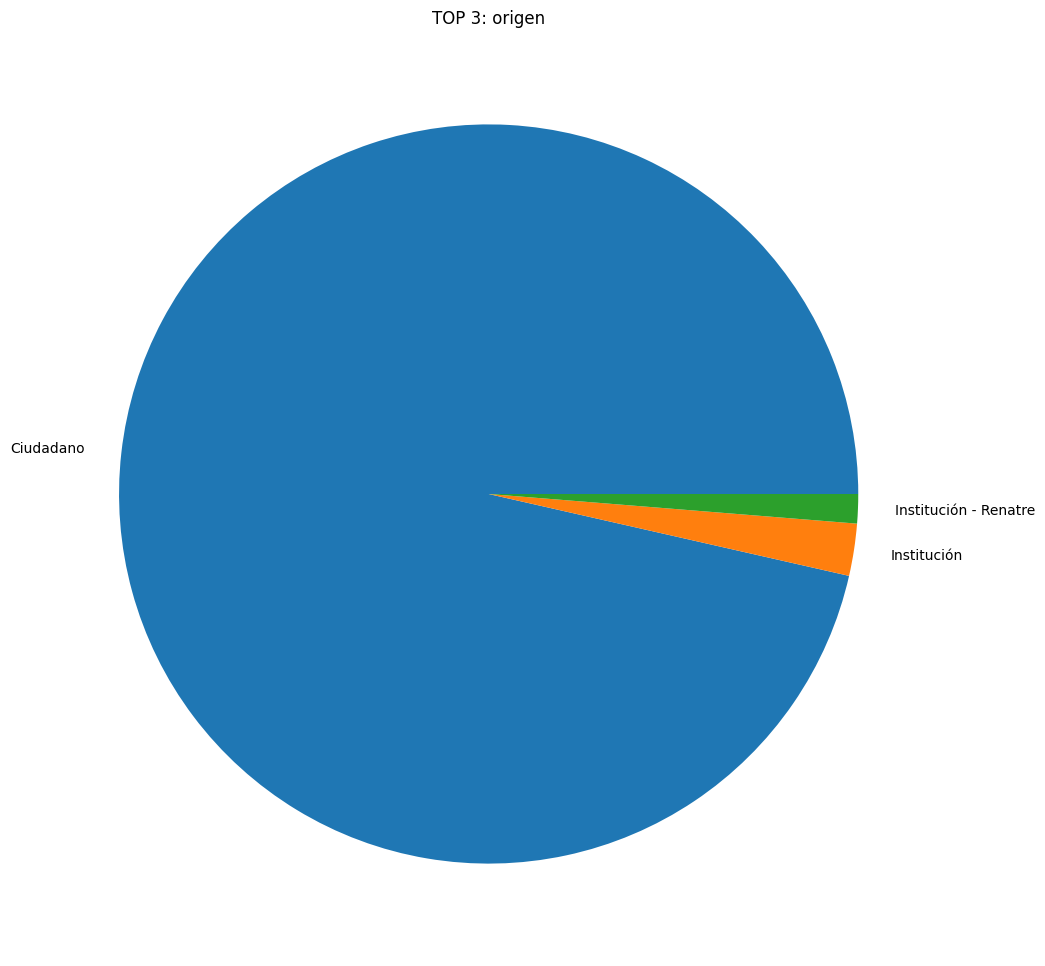

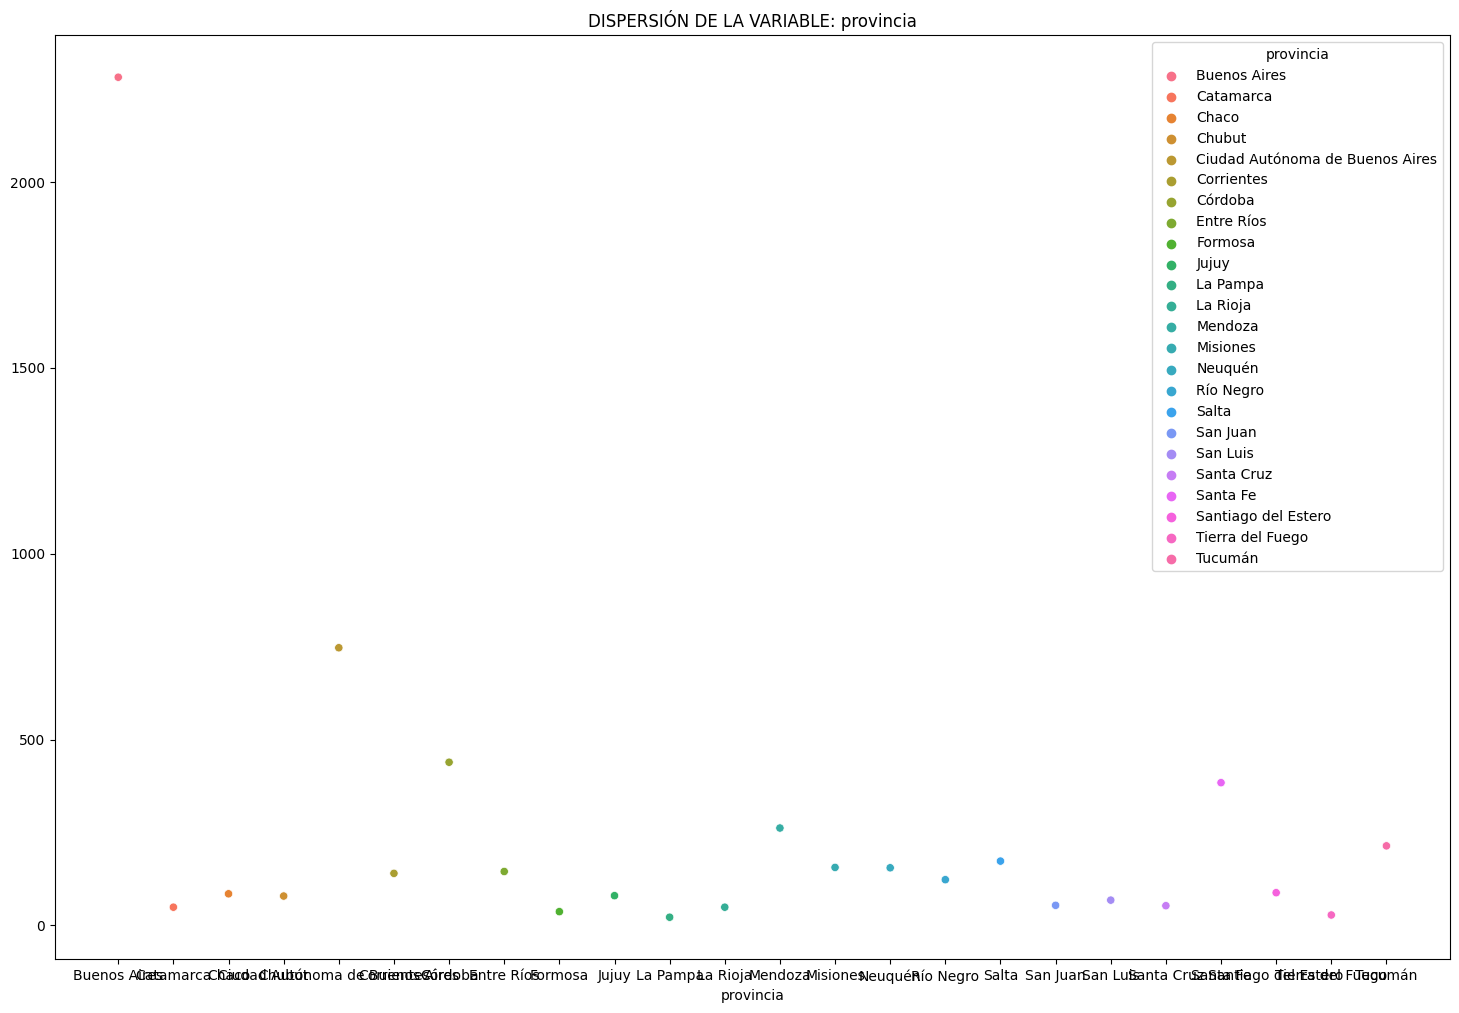

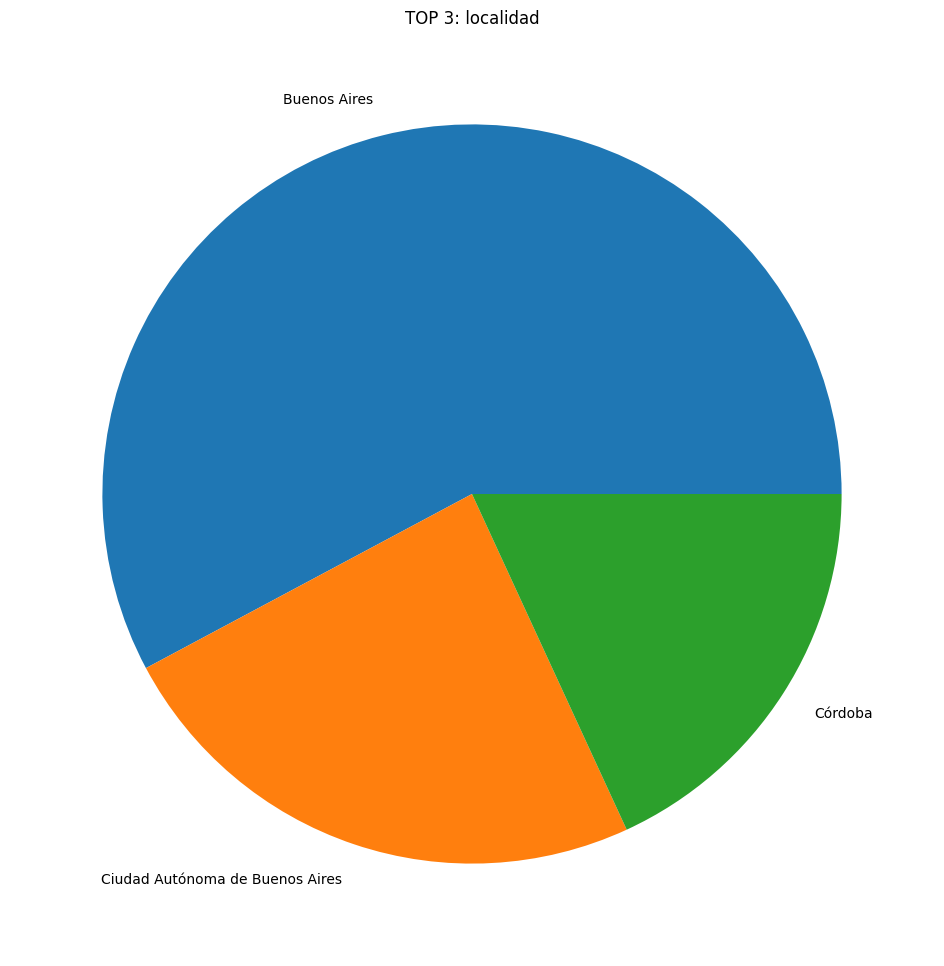

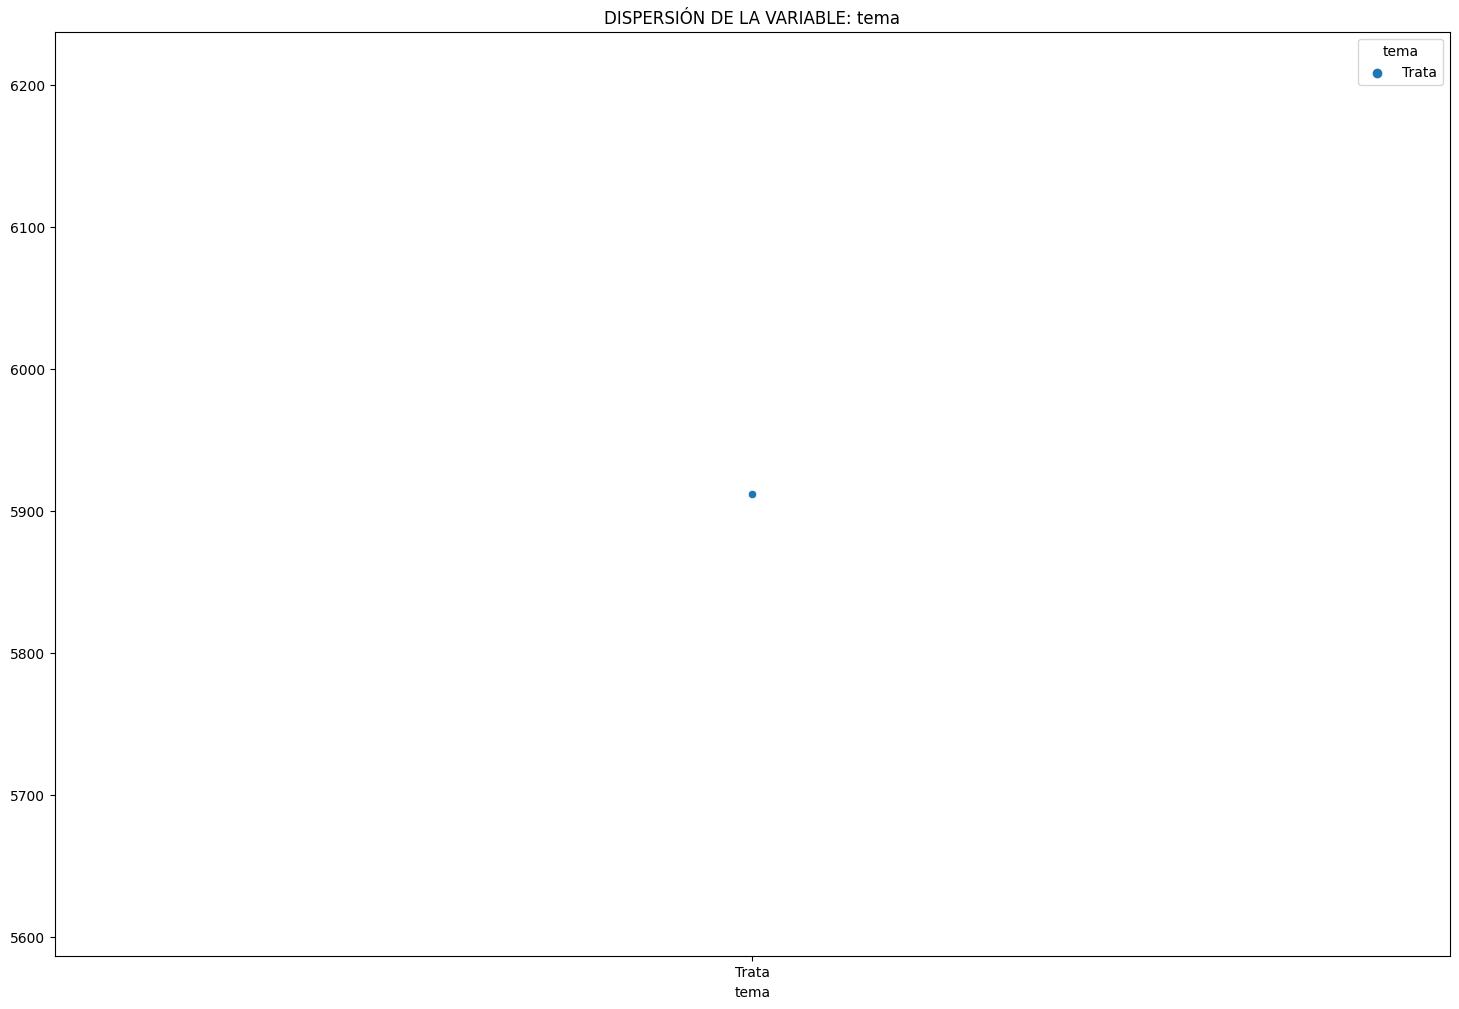

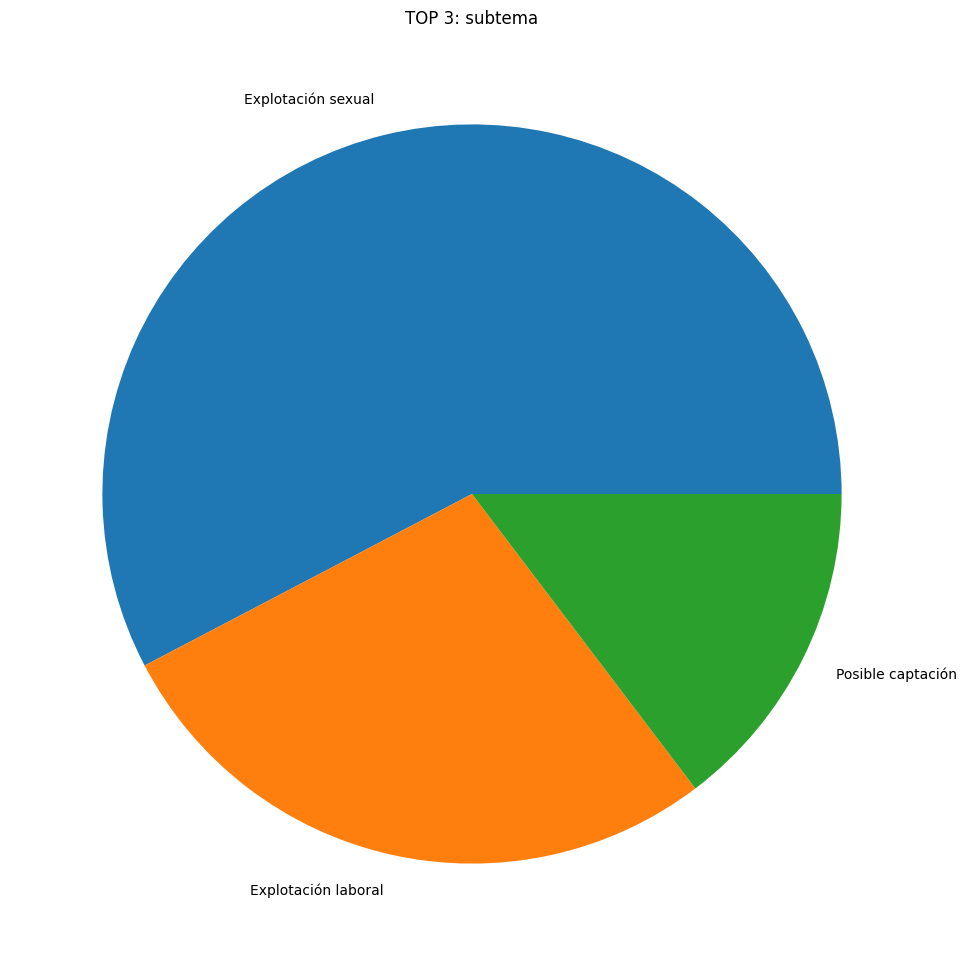

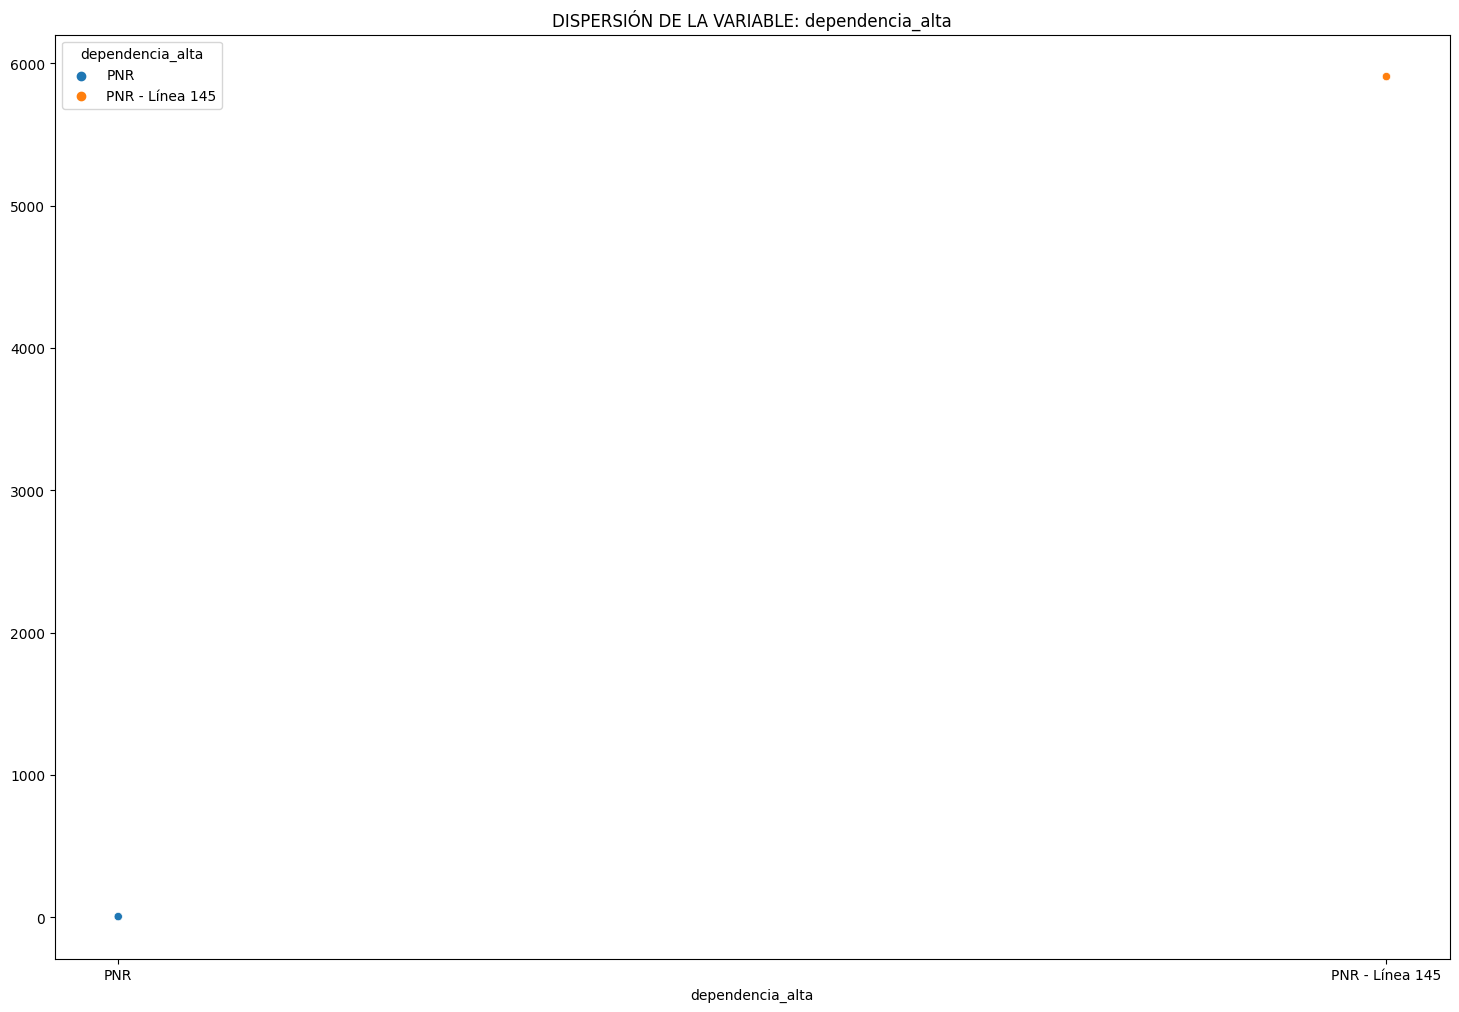

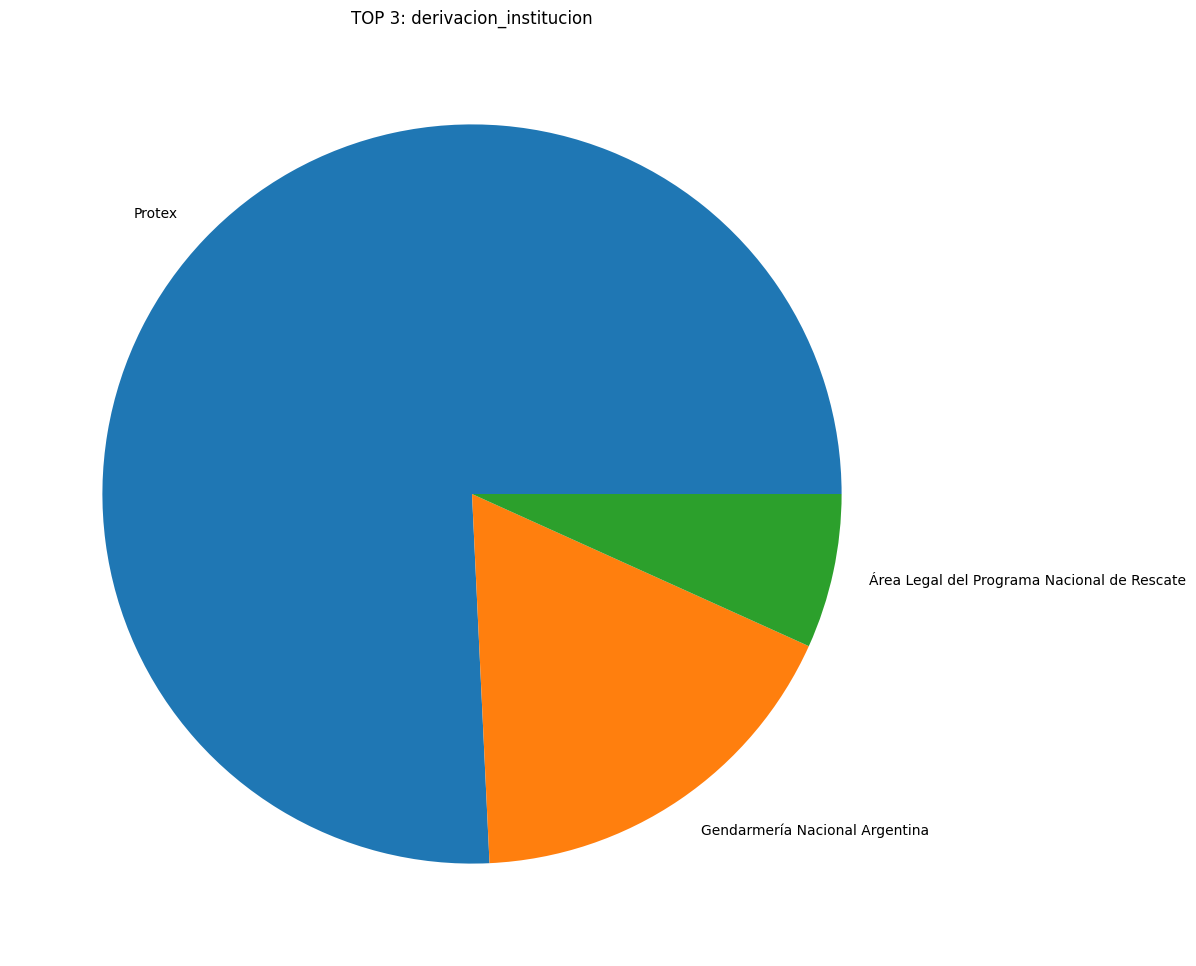

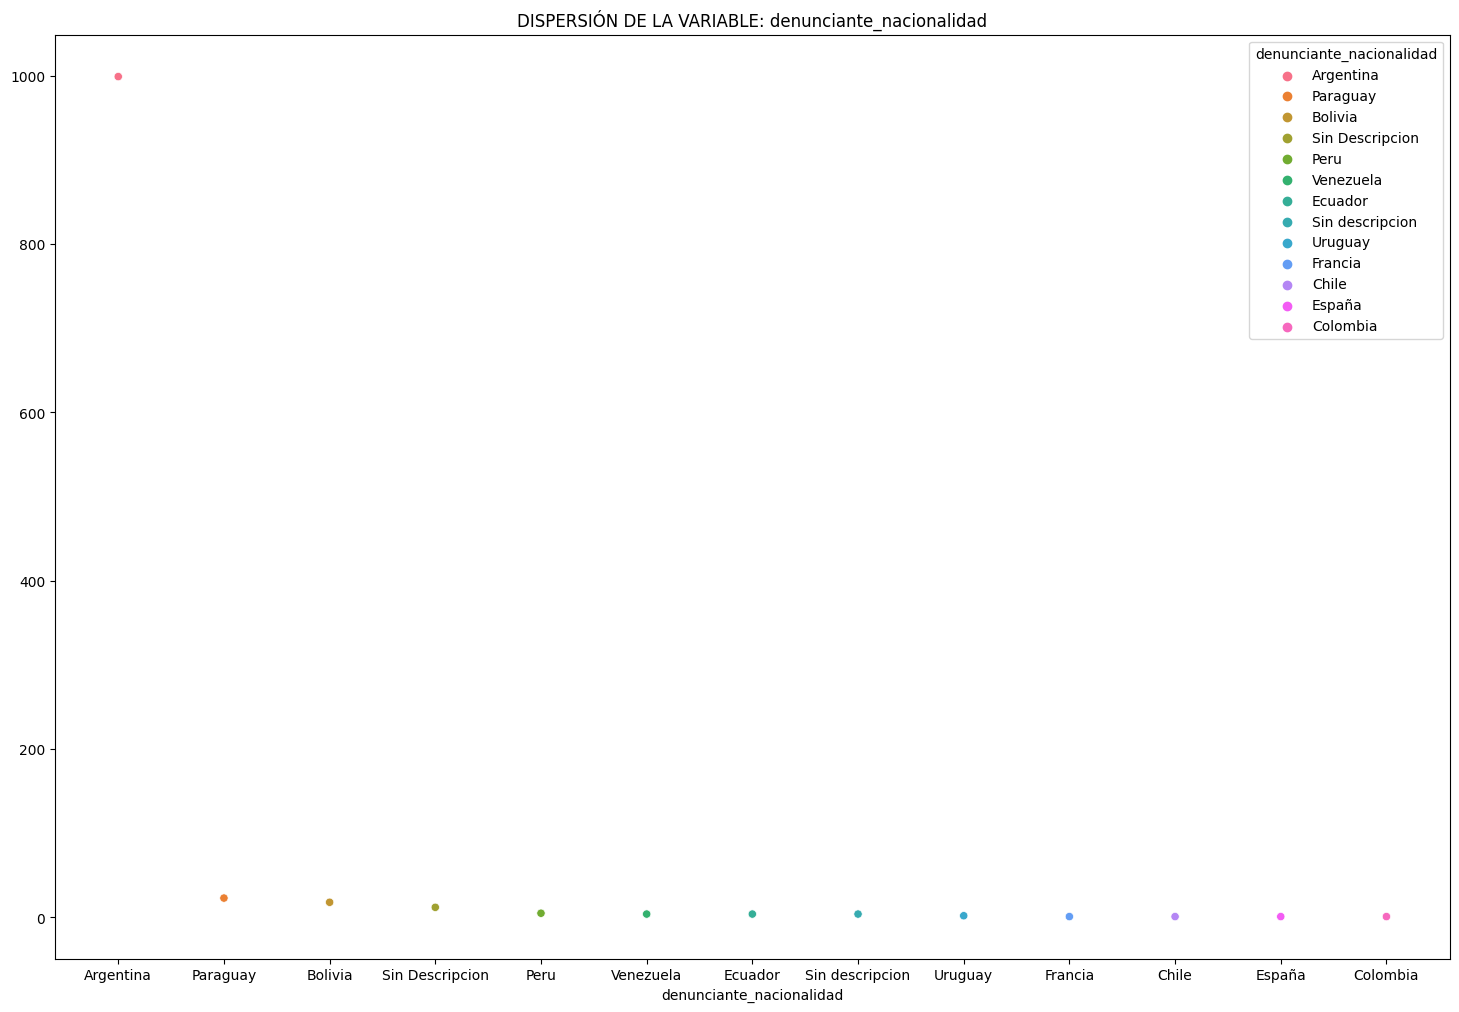

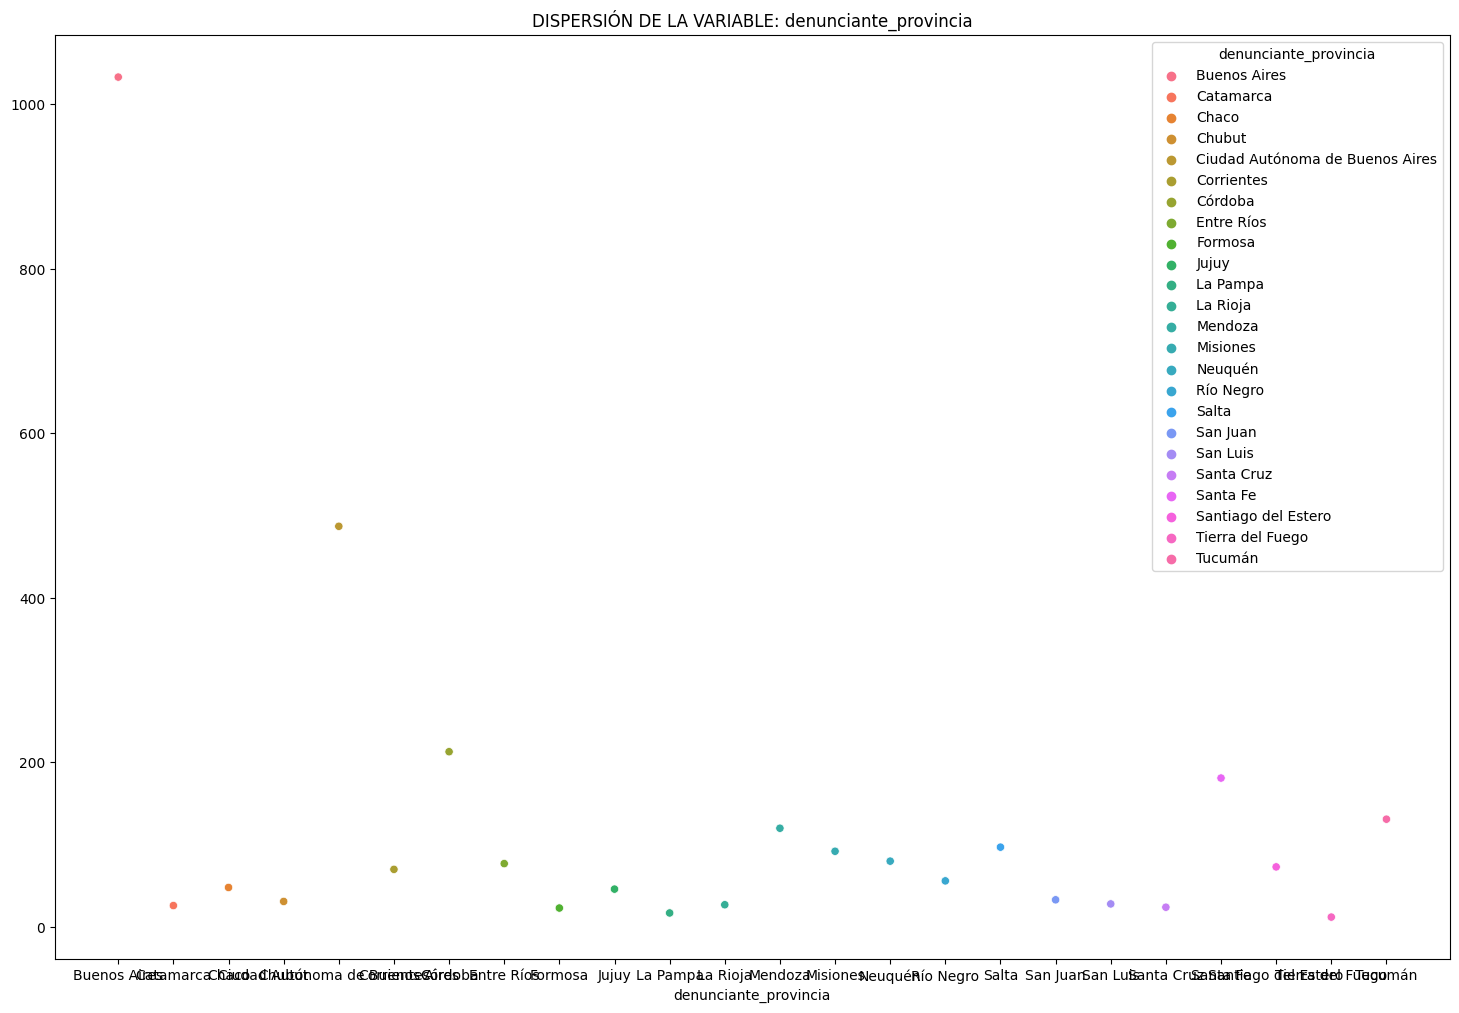

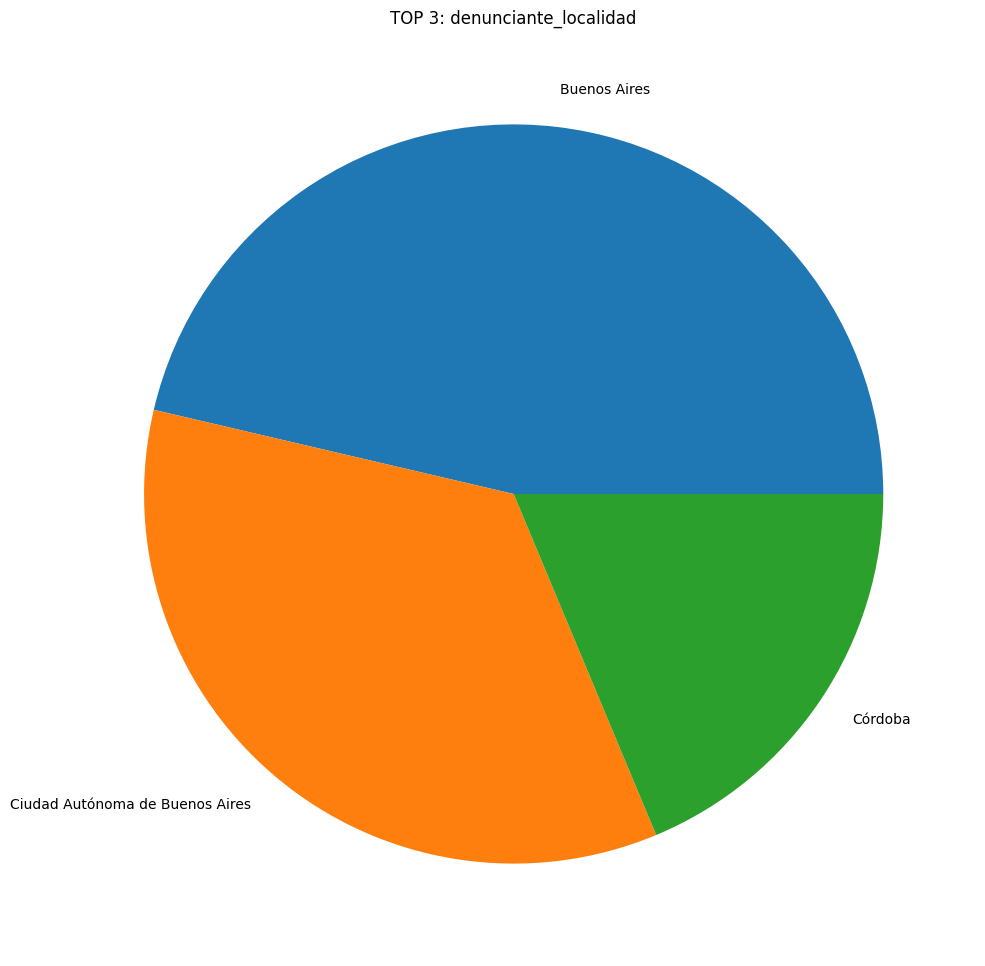

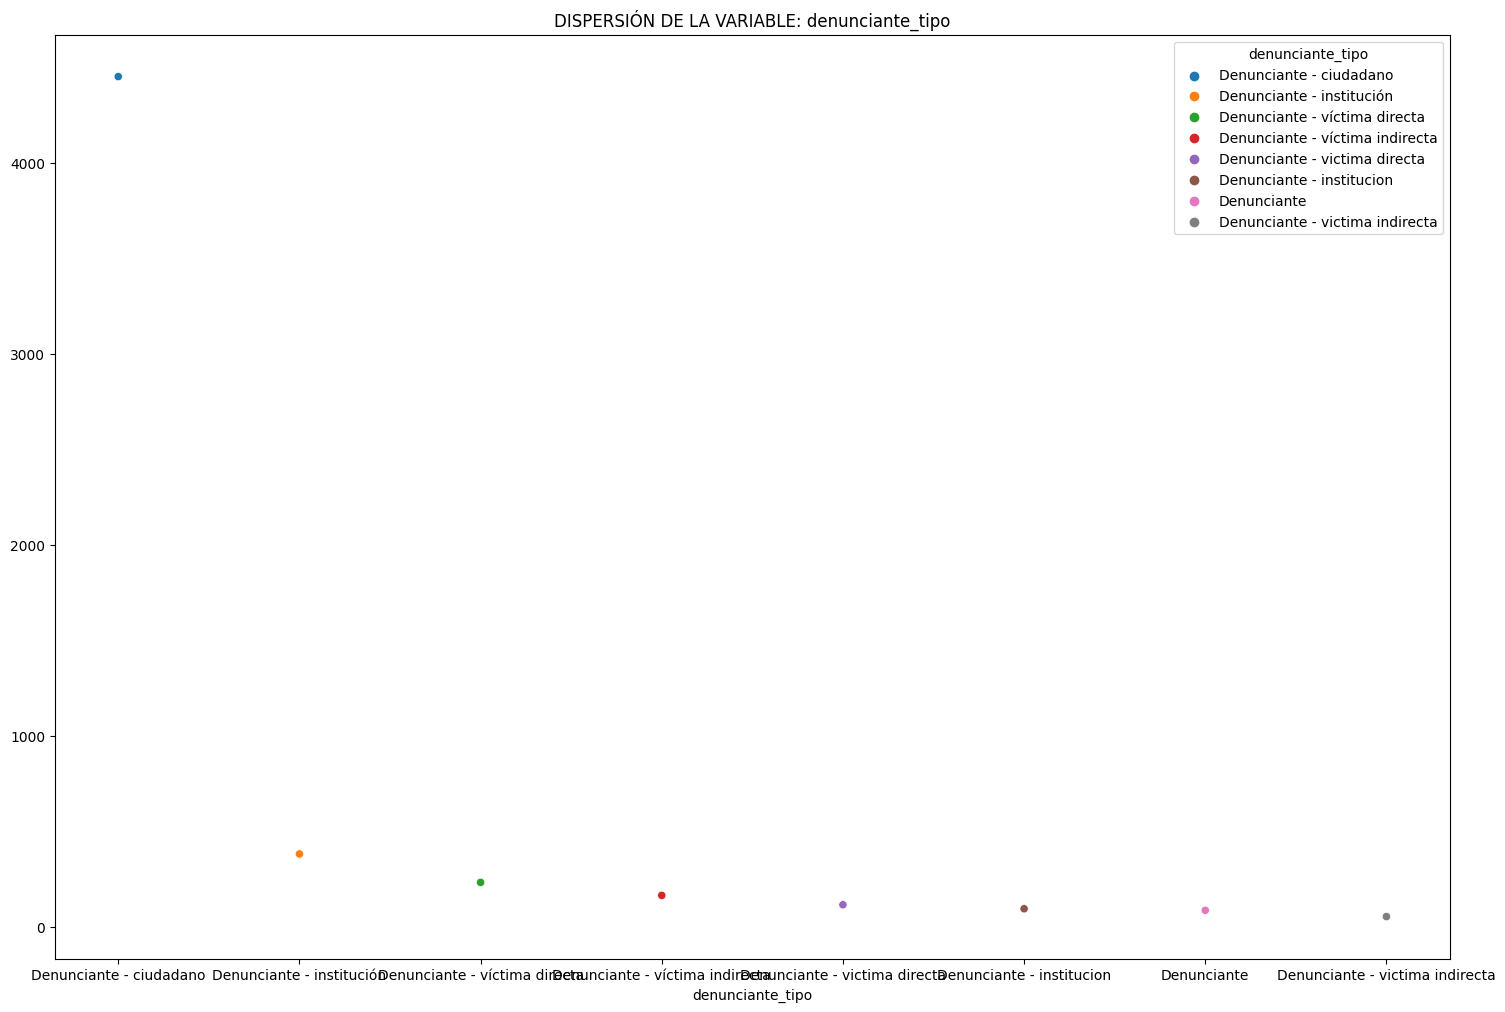

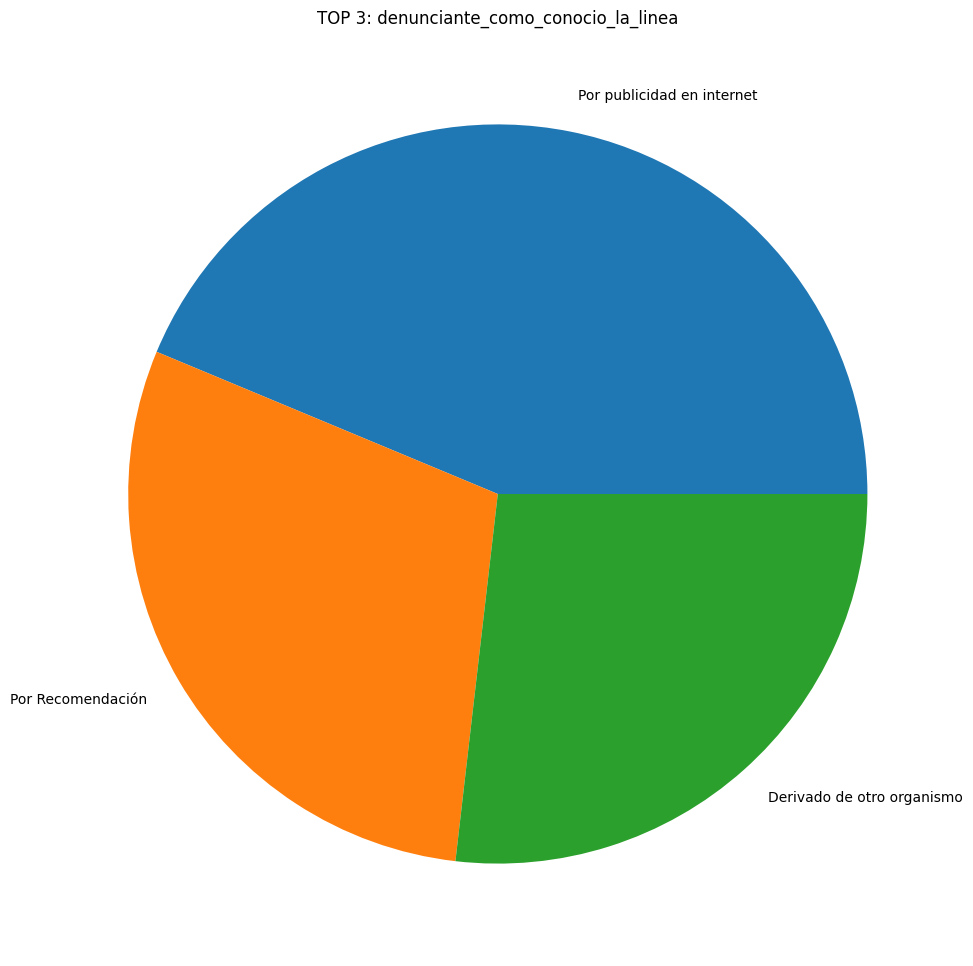

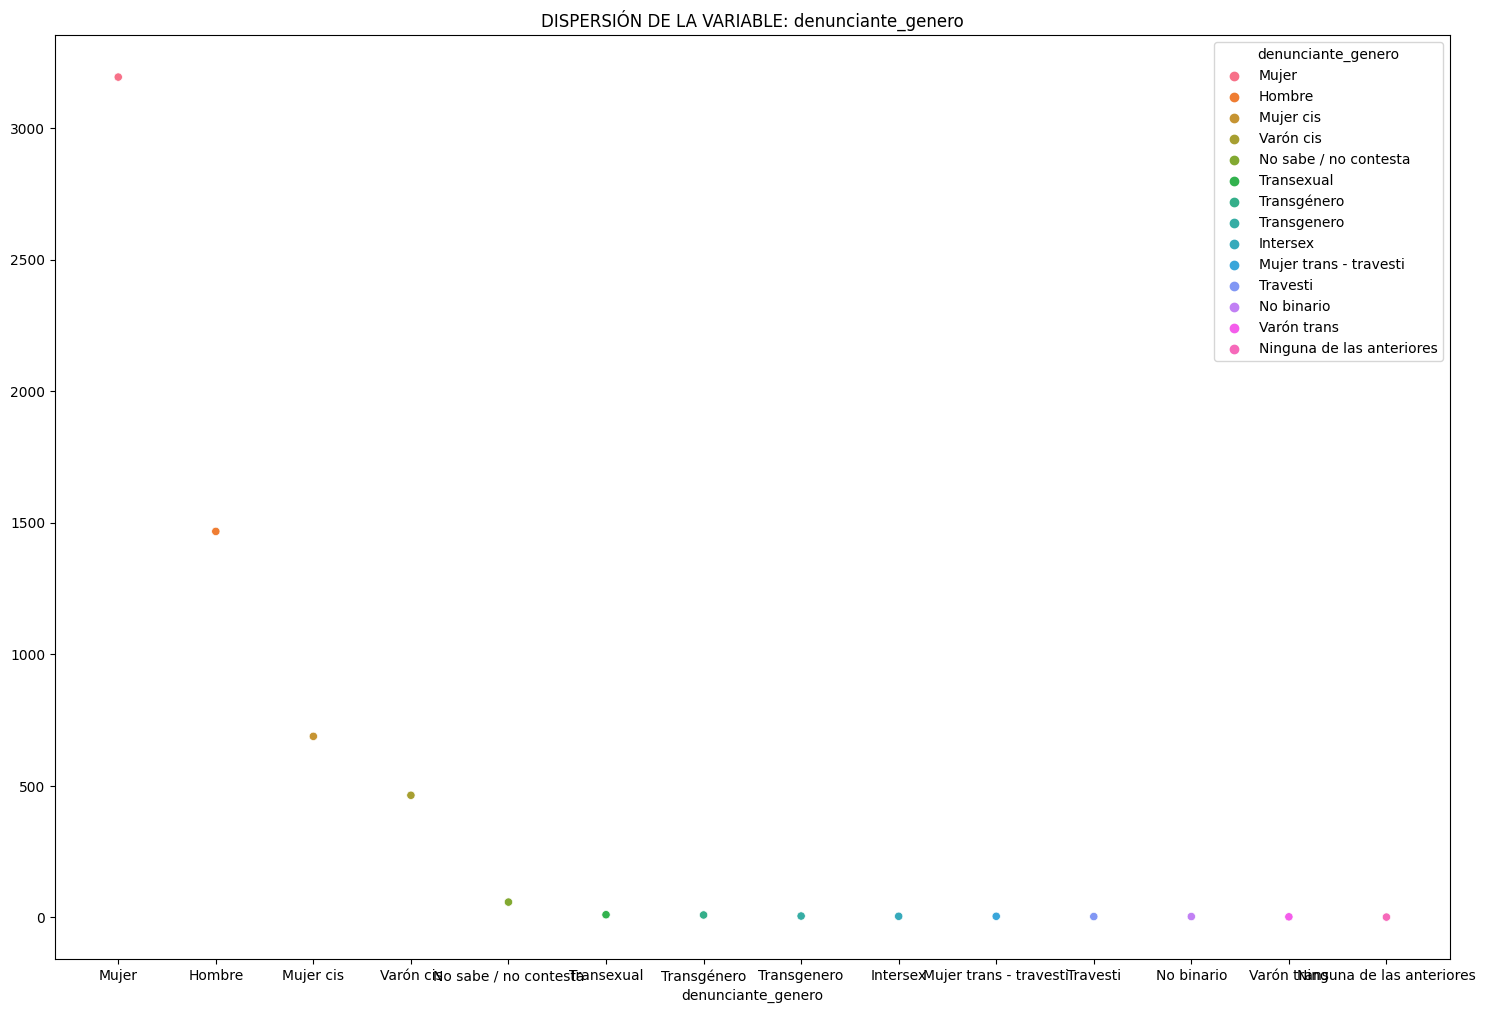

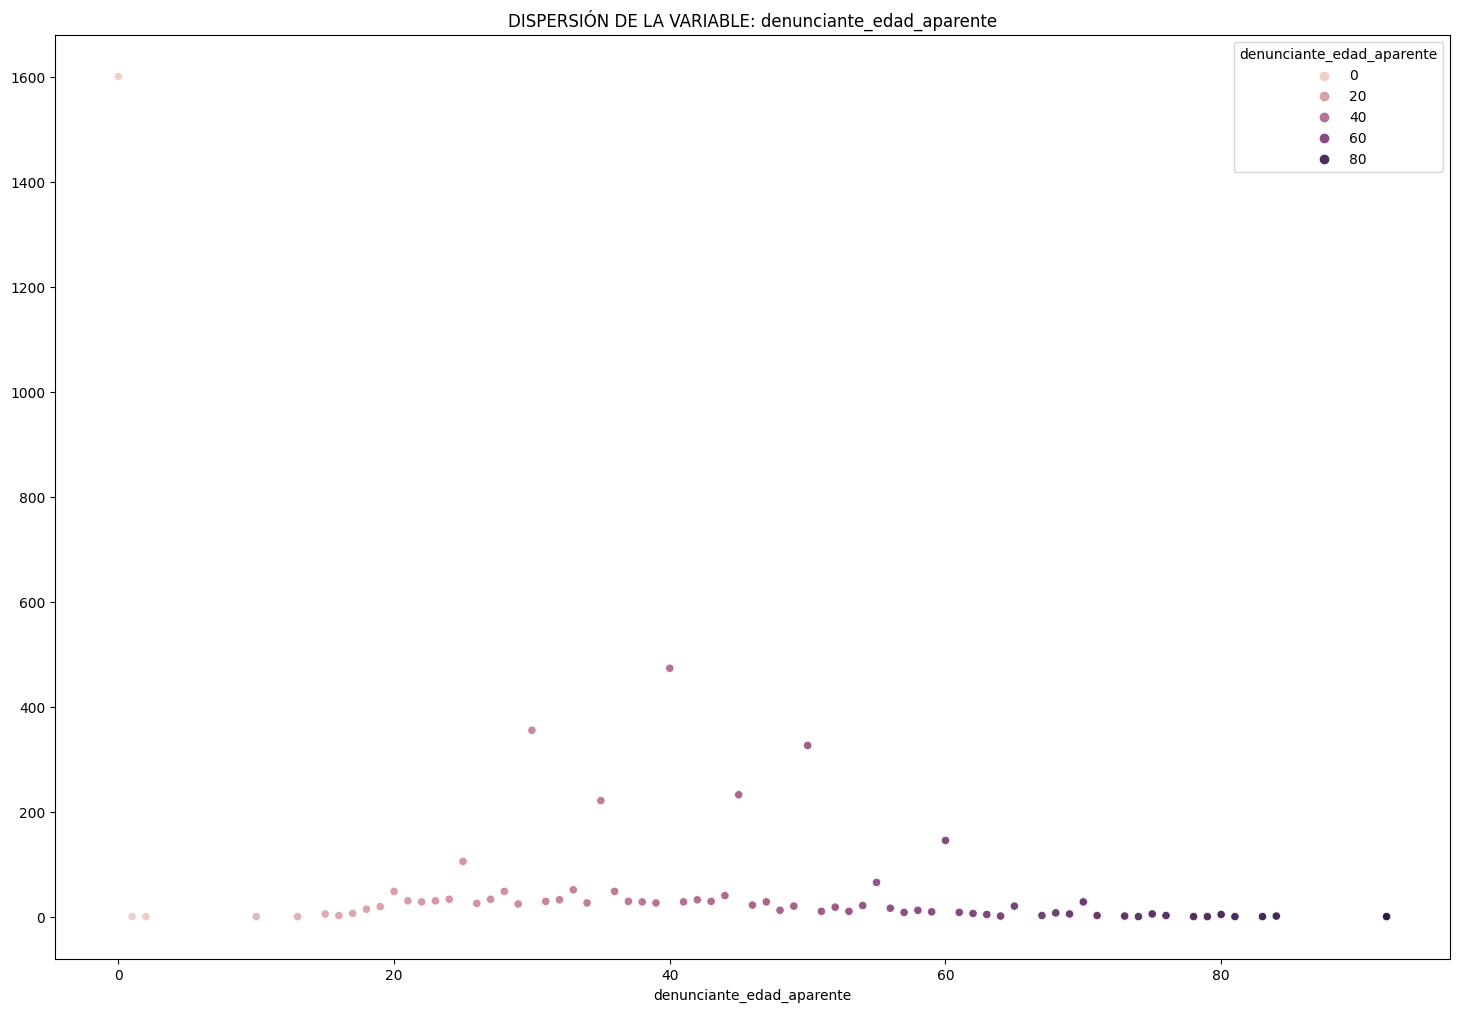

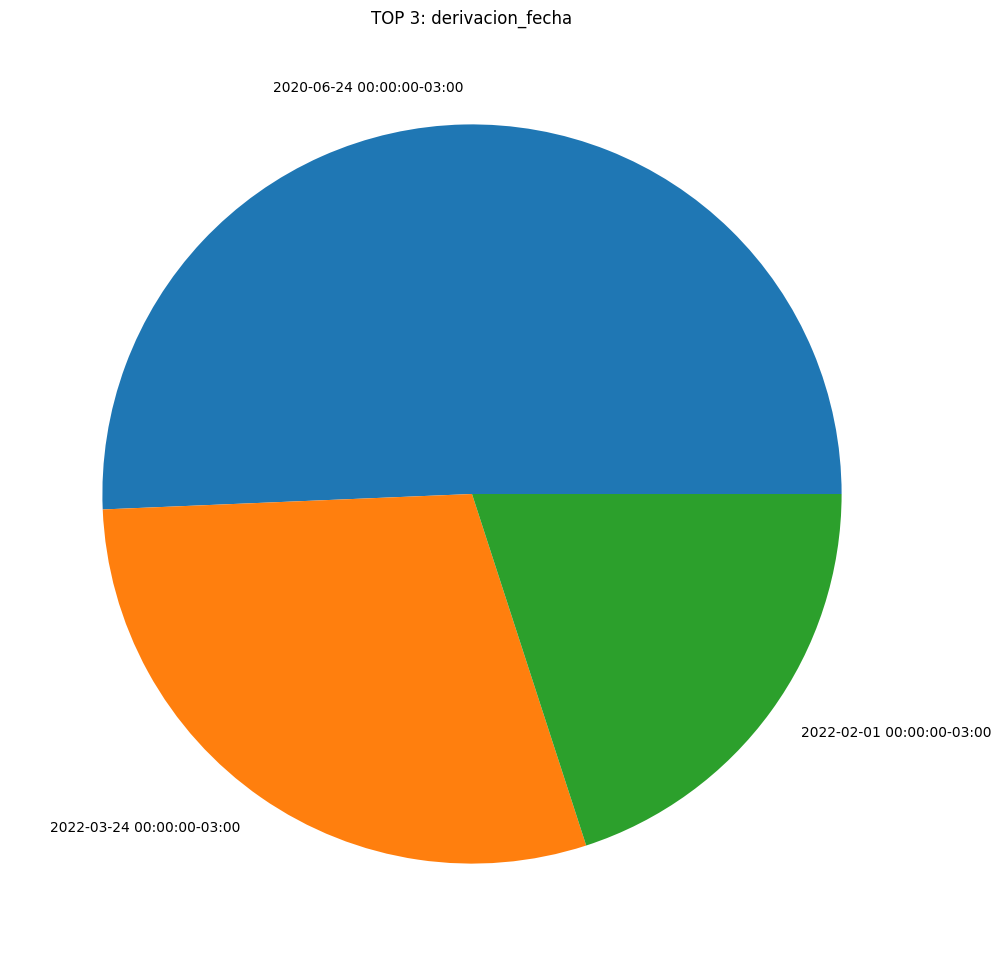

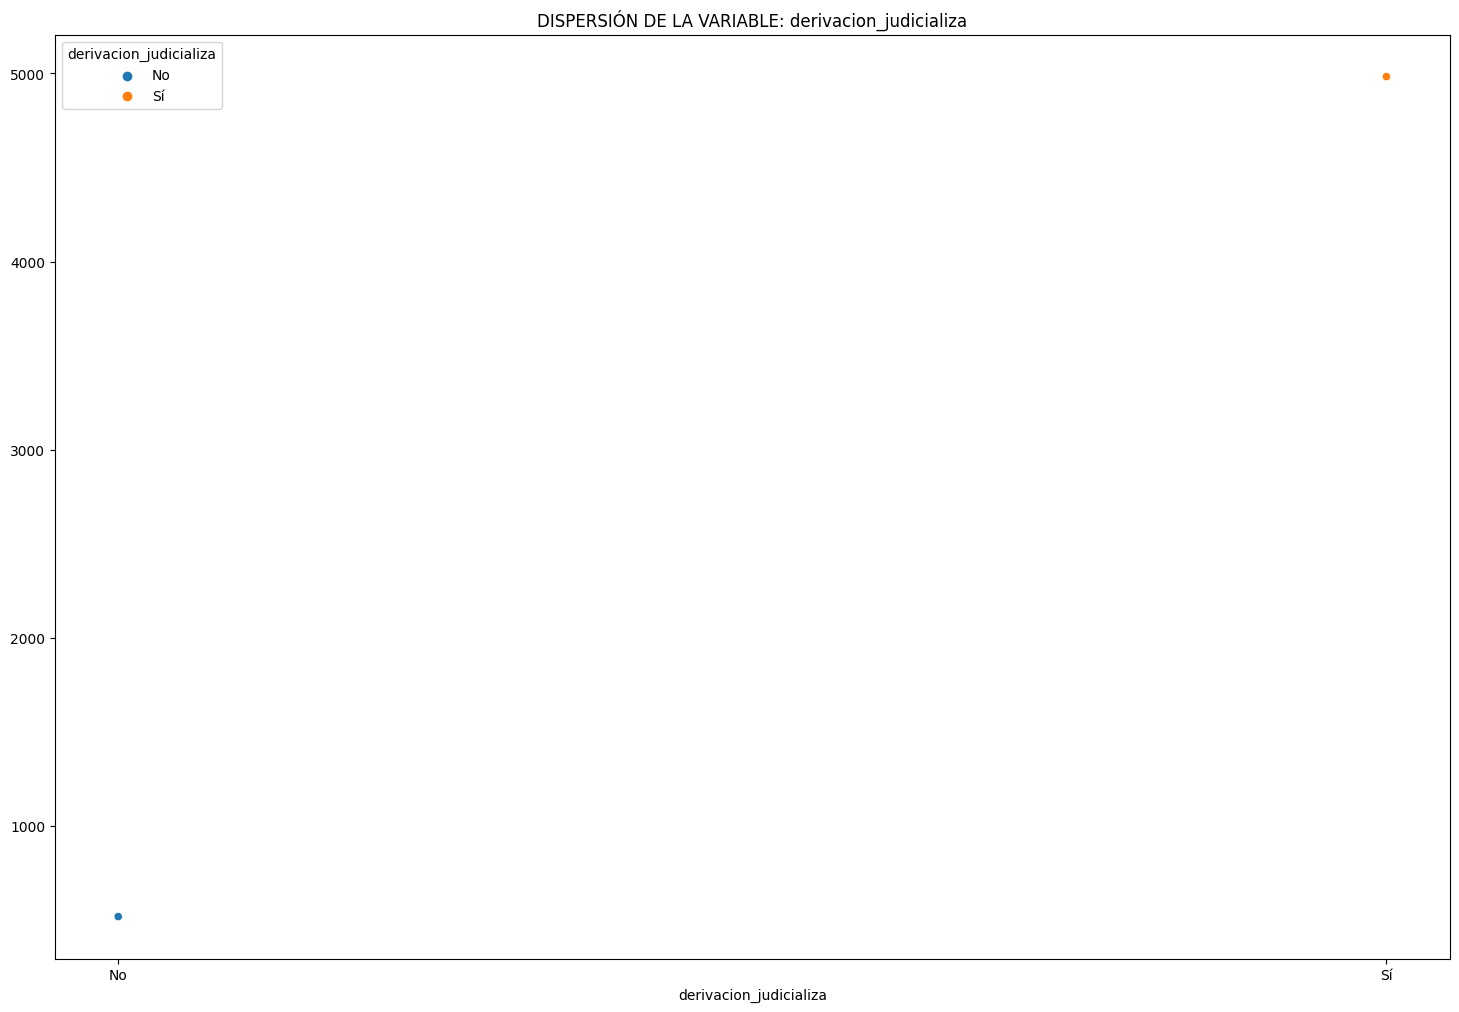

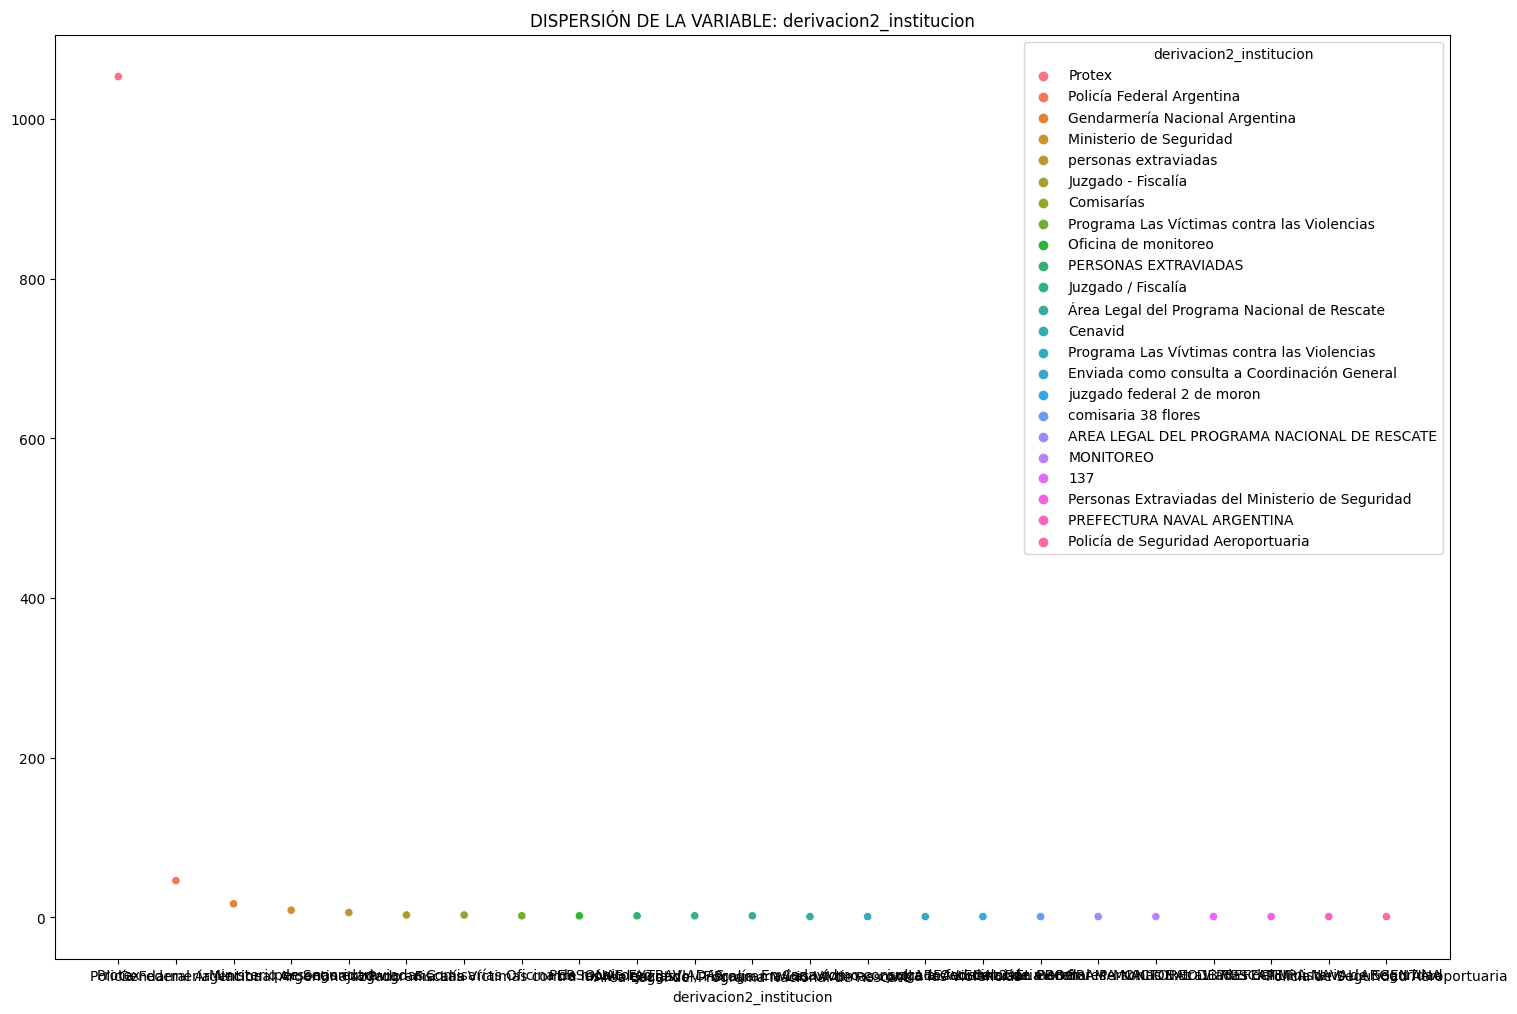

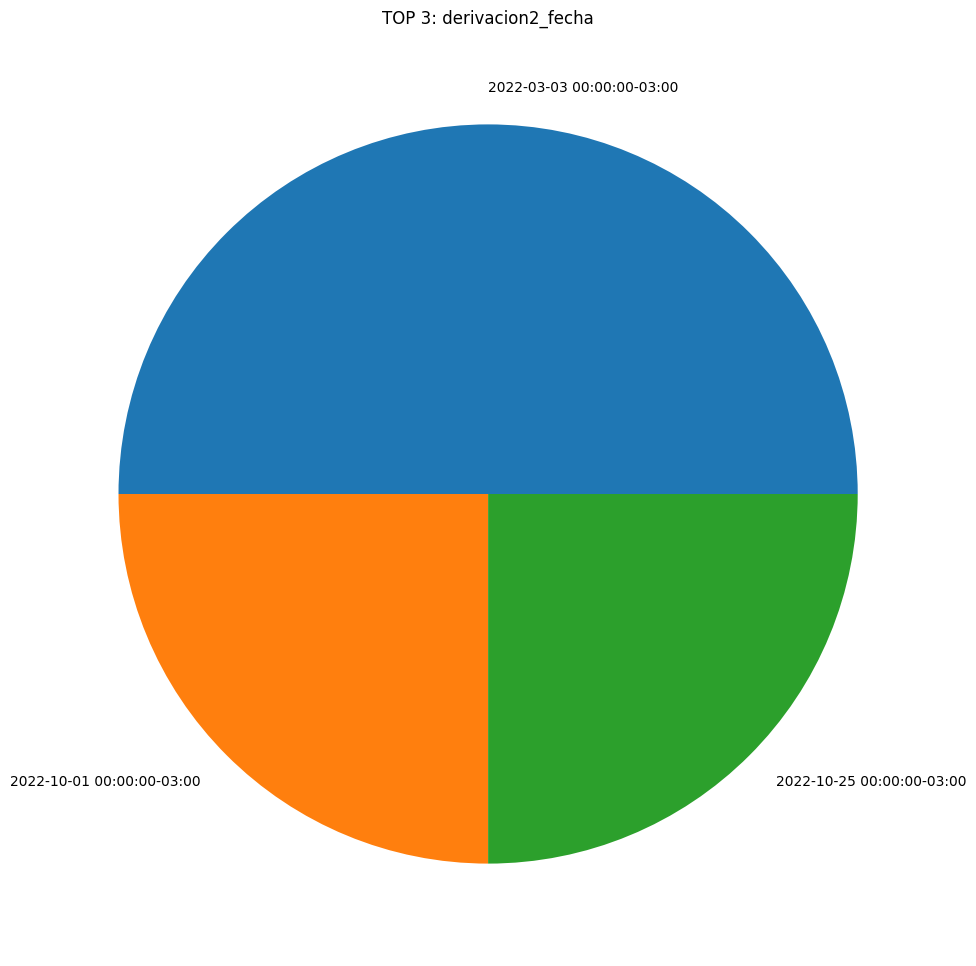

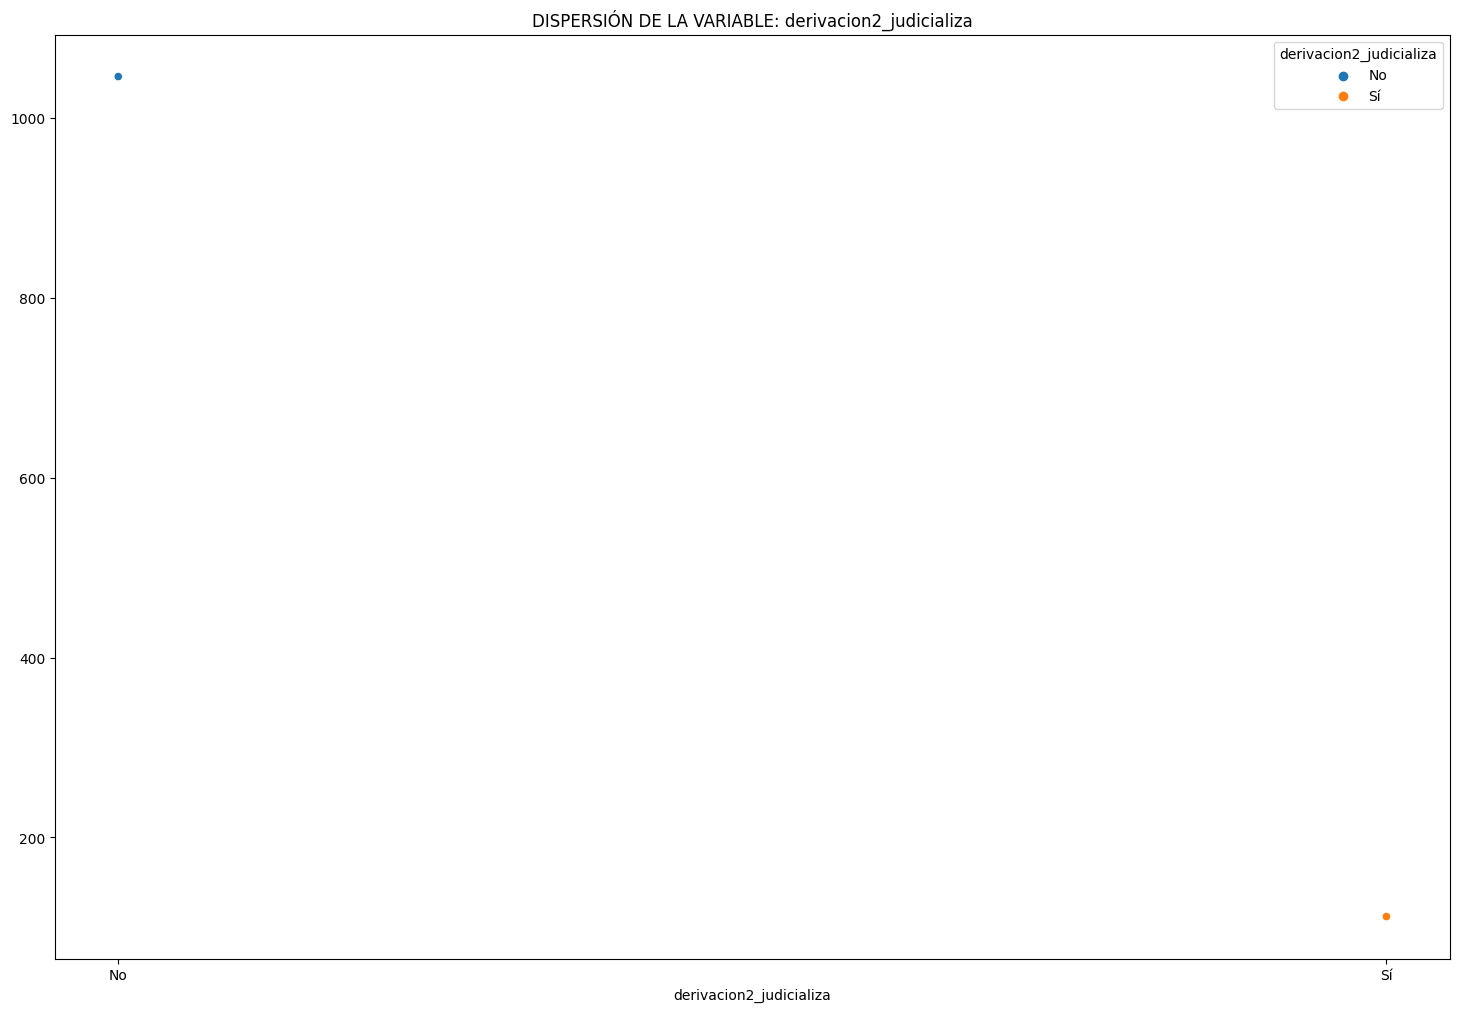

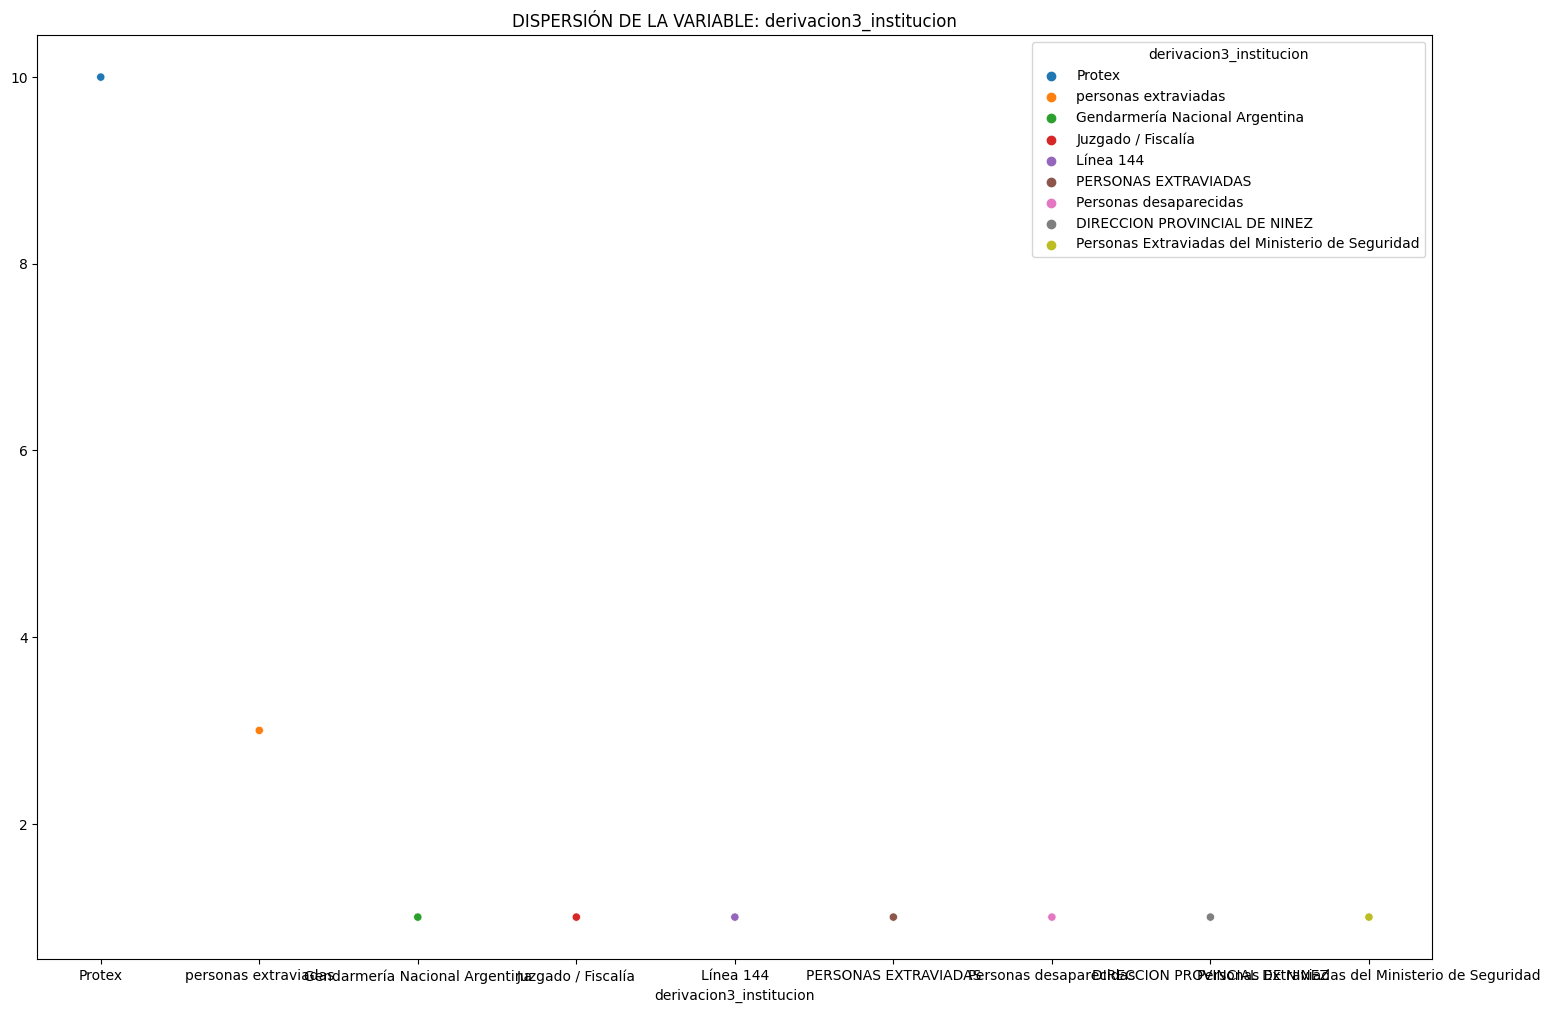

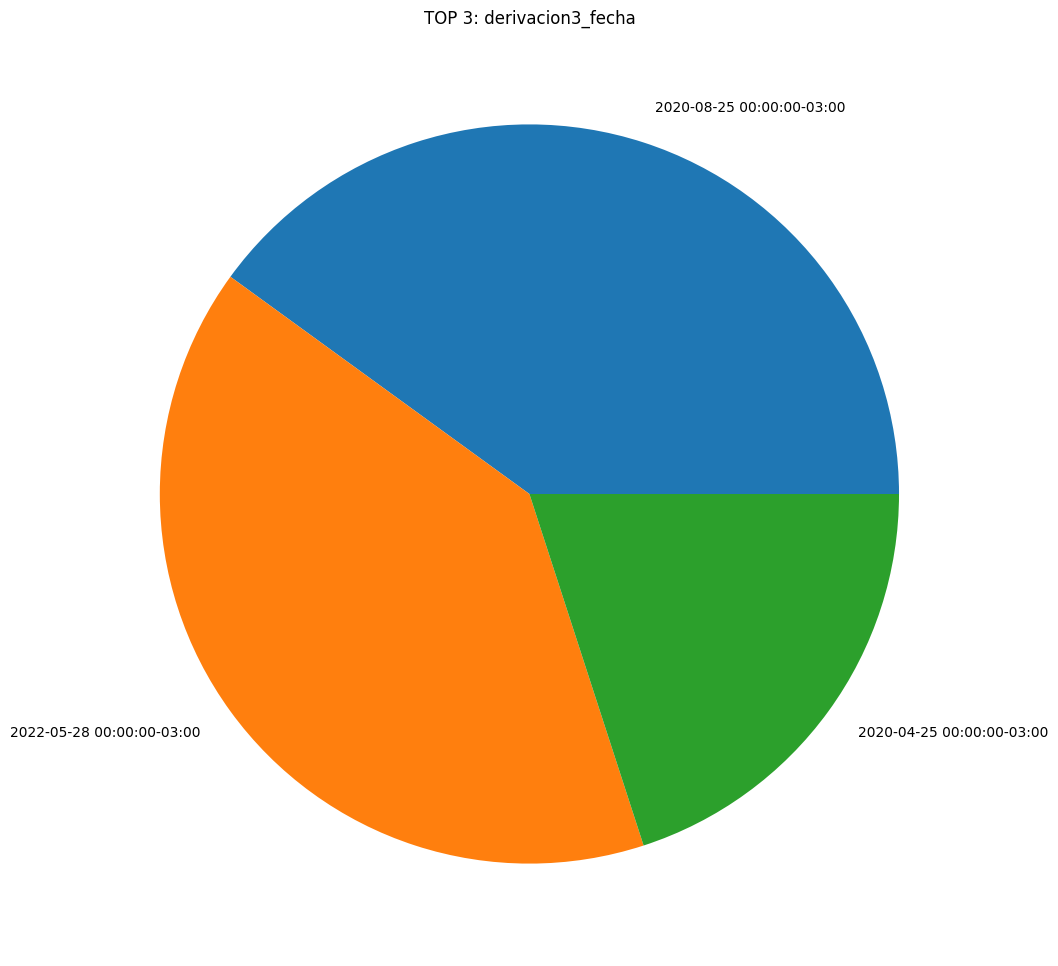

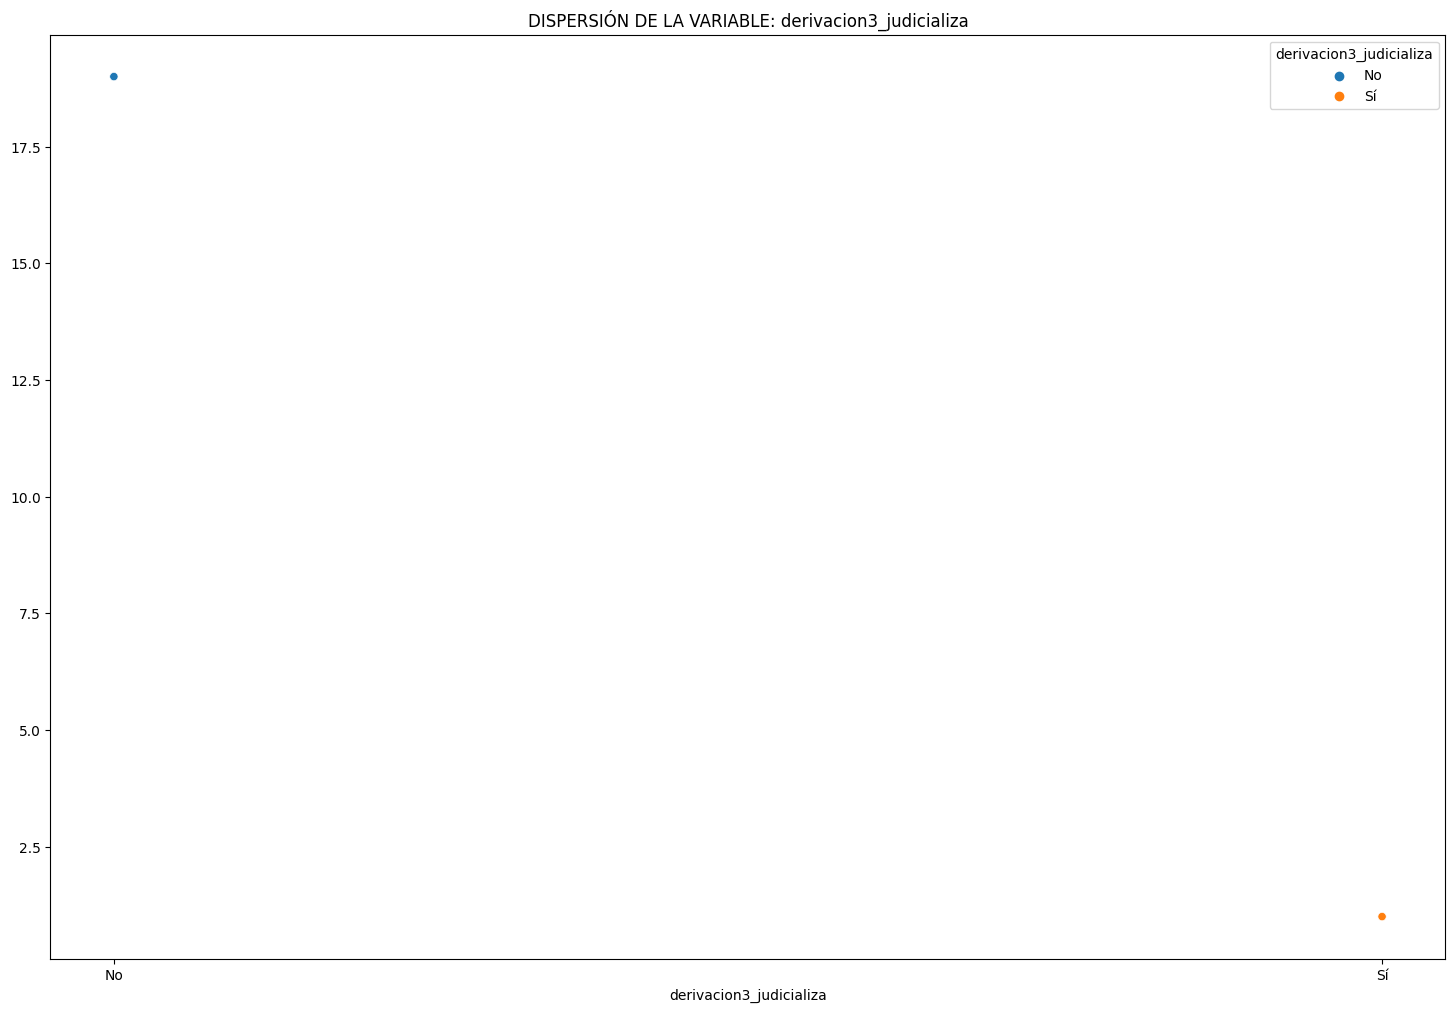

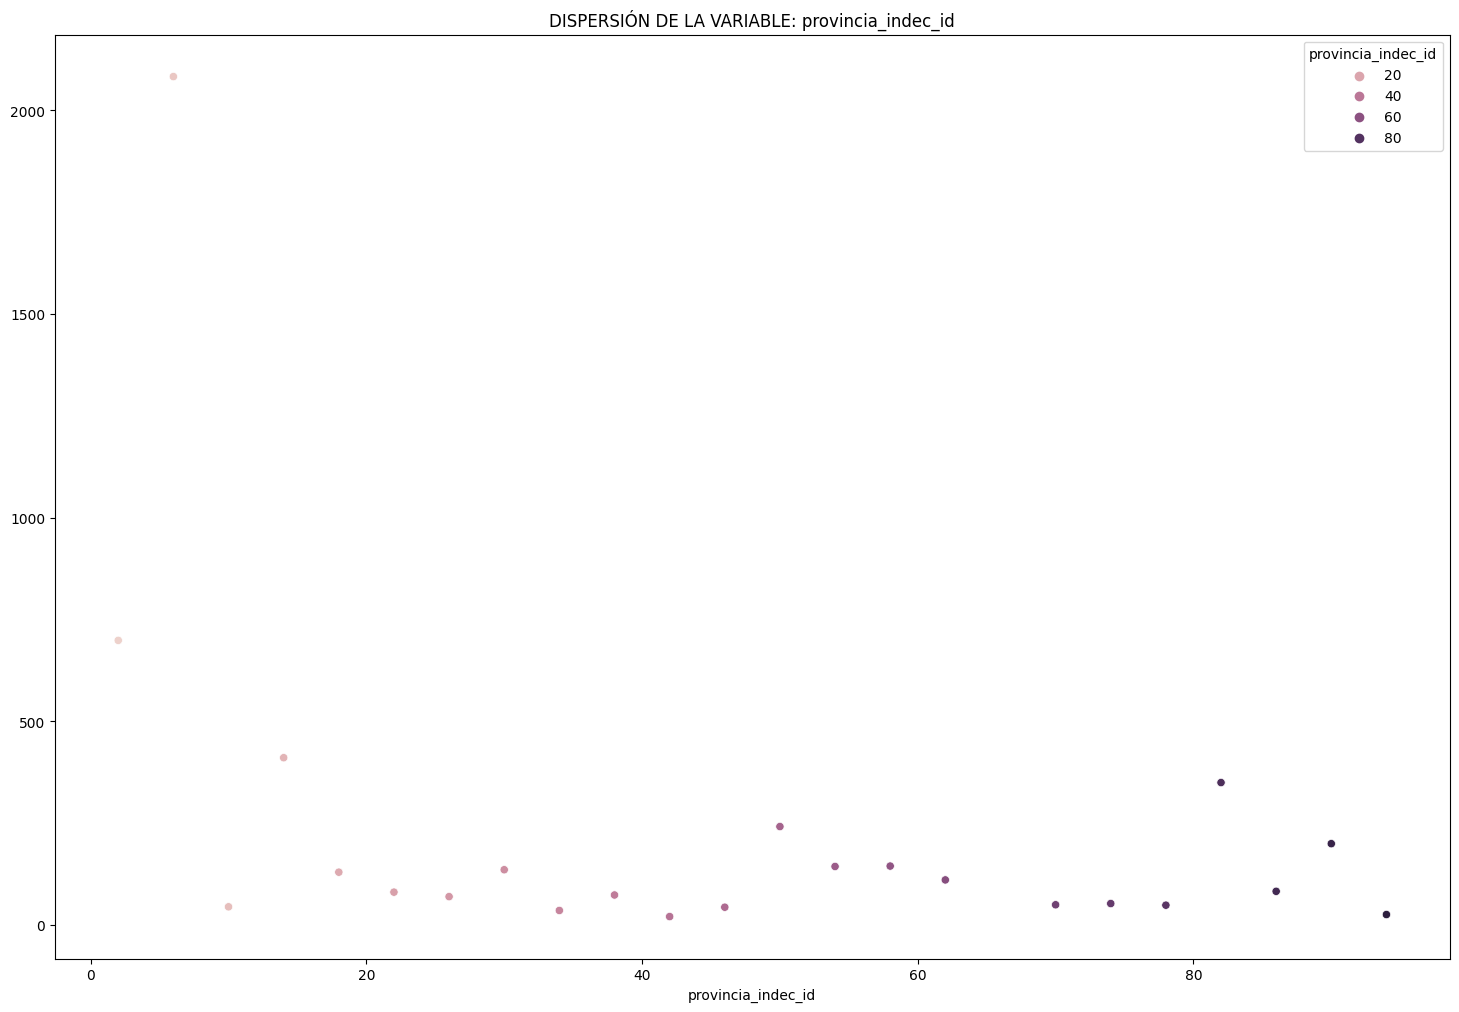

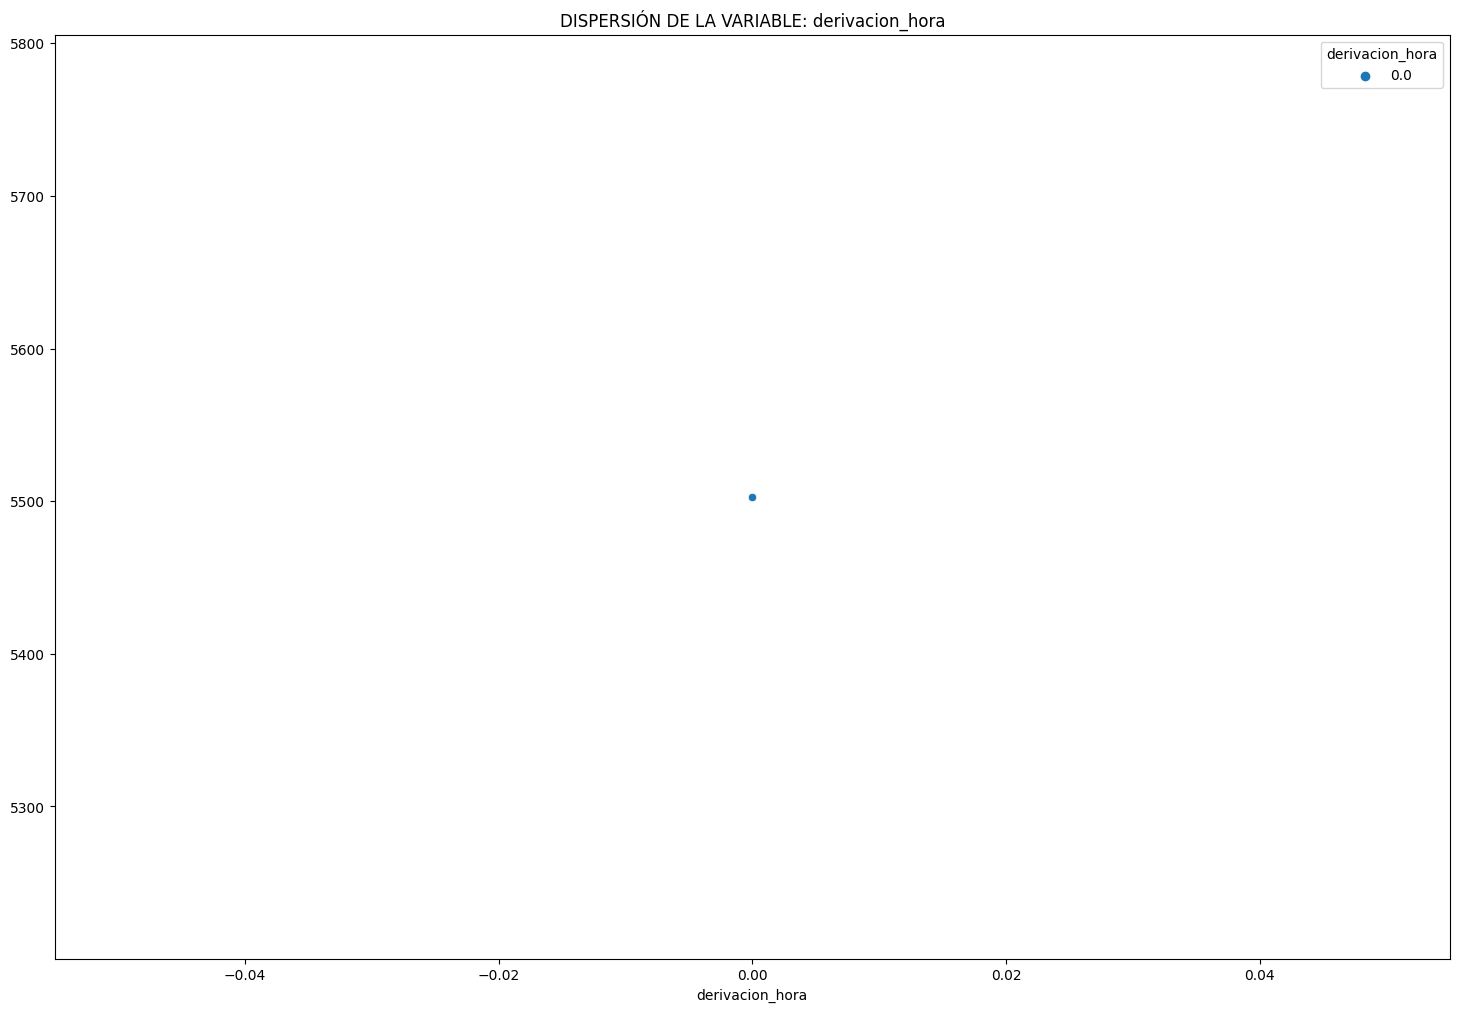

In [23]:
# Itero a través de las columnas del DataFrame
for column in df_denuncias.columns:
    try:
        # Obtengo la frecuencia de valores en la columna
        serie = df_denuncias[column].value_counts()
        
        # Configuro el tamaño de la figura
        plt.figure(figsize=(18, 12))
        
        # Verifico si la columna está en la lista de columnas para gráficos de torta
        if column not in columnas_g_torta:
            # Si no está en la lista, creo un gráfico de dispersión
            sns.scatterplot(x=serie.index, y=serie.values, hue=serie.index)
            plt.title(f'DISPERSIÓN DE LA VARIABLE: {column}')
        else:
            # Si está en la lista, creo un gráfico de torta para las 3 categorías más comunes
            top_columnas = serie.nlargest(3)
            plt.pie(top_columnas, labels=top_columnas.index)
            plt.title(f'TOP 3: {column}')
    except:
        pass

# Este código crea visualizaciones para cada columna del DataFrame 'df_denuncias',
# utilizando gráficos de dispersión para variables numéricas y gráficos de torta para variables categóricas.


#### 2.3.0.0 - CORRELACION

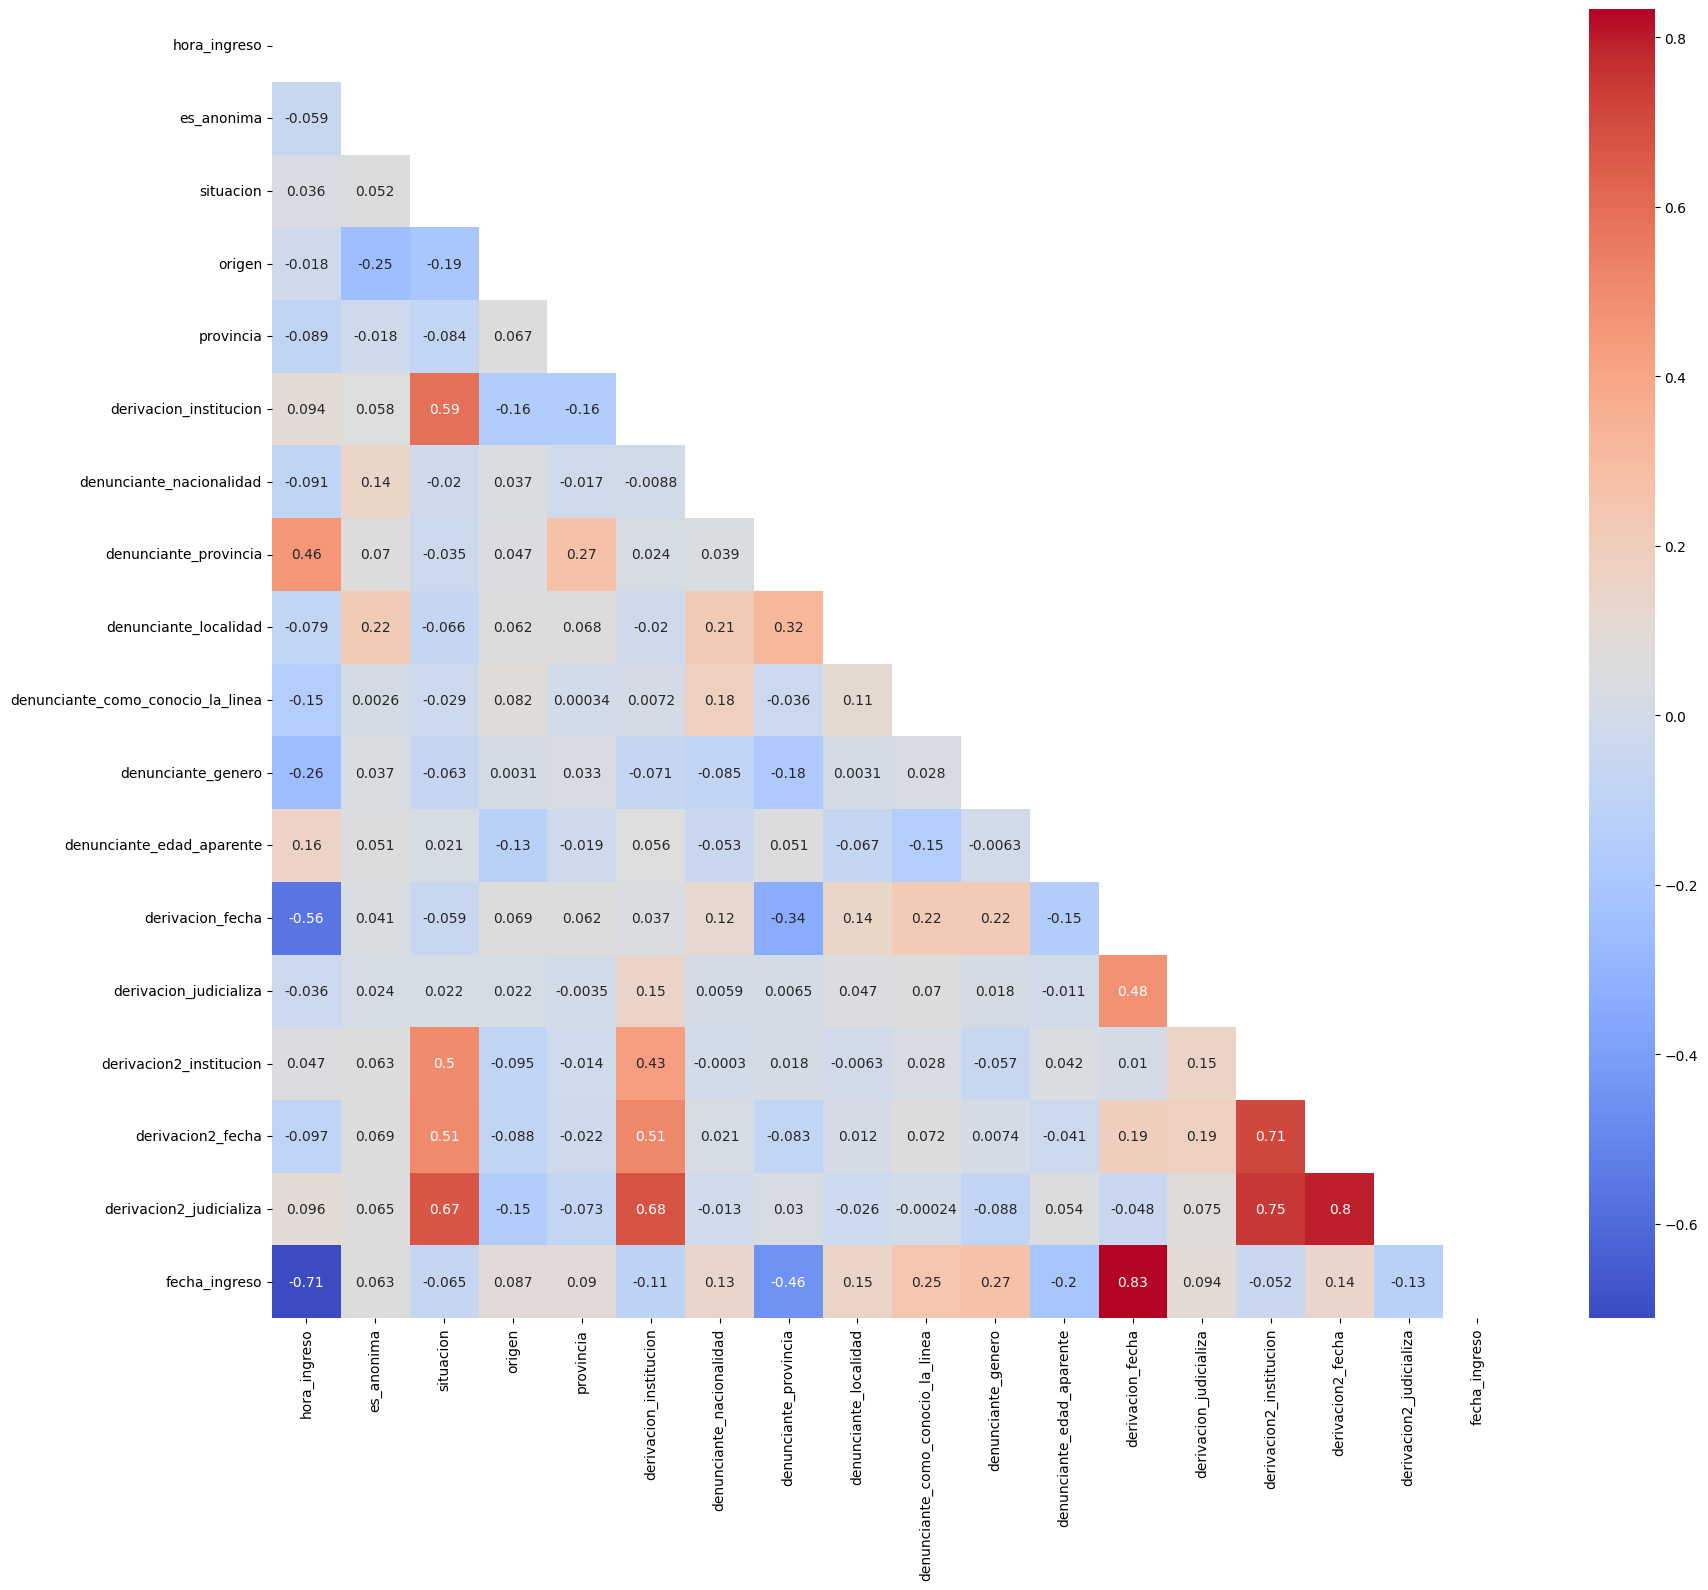

In [24]:
# Calculo la matriz de correlación de las características escaladas
matriz_correlacion = df_denuncias_escalados.corr()

# Creo una máscara triangular superior para ocultar la mitad de la matriz (simétrica)
mascara_espejo = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Configuro el tamaño de la figura
plt.figure(figsize=(20, 17))

# Creo el mapa de calor utilizando seaborn
sns.heatmap(matriz_correlacion, mask=mascara_espejo, annot=True, cmap='coolwarm')

# Muestro el mapa de calor
plt.show()

# Este código genera un mapa de calor que muestra las correlaciones entre las características escaladas.
# Las celdas del mapa de calor muestran la fuerza y la dirección de la correlación entre pares de características.


### 2.4.0 - ALMACENAMIENTO CSV

In [25]:
# Guardar el DataFrame 'df_denuncias_codificados' en un archivo CSV
df_denuncias_codificados.to_csv('../datos/csv procesados/denuncias_codificados.csv', index=False)

# Guardar el DataFrame 'df_denuncias_escalados' en un archivo CSV
df_denuncias_escalados.to_csv('../datos/csv procesados/denuncias_escalados.csv', index=False)

# Guardar el DataFrame original 'df_denuncias' en un archivo CSV
df_denuncias.to_csv('../datos/csv procesados/denuncias.csv', index=False)

# 2.O - CSV ORIENTACIONES


### 2.1 - IMPORTACION DE CSV

In [26]:
# Defino la ruta del archivo CSV que contiene los datos de orientaciones
path_orientaciones = ('../datos/csv procesados/limpios_orientaciones.csv')

# Utilizo Pandas para cargar los datos del archivo CSV en un DataFrame
df_orientaciones = pd.read_csv(path_orientaciones)

# Ahora tienes los datos de las orientaciones cargados en 'df_orientaciones' para su posterior análisis.
# Asegúrate de que la ruta del archivo CSV sea la correcta y de que los datos estén formateados adecuadamente.


In [27]:
# Seleccionar aleatoriamente 3 filas del DataFrame 'df_orientaciones' y fijar la semilla para reproducibilidad
df_orientaciones.sample(3, random_state=4)

# Esta línea de código muestra una muestra aleatoria de 3 filas de tu DataFrame 'df_orientaciones'
# utilizando un valor de semilla (random_state) de 4 para garantizar que la selección sea reproducible.


,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,consultante_nacionalidad,consultante_provincia,consultante_localidad,consultante_como_conocio_la_linea,consultante_genero,consultante_edad_aparente
3080,2022-01-30,19:38,2594759425,Urgencia,Ciudadano,Sí,Covid,Covid,Ciudad Autónoma de Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,NaN,Buenos Aires,NaN,NaN,Mujer,50.0
2539,2021-11-16,NaN,3545657515,Urgencia,Ciudadano,No,Salud,Salud mental,NaN,NaN,PNR - Línea 145,Línea 145,NaN,NaN,NaN,NaN,Mujer,0.0
4073,2022-11-02,15:05,505456525,Urgencia,Ciudadano,Sí,Violencia de género,Psicológica,Jujuy,Ciudad Perico,PNR - Línea 145,Línea 145,NaN,Jujuy,NaN,NaN,Mujer,50.0


### 2.2 - COLUMNAS

#### 2.2.1 - TIPOS DE DATOS

In [28]:
# Convierto la columna 'fecha_ingreso' a objetos de fecha (Date)
df_orientaciones['fecha_ingreso'] = pd.to_datetime(df_orientaciones['fecha_ingreso'], errors='coerce').dt.date

# Define una función para convertir una columna de fechas a Argentina/Buenos_Aires
def convert_to_argentina_timezone(date_str):
    argentina_timezone = pytz.timezone('America/Argentina/Buenos_Aires')
    return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S').tz_localize(argentina_timezone)

# Aplica la función 'convert_to_argentina_timezone' a la columna 'fecha_ingreso'
df_orientaciones['fecha_ingreso'] = df_orientaciones['fecha_ingreso'].apply(convert_to_argentina_timezone)

# Con este código, has realizado una serie de operaciones en la columna 'fecha_ingreso',
# incluyendo la conversión a objetos de fecha y la asignación de la zona horaria de Argentina/Buenos_Aires.


In [29]:
# Convierte la columna 'hora_ingreso' en un nuevo DataFrame 'df_orientaciones'
# en una columna que contiene solo las horas.
df_orientaciones['hora_ingreso'] = pd.to_datetime(df_orientaciones['hora_ingreso']).dt.hour

# Después de ejecutar esta línea de código, la columna 'hora_ingreso' contendrá solo las horas,
# y podrás utilizar esta información para análisis específicos basados en la hora de las orientaciones.


/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_73552/944613674.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orientaciones['hora_ingreso'] = pd.to_datetime(df_orientaciones['hora_ingreso']).dt.hour


In [30]:
# Selecciona las columnas de tipo 'datetime64[ns]' en el DataFrame 'df_orientaciones'
columnas_fechas = df_orientaciones.select_dtypes(include=['datetime64[ns, America/Argentina/Buenos_Aires]']).columns

# Llena los valores faltantes en estas columnas con 'pd.NaT' y crea un nuevo DataFrame
df_orientaciones[columnas_fechas] = df_orientaciones[columnas_fechas].fillna(pd.NaT)

# Después de ejecutar esta línea de código, los valores faltantes en las columnas de fecha y hora
# se llenarán con 'pd.NaT' en el DataFrame 'df_orientaciones'.


#### 2.2.2 - VALORES

In [31]:
# Sin simbolos extranios a remplazar o extraer

In [32]:
# Verifica la cantidad de valores nulos en cada columna del DataFrame 'df_orientaciones'
nulos_por_columna = df_orientaciones.isnull().sum()

# 'nulos_por_columna' ahora contiene la cantidad de valores nulos en cada columna.
# Esto puede ser útil para evaluar la integridad de los datos y decidir si es necesario
# realizar imputaciones o manipulaciones adicionales en función de la cantidad de valores nulos.


In [106]:
# Filtro para identificar géneros que deben ser mapeados a np.nan
filtro_nan = df_orientaciones['consultante_genero'].isin(['No sabe / no contesta', 'No binario', 'Ninguna de las anteriores'])
df_orientaciones.loc[filtro_nan, 'consultante_genero'] = np.nan

# Filtro para identificar géneros que deben ser mapeados a 'transgenero'
filtro_transgenero = df_orientaciones['consultante_genero'].isin(['Transgénero', 'Transexual', 'Mujer trans - travesti', 'Varón trans'])
df_orientaciones.loc[filtro_transgenero, 'consultante_genero'] = 'transgenero'

# Mapeo de 'Varón cis' a 'varon'
df_orientaciones.loc[df_orientaciones['consultante_genero'] == 'Varón cis', 'consultante_genero'] = 'varon'

# Mapeo de 'Mujer cis' a 'mujer'
df_orientaciones.loc[df_orientaciones['consultante_genero'] == 'Mujer cis', 'consultante_genero'] = 'mujer'

In [107]:
df_orientaciones['es_anonima'] = df_orientaciones['es_anonima'].replace('Sí', 'Si')

##### 2.2.2.0 - IMPUTACION GENERAL

In [33]:
# Realizo interpolaciones y lleno valores faltantes en el DataFrame 'df_orientaciones'

# Calculo la moda de la columna 'situacion' en el DataFrame 'df_orientaciones'
moda_situacion = df_orientaciones['situacion'].mode()[0]

# Lleno los valores faltantes en el DataFrame 'df_denuncias' con valores específicos
df_denuncias.fillna(value={
    'situacion': moda_situacion,
    'consultante_localidad': df_orientaciones.provincia.bfill(),
    'consultante_localidad': df_orientaciones.localidad.bfill(),
    'localidad': df_orientaciones['via_ingreso'].bfill(),
    'consultante_nacionalidad': 'atencion',
    'consultante_provincia': 'atencion',
    'consultante_localidad': 'atencion',
    'consultante_tipo': 'atencion',
    'consultante_como_conocio_la_linea': 'atencion',
    'consultante_genero': 'atencion',
    'consultante_edad_aparente': 'atencion'
}, inplace=True)

# En este bloque de código, he realizado interpolaciones y llenado de valores faltantes
# en el DataFrame 'df_denuncias' utilizando valores específicos y la moda de 'situacion'
# del DataFrame 'df_orientaciones'.


In [34]:
# Defino el orden deseado de las columnas en una lista
column_order = [
    'fecha_ingreso', 'hora_ingreso', 'nro_registro_interno',
    'situacion', 'origen', 'provincia', 'localidad', 'tema', 'subtema', 'es_anonima',
    'via_ingreso', 'consultante_nacionalidad', 'consultante_provincia', 'consultante_localidad',
    'consultante_como_conocio_la_linea', 'consultante_genero', 'consultante_edad_aparente'
]

# Reordeno las columnas del DataFrame 'df_orientaciones' según el orden deseado
df_orientaciones = df_orientaciones[column_order]

# En este bloque de código, he definido el orden deseado de las columnas en la lista 'column_order' y luego
# reordené las columnas del DataFrame 'df_orientaciones' según ese orden.


##### 2.2.2.1 - IMPUTACION AVANZADA

In [35]:
# Realizo interpolación lineal en la columna 'hora_ingreso' del DataFrame 'df_orientaciones'

# Utilizo el método 'interpolate' para llenar los valores faltantes en la columna 'hora_ingreso'
# del DataFrame 'df_orientaciones' utilizando interpolación lineal.
df_orientaciones['hora_ingreso'].interpolate(method='linear', inplace=True)
df_orientaciones['fecha_ingreso'].interpolate(method='linear', inplace=True)

# En este bloque de código, he utilizado el método 'interpolate' con el método 'linear' para llenar
# los valores faltantes en la columna 'hora_ingreso' del DataFrame 'df_orientaciones' mediante interpolación lineal.
# El argumento 'inplace=True' indica que los cambios se aplicarán directamente en el DataFrame original.


#### 2.2.3 - CODIFICACION

##### 2.2.3.0 - CATEGORICOS NOMINALES

In [36]:
# Selecciono las columnas de tipo 'category' y 'object' en el DataFrame 'df_orientaciones'

# Utilizo el método 'select_dtypes' para seleccionar las columnas de tipo 'category' y 'object'
# en el DataFrame 'df_orientaciones'.
columnas_categoricas = df_orientaciones.select_dtypes(include=['category', 'object', 'datetime64[ns, America/Argentina/Buenos_Aires]']).copy()

# Obtengo los nombres de las columnas categoricas seleccionadas
columnas_categoricas_nombres = columnas_categoricas.columns

# En este bloque de código, he seleccionado las columnas cuyos tipos son 'category' y 'object'
# en el DataFrame 'df_orientaciones' y he almacenado los nombres de esas columnas en la lista 'columnas_categoricas_nombres'.


In [37]:
# Codifico columnas categóricas nominales en el DataFrame 'df_orientaciones'

# Creo una copia del DataFrame 'df_orientaciones' para mantener los datos originales intactos.
df_orientaciones_codificados = df_orientaciones.copy()

# Itero a través de las columnas categóricas nominales y aplico la codificación utilizando LabelEncoder
for column in columnas_categoricas_nombres:
    encoder = LabelEncoder()
    df_orientaciones_codificados[column] = encoder.fit_transform(df_orientaciones_codificados[column].astype(str))

# En este bloque de código, he creado una copia del DataFrame 'df_orientaciones' llamada 'df_orientaciones_codificados'
# y luego he codificado las columnas categóricas nominales en esta copia utilizando LabelEncoder.


##### 2.2.3.1 - CATEGORICOS ORDINALES

In [38]:
#Columnas categoricas ordinales
# No hay

#### 2.2.3.2 - REDUCCION DE DIMENCIONALIDAD

In [39]:
# Relleno los valores faltantes en el DataFrame original con la media de cada columna.
df_orientaciones_codificados.fillna(df_orientaciones_codificados.mean(), inplace=True)

# Creo una copia del DataFrame original para evitar modificarlo directamente.
X = df_orientaciones_codificados.drop(columns=['fecha_ingreso']).copy()
y = df_orientaciones_codificados['fecha_ingreso'].copy()

# Creo un selector de características utilizando f_regression como método.
selector = SelectPercentile(score_func=f_regression, percentile=60)

# Aplico la selección de características al conjunto de datos.
df_orientaciones_codificados_reducido = selector.fit_transform(X, y)

# Obtengo los nombres de las características seleccionadas.
columnas_seleccionadas = X.columns[selector.get_support()]

# Creo un nuevo DataFrame con las características seleccionadas y columnas nombradas.
df_orientaciones_codificados_reducido = pd.DataFrame(df_orientaciones_codificados_reducido, columns=columnas_seleccionadas)

# Restauro la columna 'fecha_ingreso' en el DataFrame reducido para mantener la variable objetivo.
df_orientaciones_codificados_reducido['fecha_ingreso'] = df_orientaciones_codificados['fecha_ingreso']

# Muestro una muestra aleatoria de 2 filas del DataFrame reducido para inspección.
df_orientaciones_codificados_reducido.sample(2, random_state=4)


,provincia,es_anonima,via_ingreso,consultante_nacionalidad,consultante_provincia,consultante_localidad,consultante_como_conocio_la_linea,consultante_genero,consultante_edad_aparente,fecha_ingreso
3080,4.0,2.0,11.0,15.0,0.0,216.0,38.0,2.0,50.0,710
2539,24.0,0.0,11.0,15.0,24.0,216.0,38.0,2.0,0.0,637


#### 2.2.4 - ESCALAMIENTO

In [40]:
# Realizo la escalación de características en el DataFrame 'df_orientaciones_codificados'

# Creo una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Aplico la escalación de características al DataFrame 'df_orientaciones_codificados' copiado.
df_orientaciones_escalados = scaler.fit_transform(df_orientaciones_codificados_reducido.copy())

# Creo un nuevo DataFrame 'df_orientaciones_escalados' con las características escaladas y mantengo las mismas columnas.
df_orientaciones_escalados = pd.DataFrame(df_orientaciones_escalados, columns=df_orientaciones_codificados_reducido.columns)

# En este bloque de código, he utilizado el escalador MinMaxScaler para escalar las características del DataFrame
# 'df_orientaciones_codificados'. Luego, he creado un nuevo DataFrame llamado 'df_orientaciones_escalados' con las
# características escaladas y manteniendo las mismas columnas que el DataFrame original.


#### 2.2.5 - PORCENTAJE DE VALORES

In [41]:
# Verifico si hay valores nulos en el DataFrame 'df_orientaciones_escalados'

# Utilizo el método 'isnull' para verificar la existencia de valores nulos en el DataFrame 'df_orientaciones_escalados'.
# Luego, utilizo 'sum' para calcular la suma de valores nulos por columna.
valores_nulos_por_columna = df_orientaciones_escalados.isnull().sum()

# Muestro la suma de valores nulos por columna en el DataFrame 'df_orientaciones_escalados'.
valores_nulos_por_columna


provincia                            0
es_anonima                           0
via_ingreso                          0
consultante_nacionalidad             0
consultante_provincia                0
consultante_localidad                0
consultante_como_conocio_la_linea    0
consultante_genero                   0
consultante_edad_aparente            0
fecha_ingreso                        0
dtype: int64

#### 2.2.6 - MEDIDAS DE TENDENCIA CENTRAL

In [42]:
# Genero estadísticas descriptivas para el DataFrame 'df_orientaciones'

# Utilizo el método 'describe' con el argumento 'include="all"' para obtener estadísticas descriptivas
# que incluyan todas las columnas del DataFrame 'df_orientaciones', incluidas las columnas categóricas.
estadisticas_descriptivas = df_orientaciones.describe(include='all')

# Muestro las estadísticas descriptivas para el DataFrame 'df_orientaciones'.
estadisticas_descriptivas


,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,provincia,localidad,tema,subtema,es_anonima,via_ingreso,consultante_nacionalidad,consultante_provincia,consultante_localidad,consultante_como_conocio_la_linea,consultante_genero,consultante_edad_aparente
count,5278,2358.000000,5.278000e+03,5268,5278,3350,3102,5273,5273,5278,4639,923,2198,683,829,4198,3972.000000
unique,NaN,NaN,NaN,2,230,25,540,41,745,3,29,15,24,222,44,12,NaN
top,NaN,NaN,NaN,Urgencia,Ciudadano,Buenos Aires,Buenos Aires,Trata,Salud mental,No,Línea 145,Argentina,Buenos Aires,Ciudad Autónoma de Buenos Aires,"No sabe, no recuerda",Mujer,NaN
freq,NaN,NaN,NaN,5225,4956,1177,779,2897,783,2849,4470,790,775,122,327,2109,NaN
mean,2021-10-27 09:06:45.153467136-03:00,13.461408,5.052416e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.099698
min,2020-01-01 00:00:00-03:00,0.000000,5.050505e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2020-12-11 00:00:00-03:00,10.000000,2.555659e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,2021-11-01 00:00:00-03:00,13.000000,5.505156e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
75%,2022-10-02 18:00:00-03:00,17.000000,7.555158e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000
max,2023-07-31 00:00:00-03:00,23.000000,9.494949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.000000


### 2.3.0 - RELACION ENTRE COLUMNAS

In [43]:
# Defino las columnas que se graficarán por separado debido a su tamaño en texto o cantidad de valores

# Creo una lista llamada 'columnas_g_torta' que contiene los nombres de las columnas que se graficarán
# por separado debido a su tamaño en texto o cantidad de valores.
columnas_g_torta = [
    'localidad',
    'consultante_como_conocio_la_linea',
    'consultante_localidad',
    'derivacion_institucion',
    'subtema',
    'origen',
    'fecha_ingreso'
]

# En este bloque de código, he definido una lista llamada 'columnas_g_torta' que contiene los nombres
# de las columnas que se graficarán por separado debido a consideraciones como su tamaño en texto o la
# cantidad de valores que contienen.


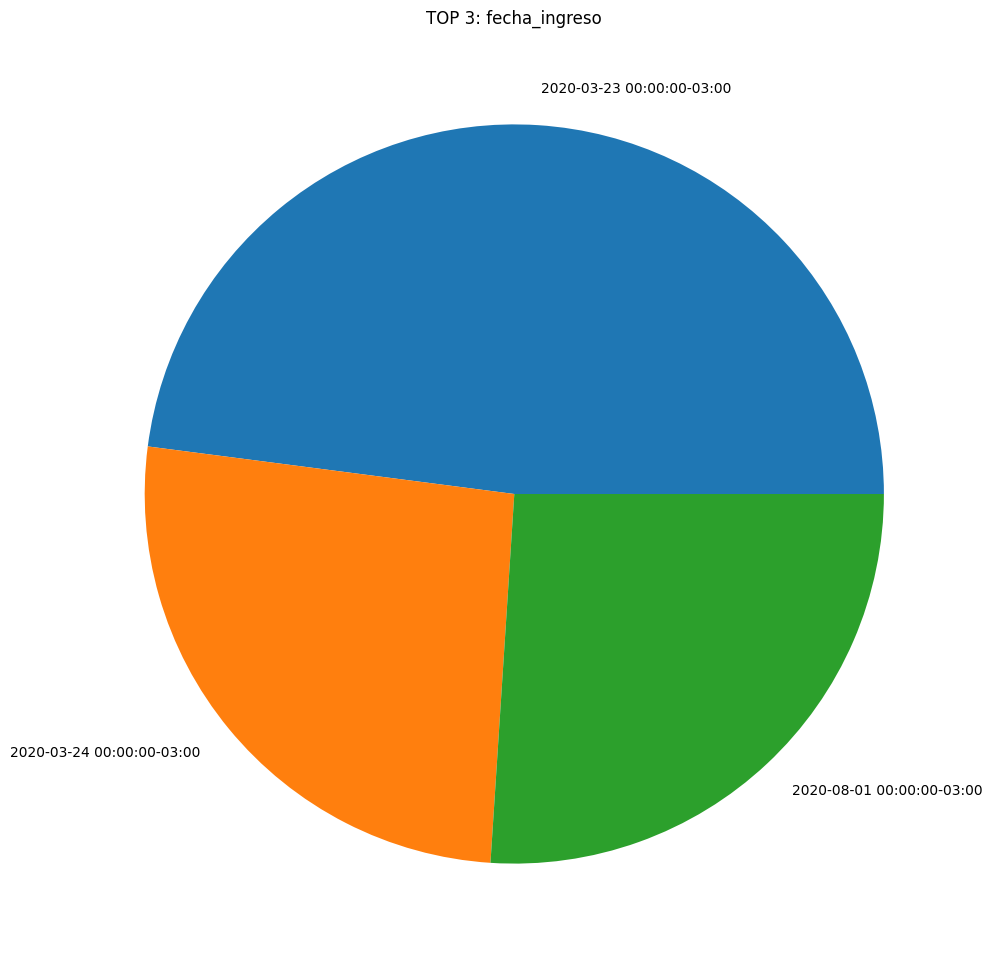

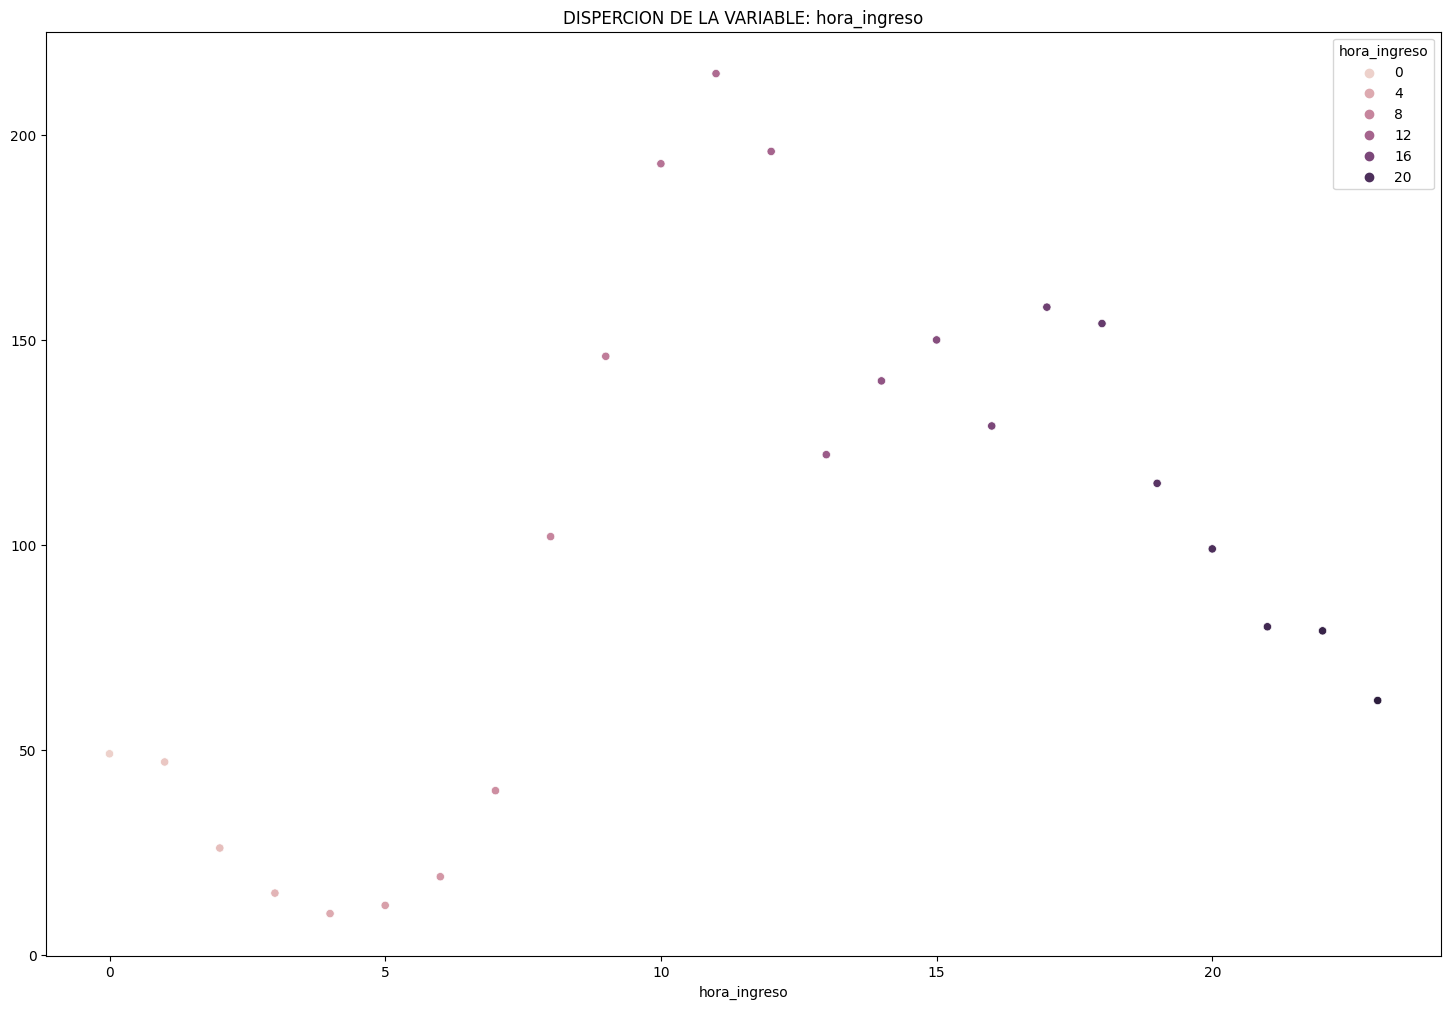

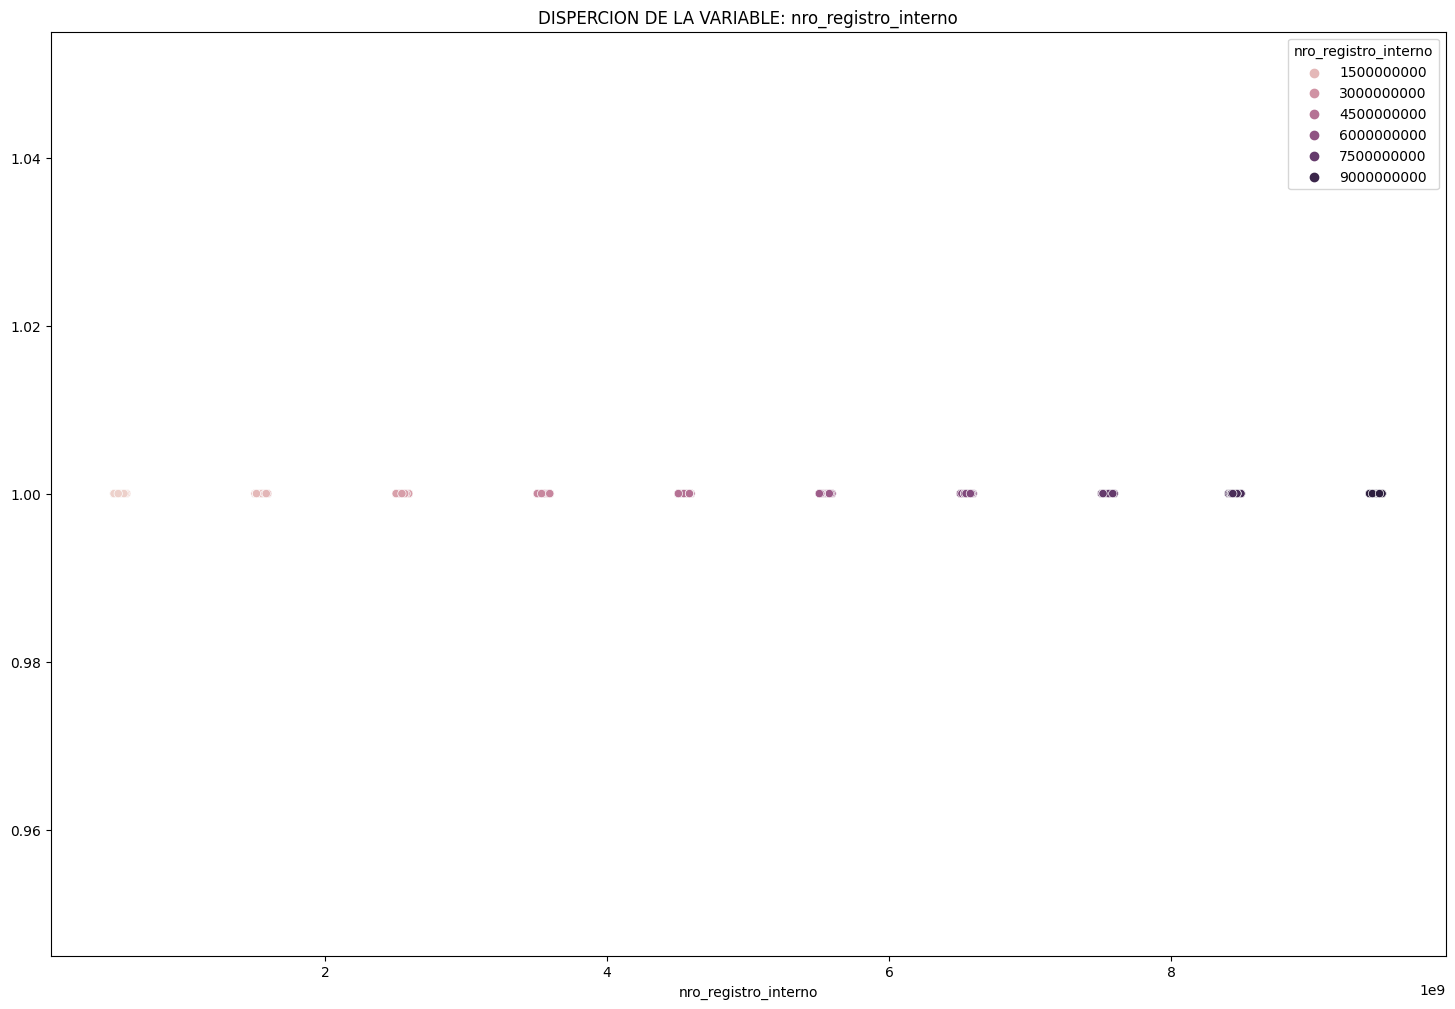

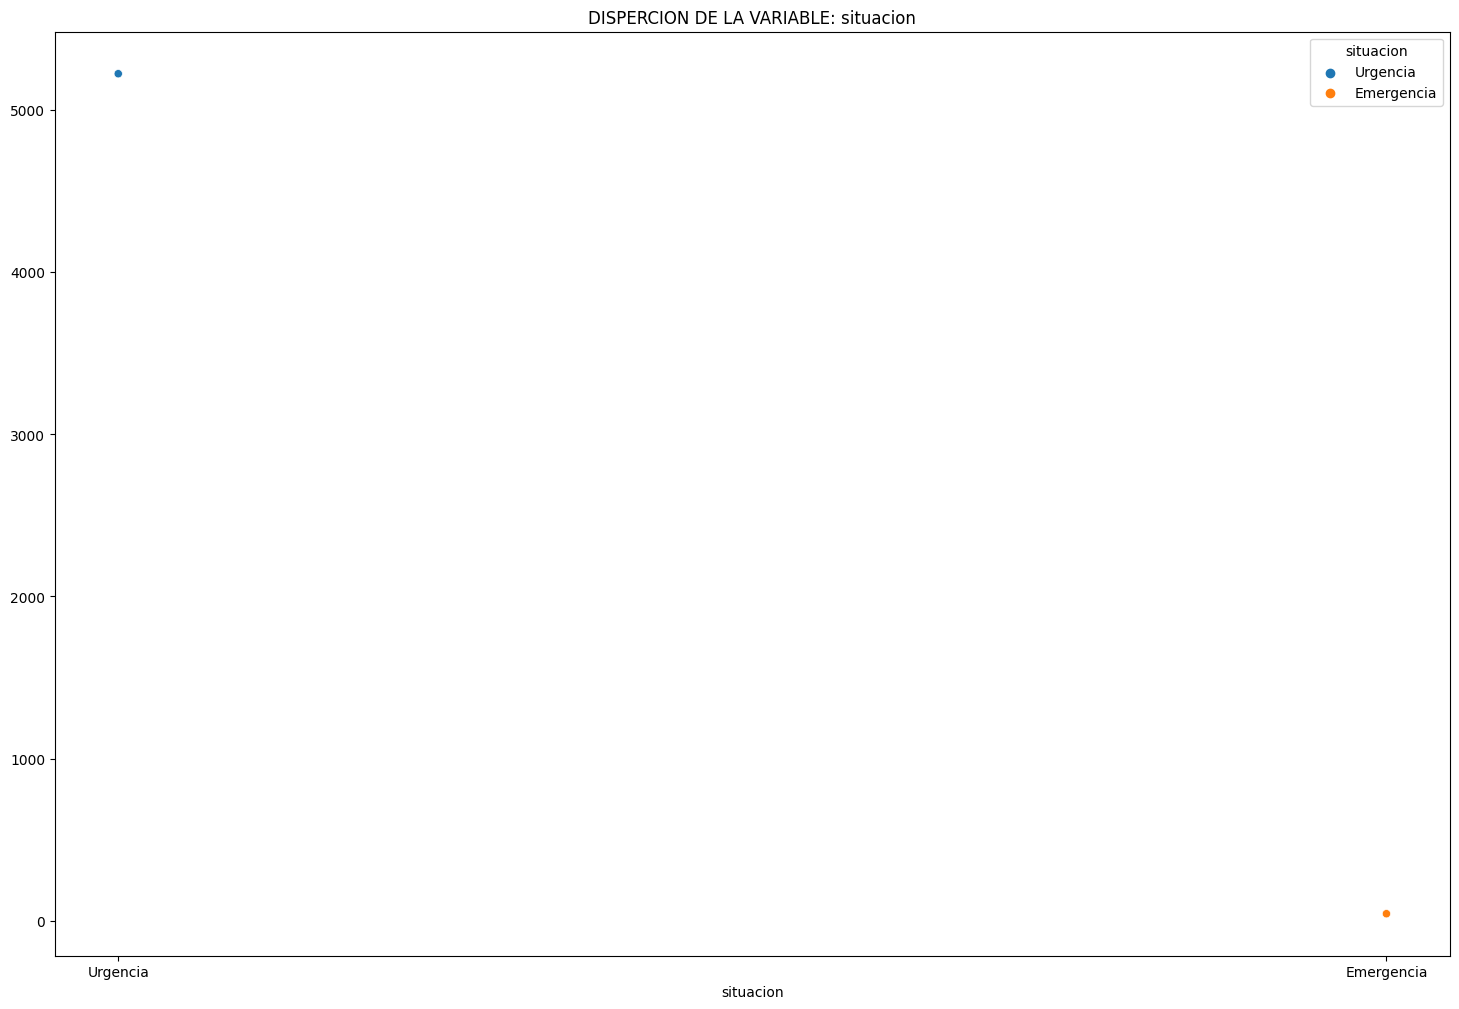

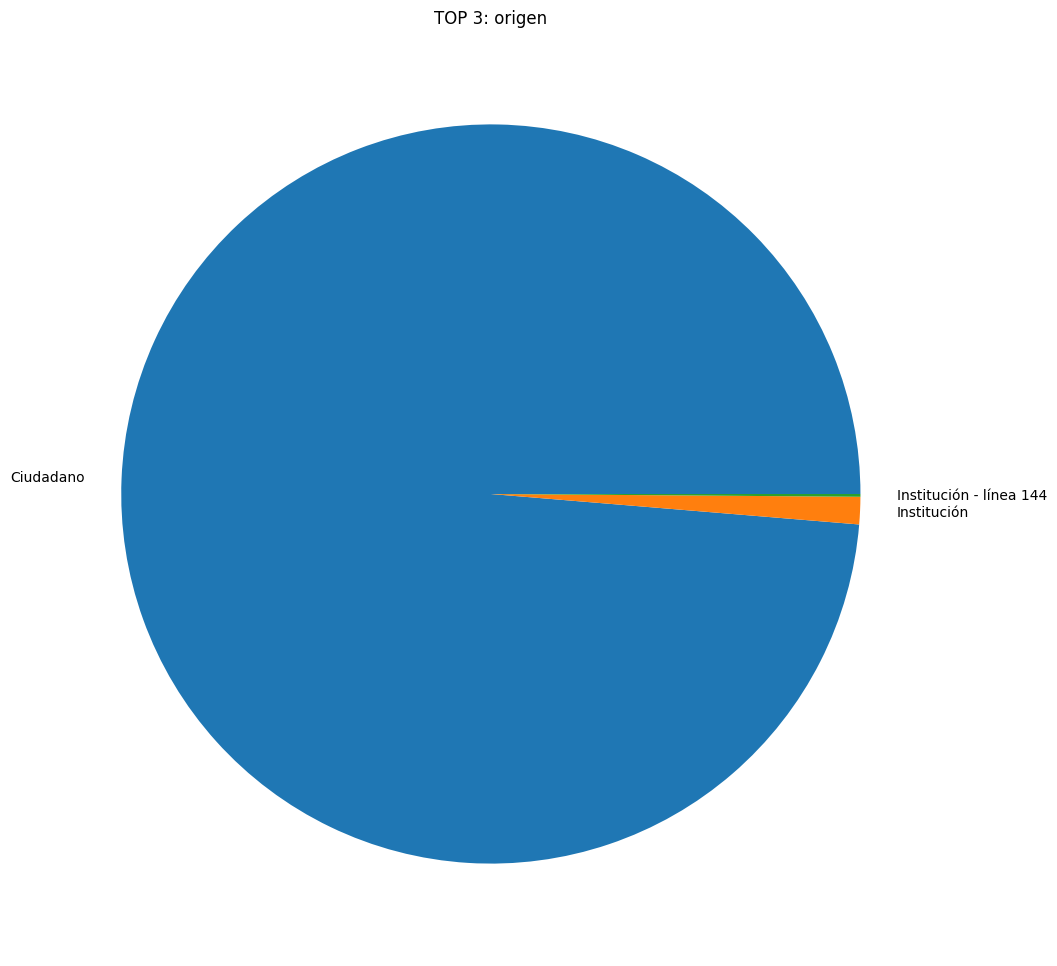

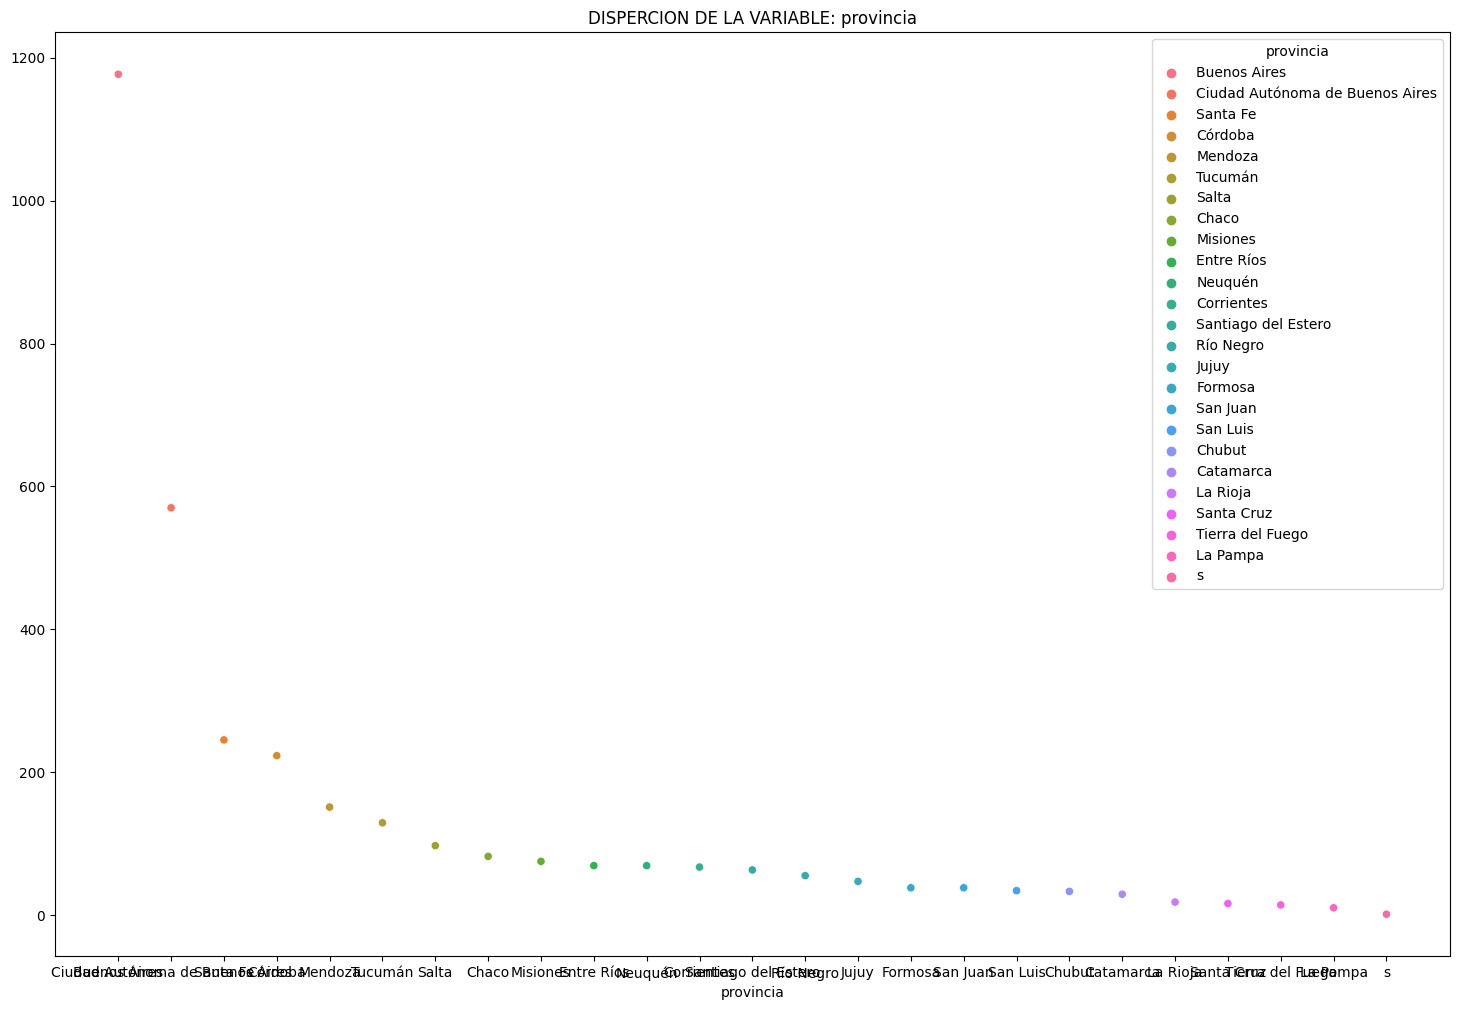

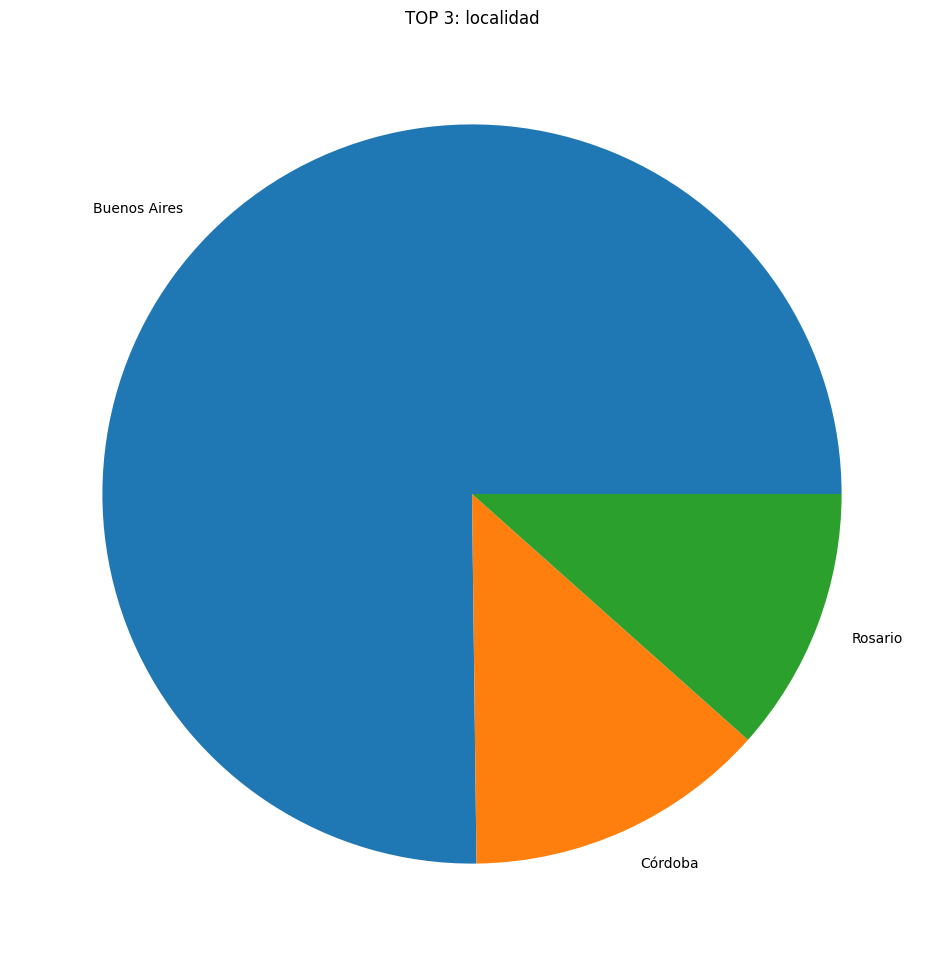

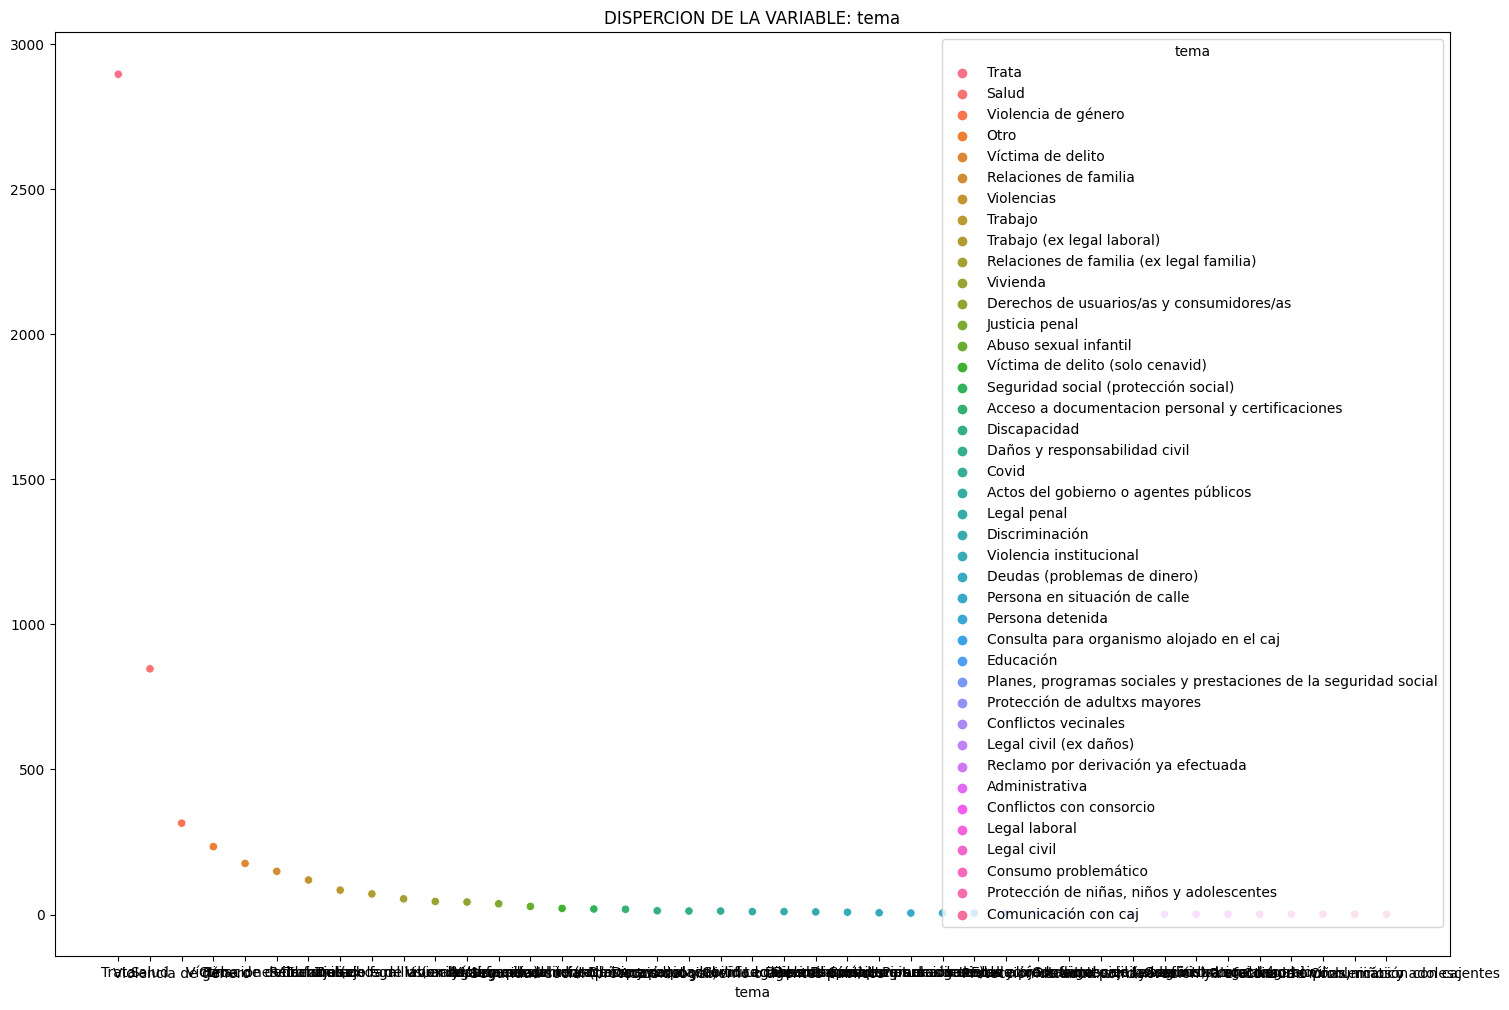

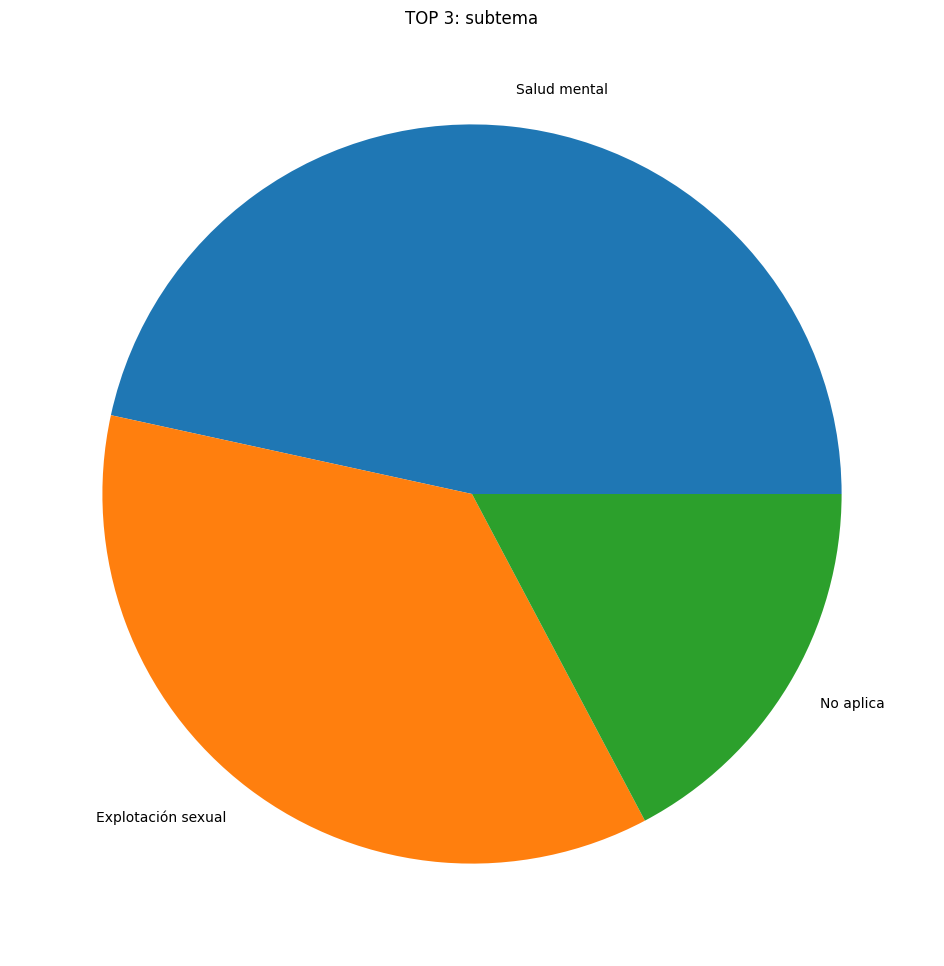

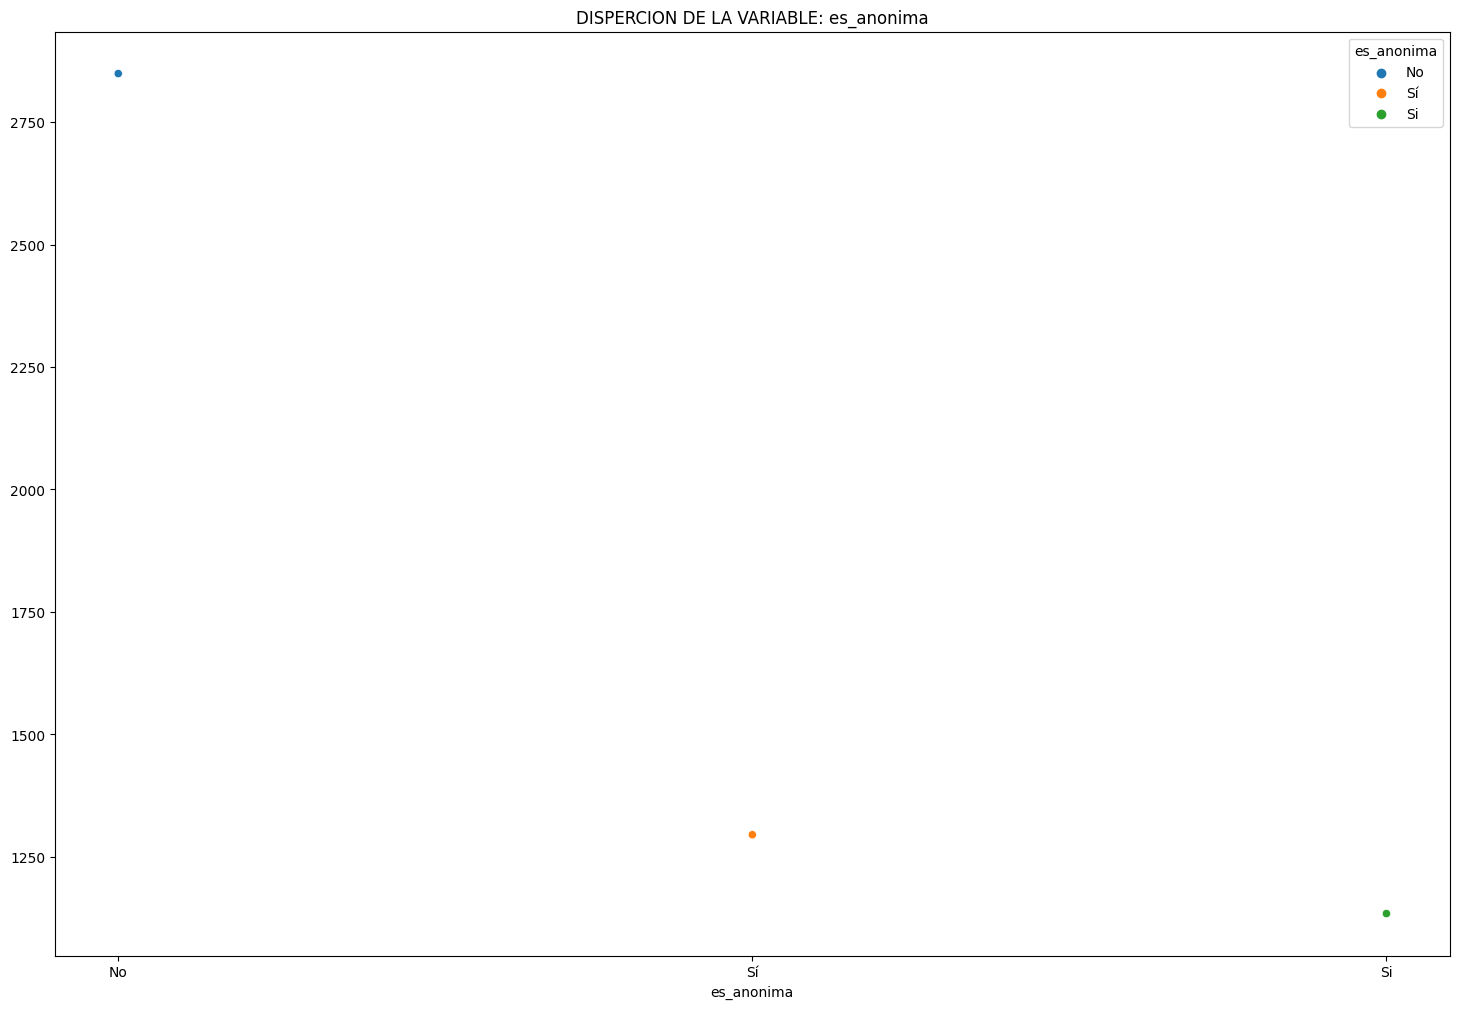

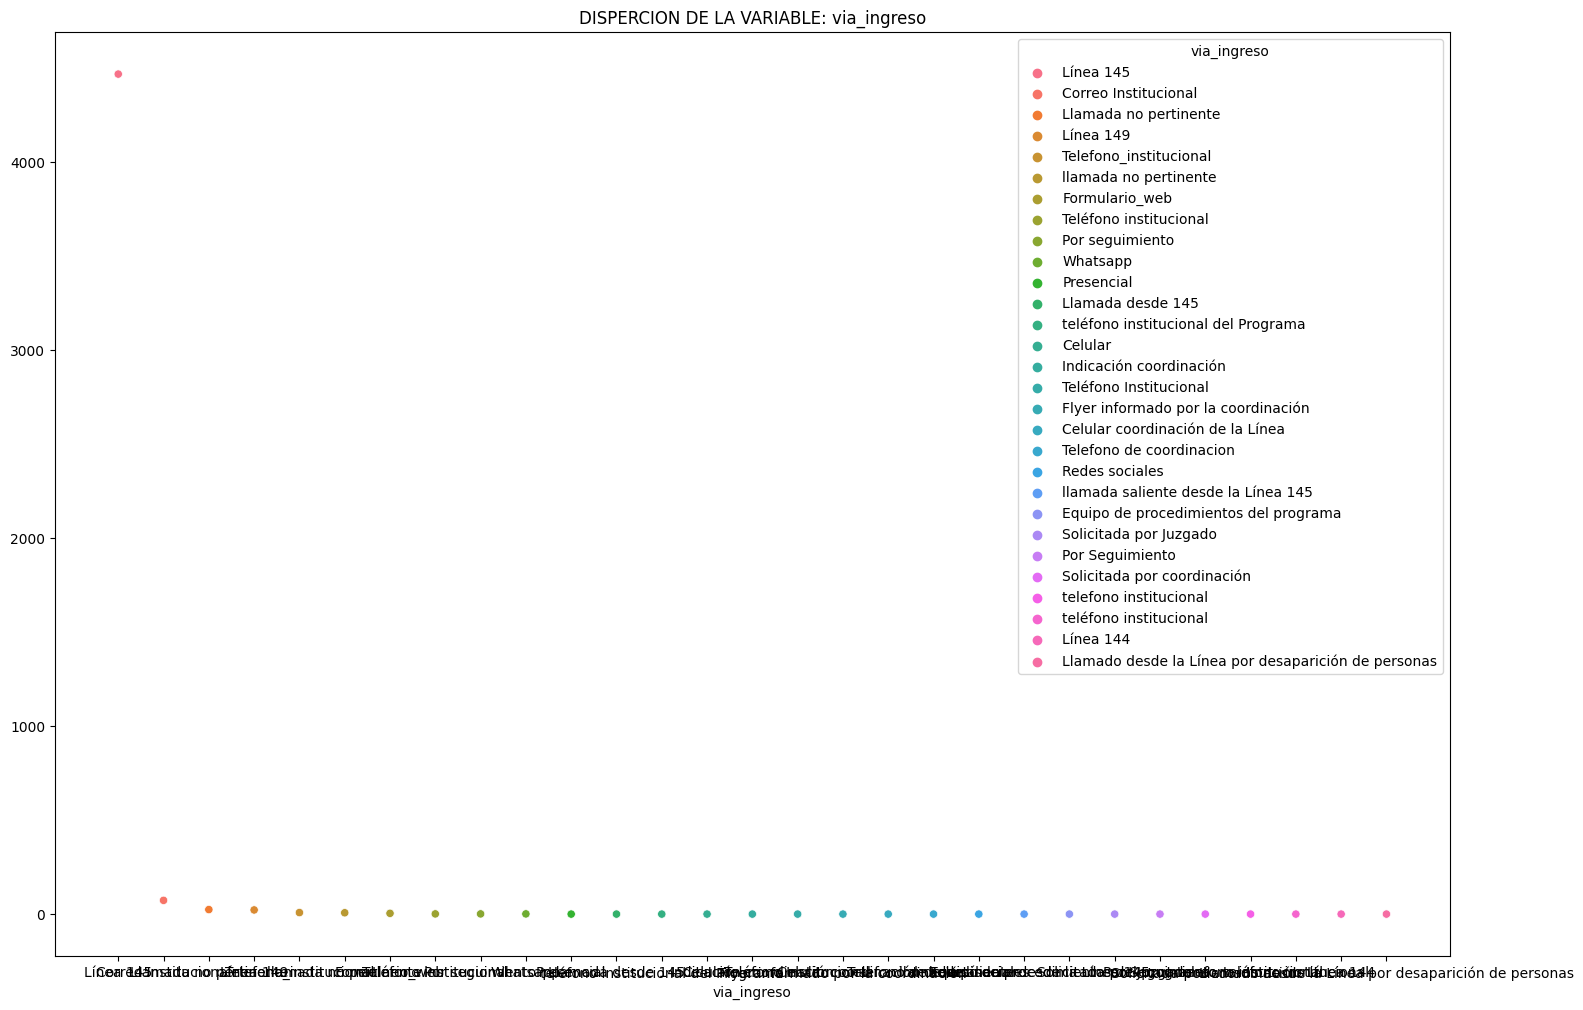

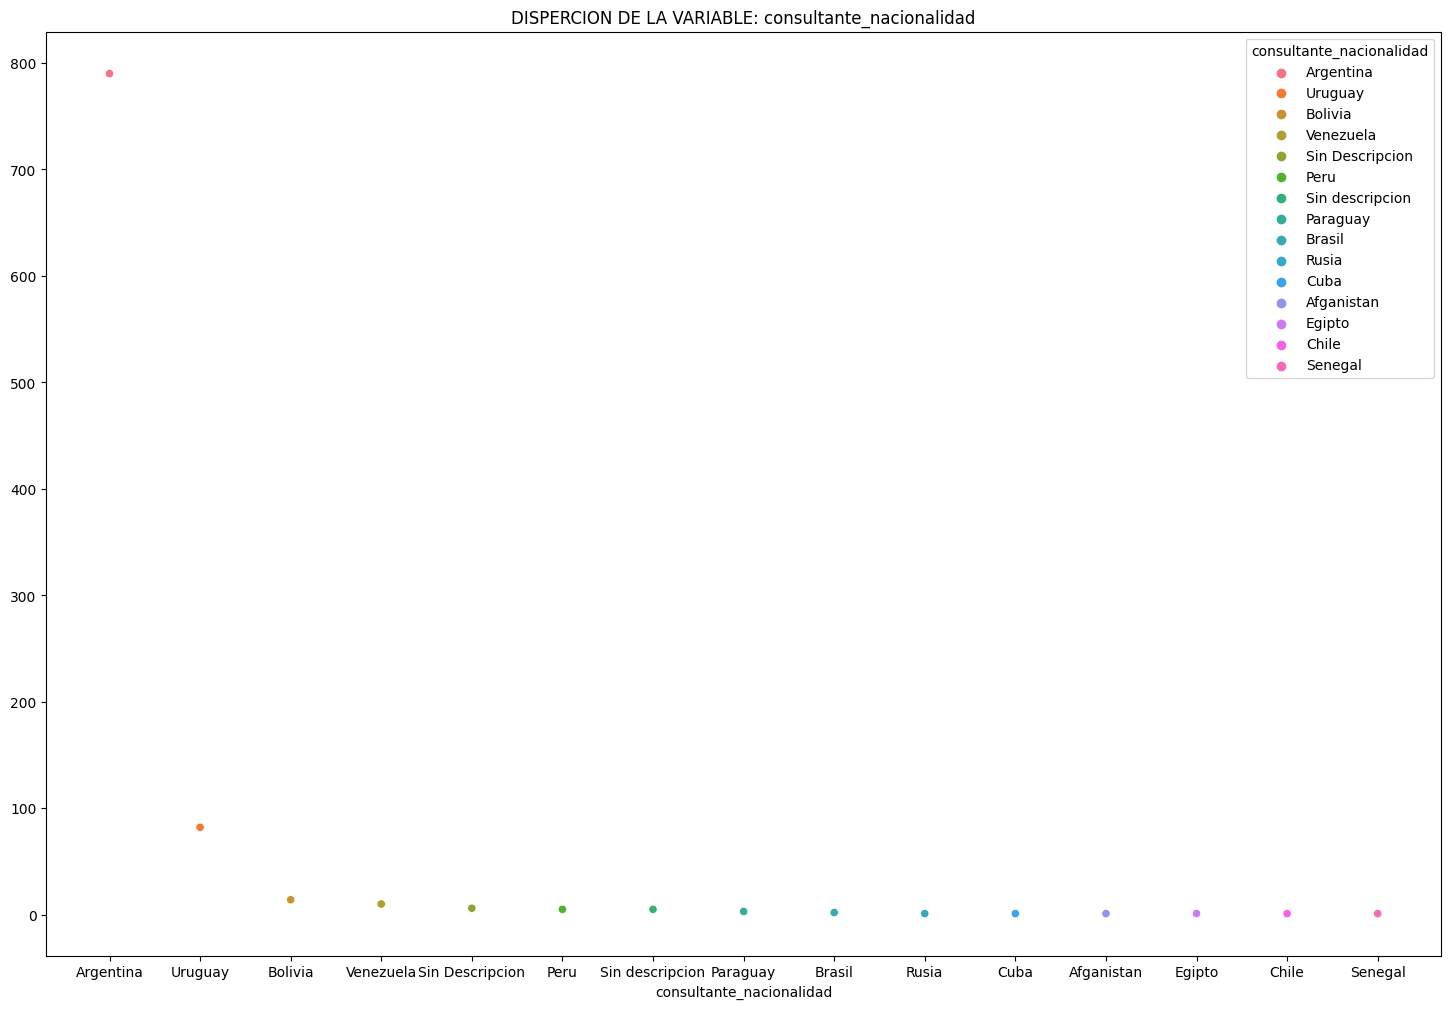

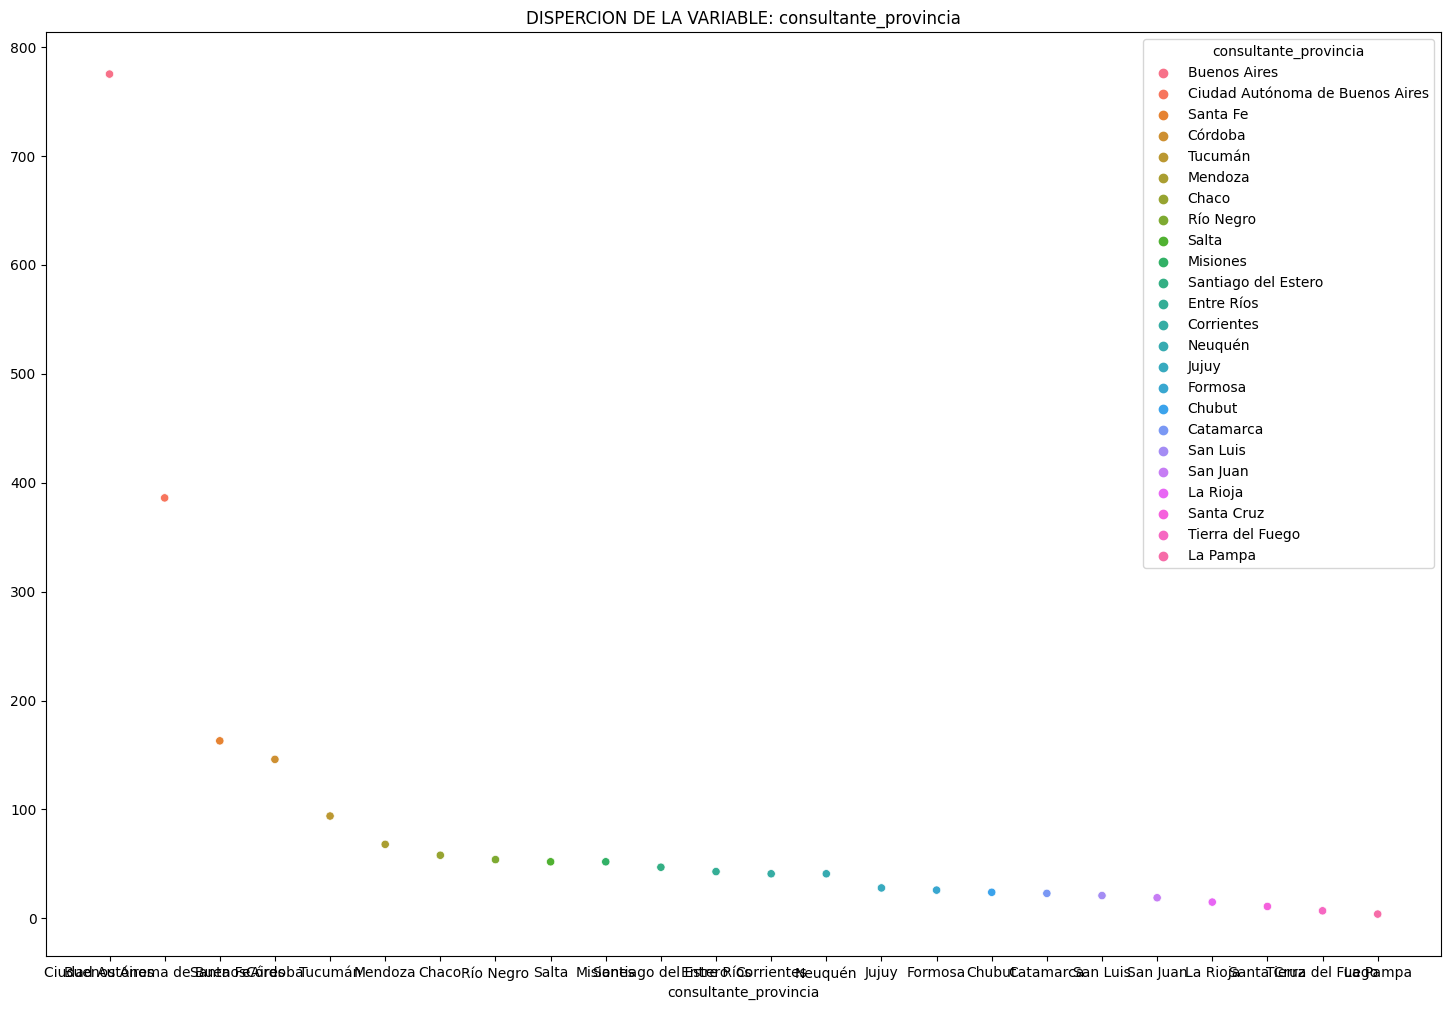

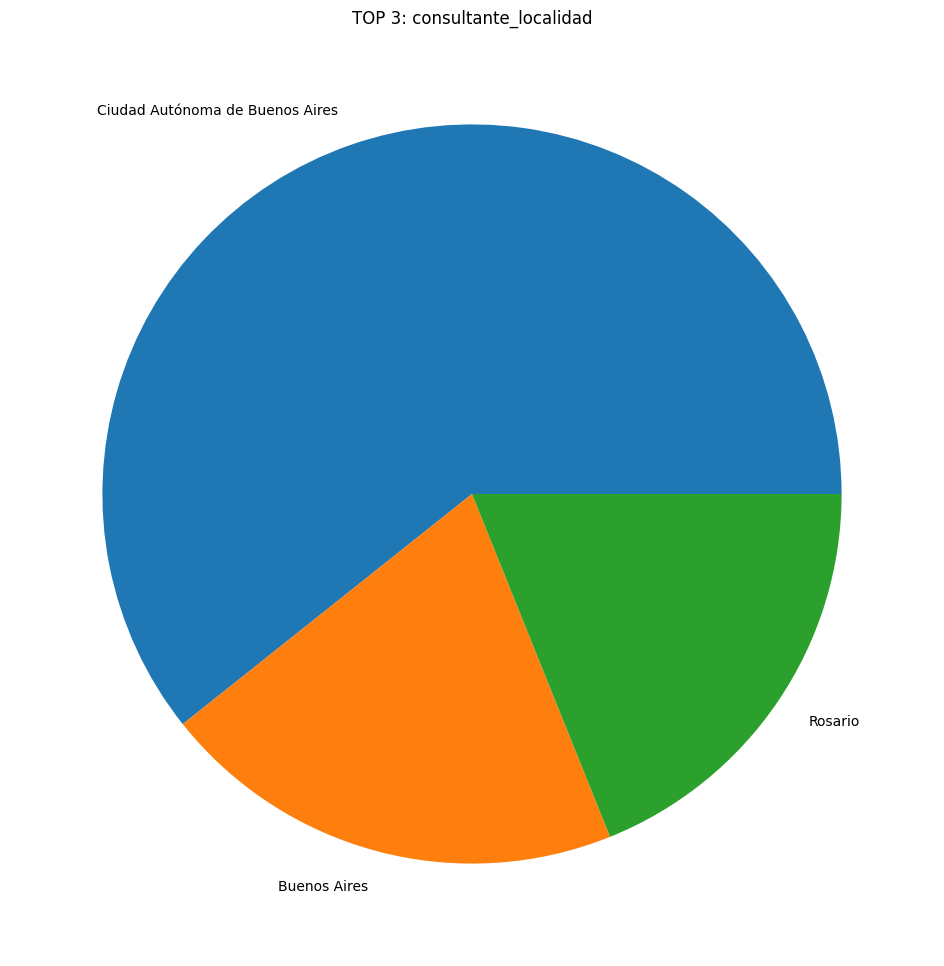

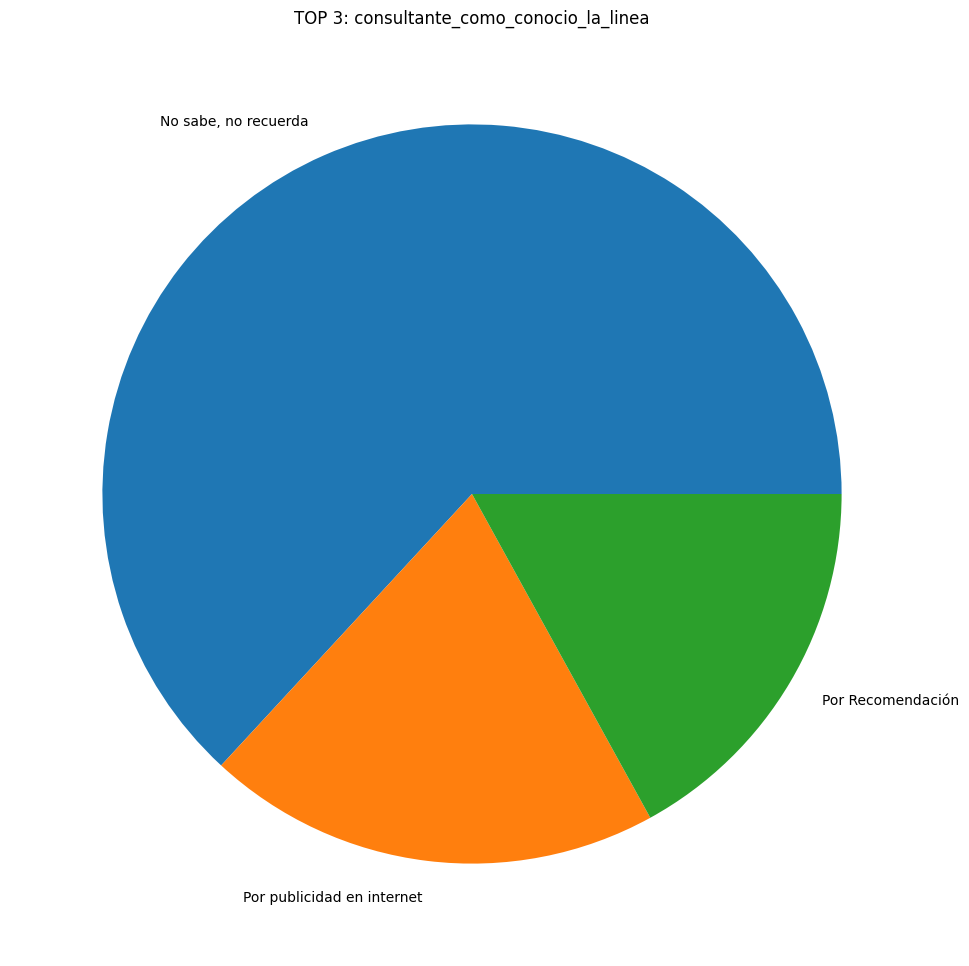

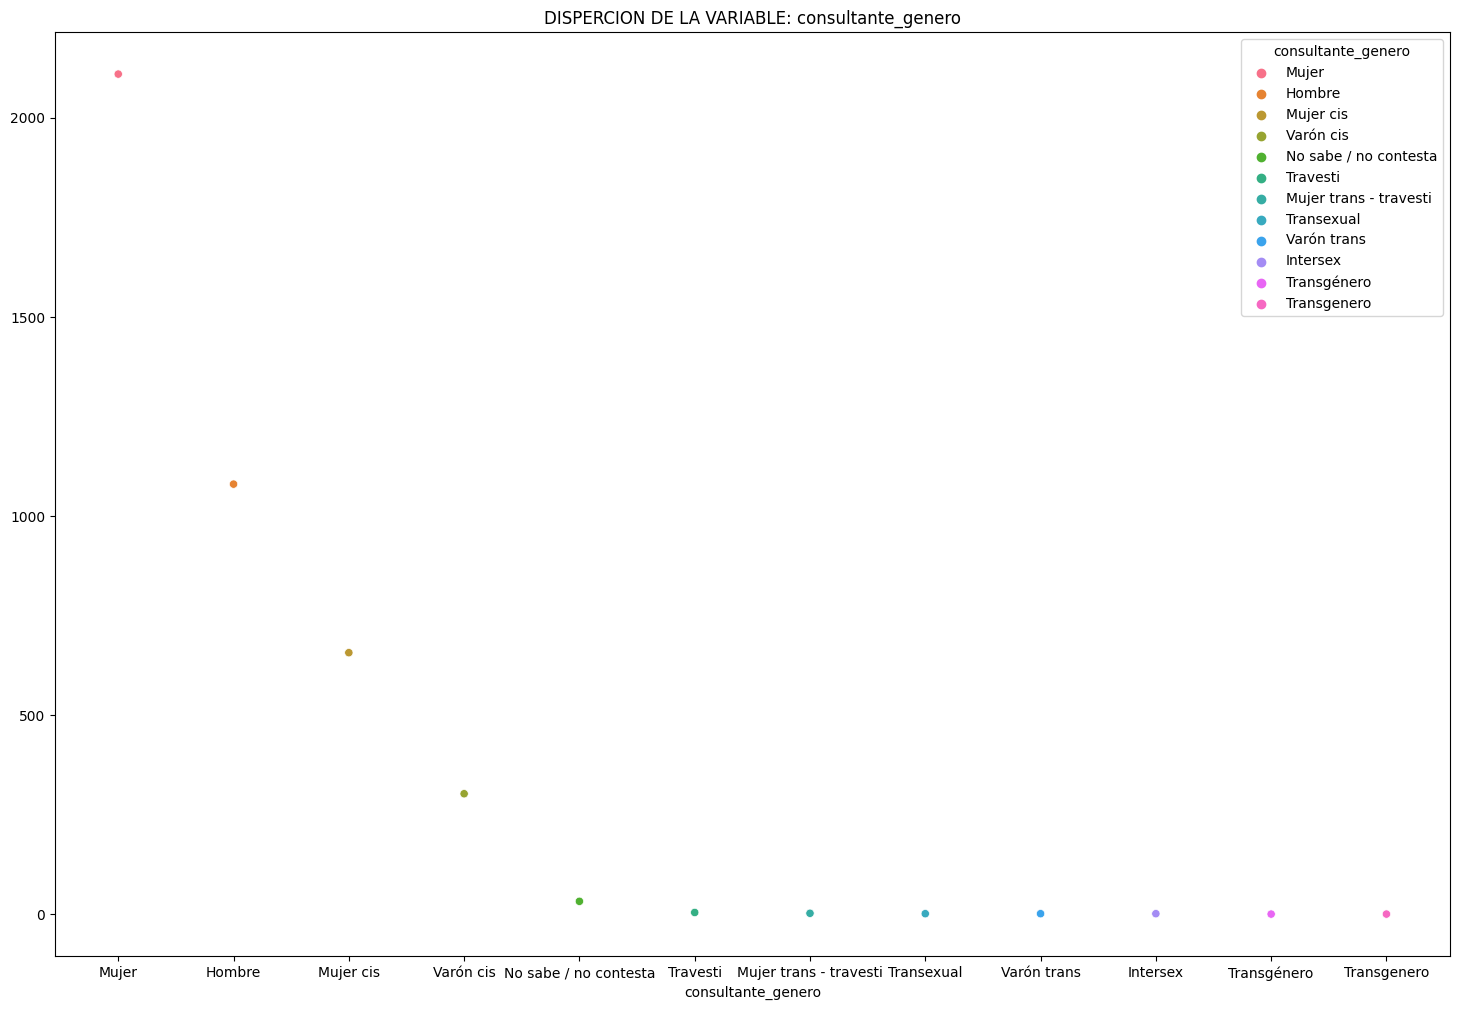

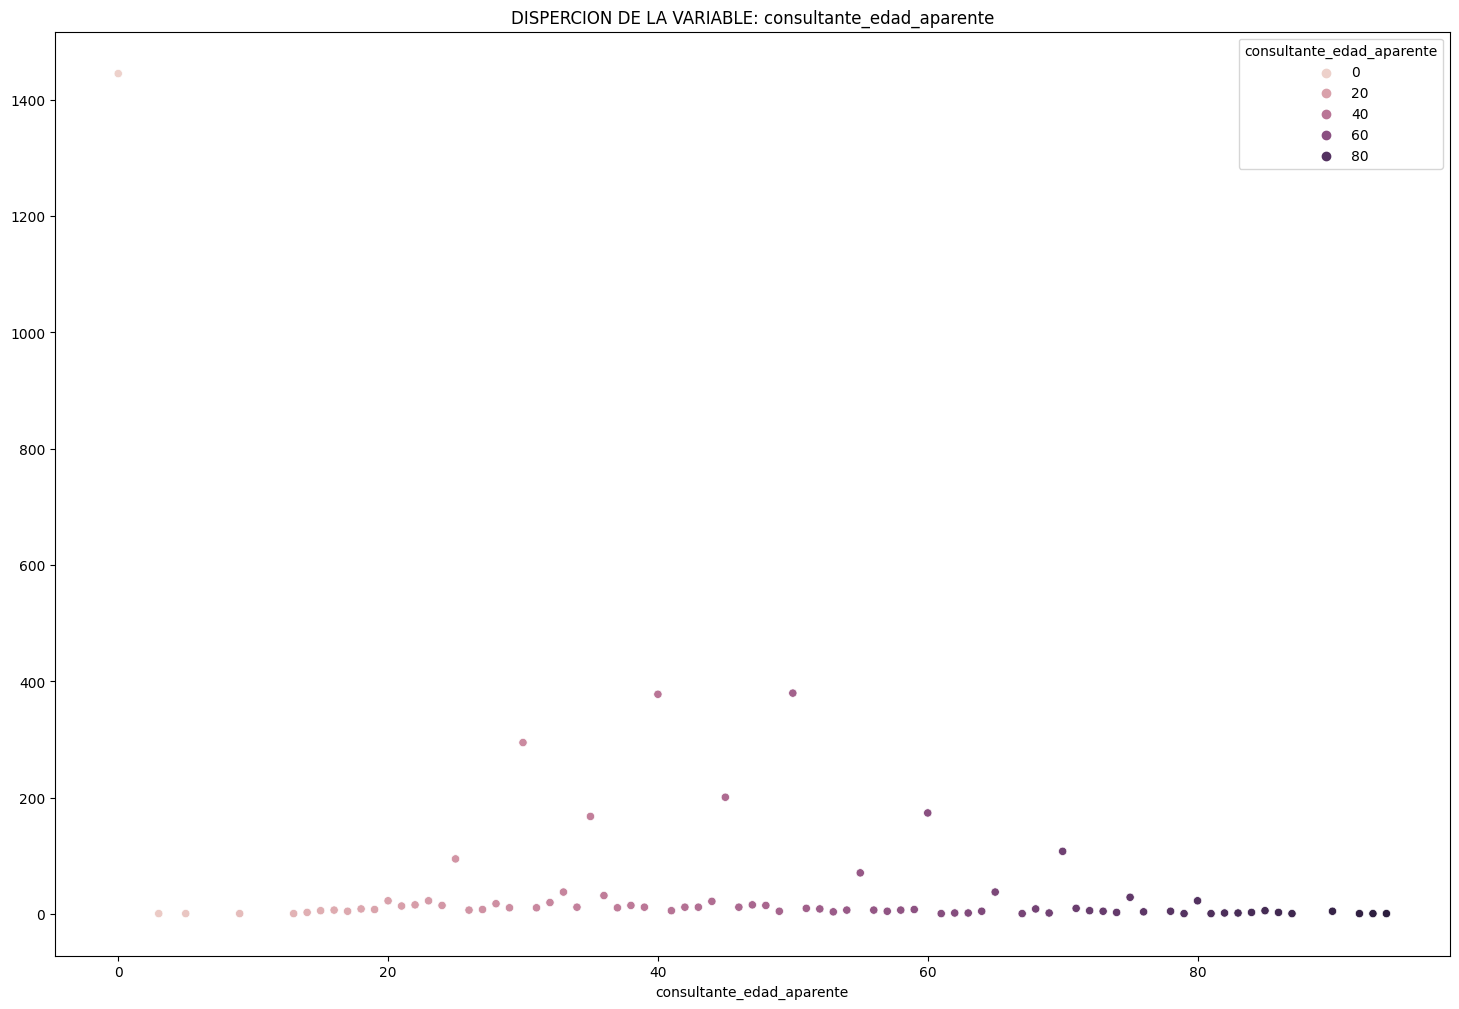

In [44]:
# Creo gráficos de dispersión y gráficos de torta para las columnas del DataFrame 'df_orientaciones'

# Itero a través de las columnas del DataFrame 'df_orientaciones'.
for column in df_orientaciones.columns:
    # Obtengo la serie de valores únicos y sus conteos en la columna actual.
    serie = df_orientaciones[column].value_counts()
    
    # Creo una figura de tamaño personalizado para el gráfico.
    plt.figure(figsize=(18, 12))
    
    # Verifico si la columna está en la lista 'columnas_g_torta'.
    if column not in columnas_g_torta:
        # Si no está en 'columnas_g_torta', creo un gráfico de dispersión.
        sns.scatterplot(x=serie.index, y=serie.values, hue=serie.index)
        plt.title(f'DISPERCION DE LA VARIABLE: {column}')
    else:
        # Si está en 'columnas_g_torta', creo un gráfico de torta para las 3 categorías más frecuentes.
        top_columnas = serie.nlargest(3)
        plt.pie(top_columnas, labels=top_columnas.index)
        plt.title(f'TOP 3: {column}')

# En este bloque de código, he iterado a través de las columnas del DataFrame 'df_orientaciones'
# y he creado gráficos de dispersión para las columnas que no están en 'columnas_g_torta', y gráficos
# de torta para las columnas que están en 'columnas_g_torta'. Estos gráficos pueden ayudar a visualizar
# la distribución de datos en cada columna.


#### 2.3.0.0 - CORRELACION

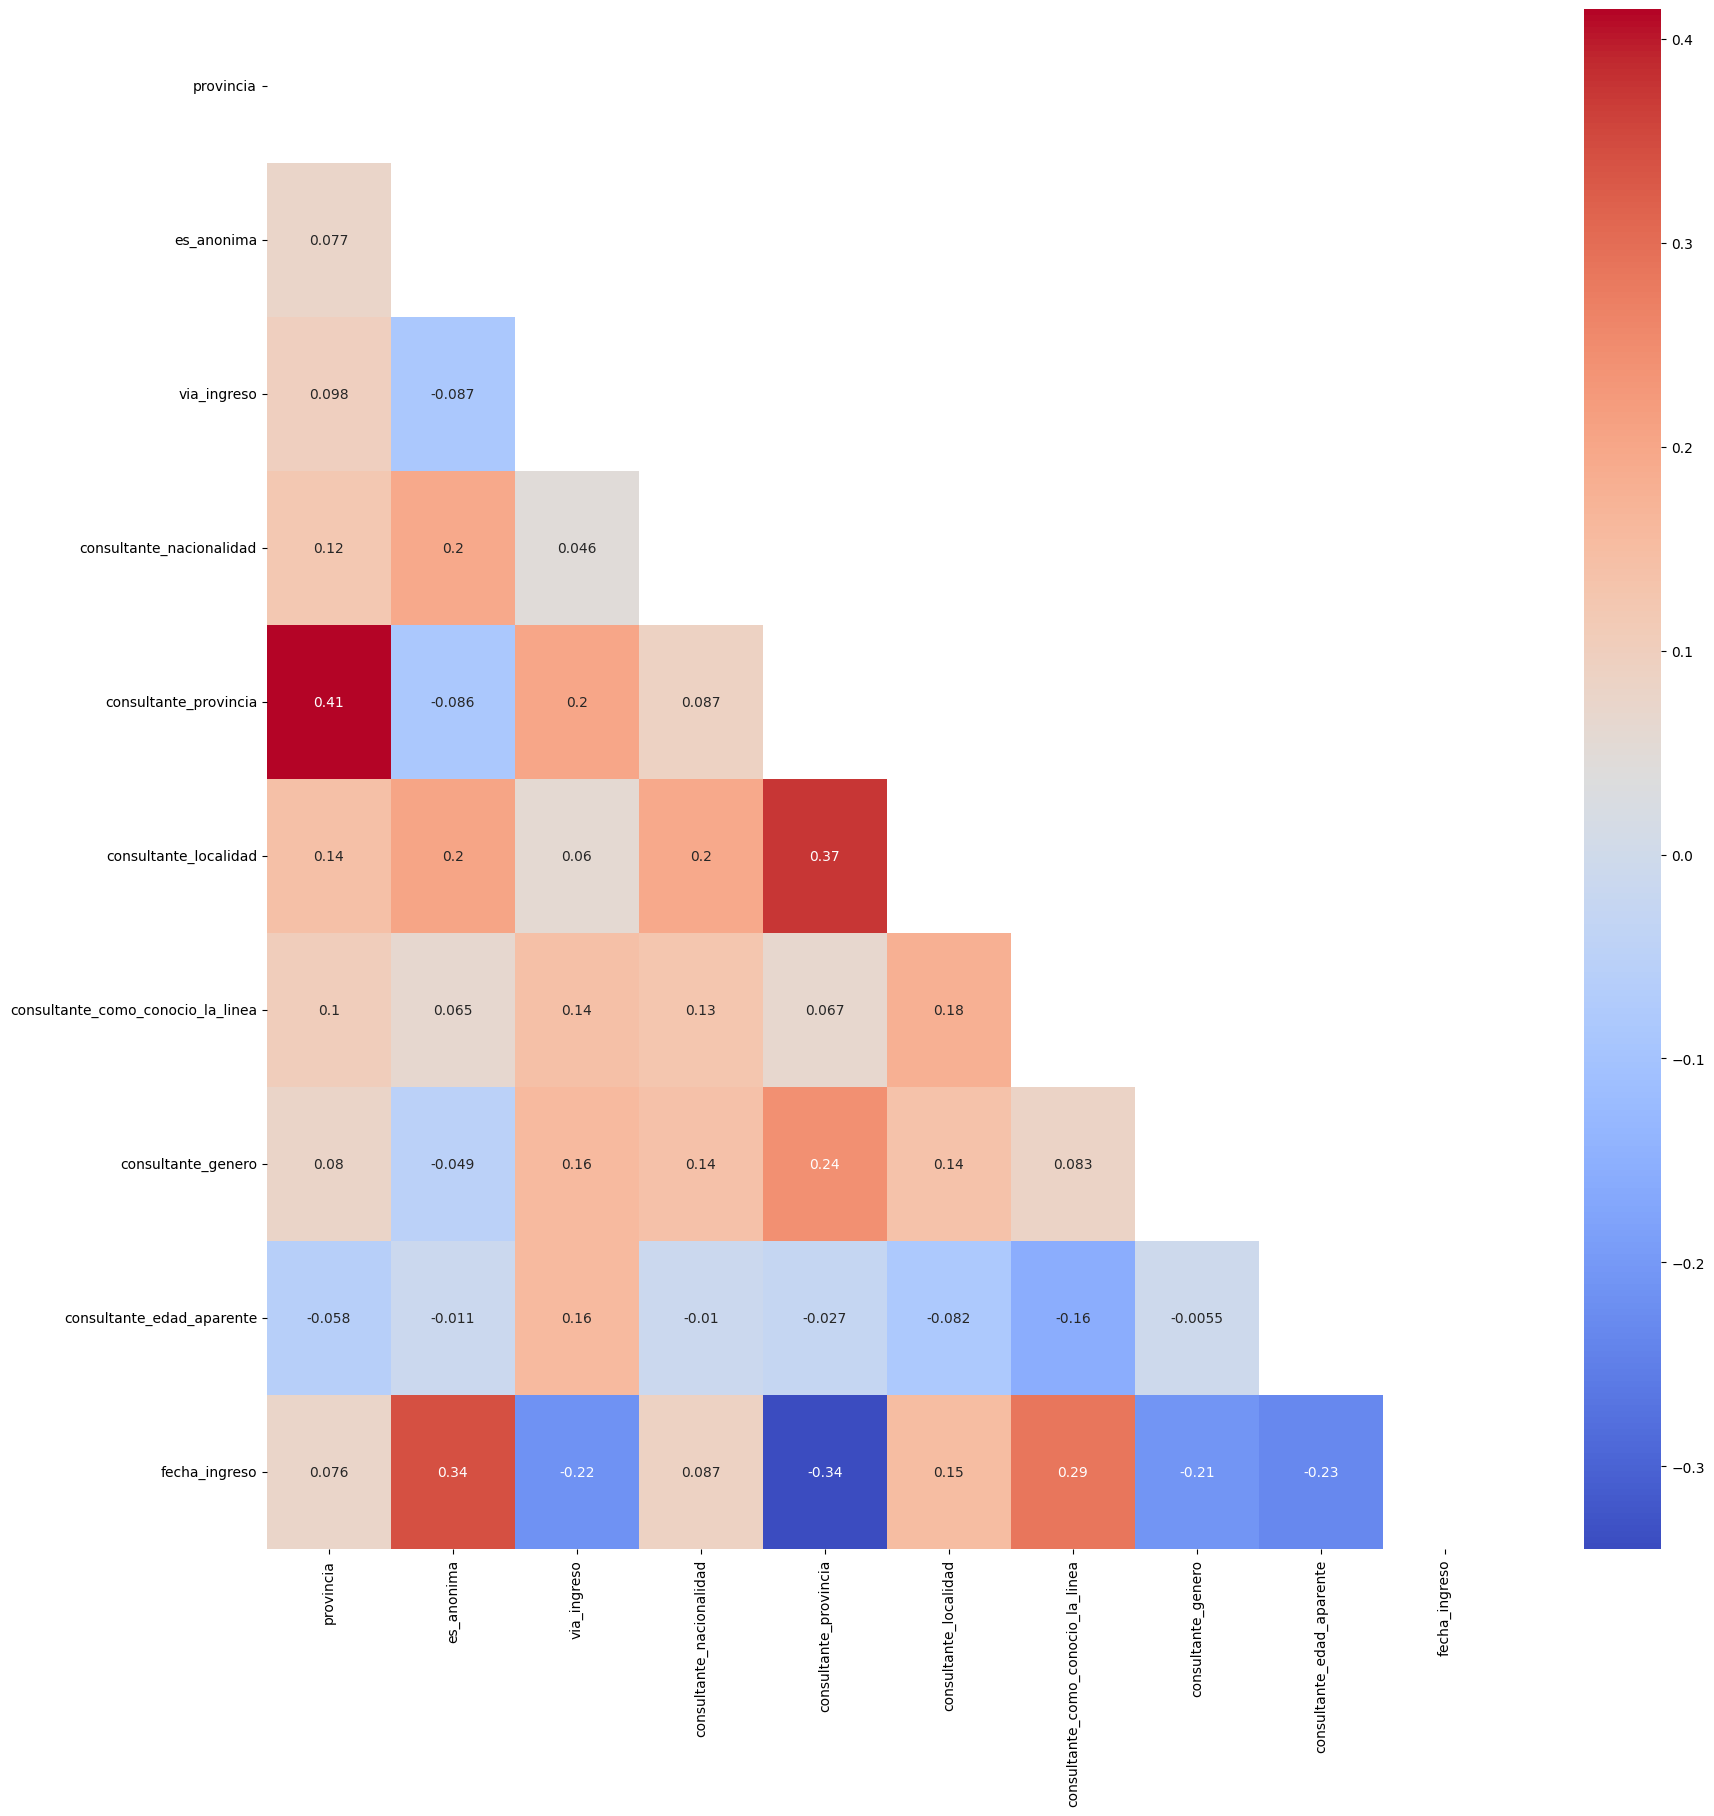

In [45]:
# Genero una matriz de correlación y un mapa de calor

# Calculo la matriz de correlación utilizando el DataFrame 'df_orientaciones_escalados'.
matriz_correlacion = df_orientaciones_escalados.corr()

# Creo una máscara para ocultar la mitad superior de la matriz de correlación y evitar duplicaciones.
mascara_espejo = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Creo una figura de tamaño personalizado para el mapa de calor.
plt.figure(figsize=(20, 20))

# Creo el mapa de calor utilizando seaborn y muestro los valores de correlación como anotaciones.
sns.heatmap(matriz_correlacion, mask=mascara_espejo, annot=True, cmap='coolwarm')

# Muestro el mapa de calor.
plt.show()


### 2.4.0 - ALMACENAMIENTO CSV

In [46]:
# Guardo los DataFrames en archivos CSV

# Guardo el DataFrame 'df_orientaciones_codificados' en un archivo CSV llamado 'orientacion_codificados.csv'.
df_orientaciones_codificados.to_csv('../datos/csv procesados/orientacion_codificados.csv', index=False)

# Guardo el DataFrame 'df_orientaciones_escalados' en un archivo CSV llamado 'orientacion_escalados.csv'.
df_orientaciones_escalados.to_csv('../datos/csv procesados/orientacion_escalados.csv', index=False)

# Guardo el DataFrame 'df_orientaciones' en un archivo CSV llamado 'orientacion.csv'.
df_orientaciones.to_csv('../datos/csv procesados/orientacion.csv', index=False)